## Simple Animations and Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from IPython.display import display
from JSAnimation import IPython_display

from timeit import default_timer as timer
from numba import autojit

In the first example, we will try to simulate jumping (inelatic) ball. We will asume a simple solution for a damped oszilation. 

$\ddot{mx}+d\dot{x}+kx 0$

$x(t)=x_0e^{-\delta t} \cos{\omega t +\phi_0}$ 

with $\omega_0 = \sqrt{\frac{k}{m}}$,  $\delta = \frac{d}{2m}$

Let's plot x(t) for some random variables from 0 to $16\pi$ 

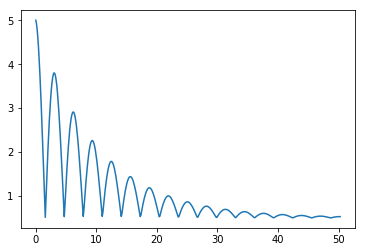

In [2]:
x0    = 4.5
delta = 1/10.
omega = 1.

T = np.linspace(0,16.*np.pi,450)
Y = x0*np.exp(-T*delta)*np.abs(np.cos(omega * T))+0.5
plt.plot(T,Y)
plt.show()

We can first determine the frame in which we want to draw using the figure and axes function. Since we want to draw a circle-like object we can use the Circle opbject. 

In [3]:
fig   = plt.figure(figsize = (10,5))
patch = plt.Circle((5,5), 0.5, fc = "b")
ax    = plt.axes(xlim = (0,10), ylim = (0,5))

Following we require an animation frunction and another function to initialize the animation. The init() function draws the circle into the axes frame, while the animate() function changes the position attribute of the circle patch with each iteration.

In [4]:

def init():
    patch.center= (5,5)
    ax.add_patch(patch)
    return patch

def animate(i):
    j = i/30.
    x = 1+j/10
    y = 4.*np.exp(-j/10.)*np.abs(np.cos(j))+0.5
    patch.center= (x,y)
    return patch,


We can write the animation directly to the notebook using the following function.

In [5]:
def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_gif(anim))

Finaly, we can use matplotlib's FuncAnimation function and the above created function to display and run the animation.


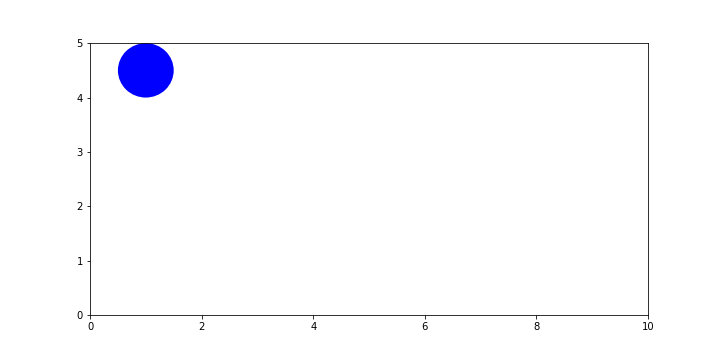
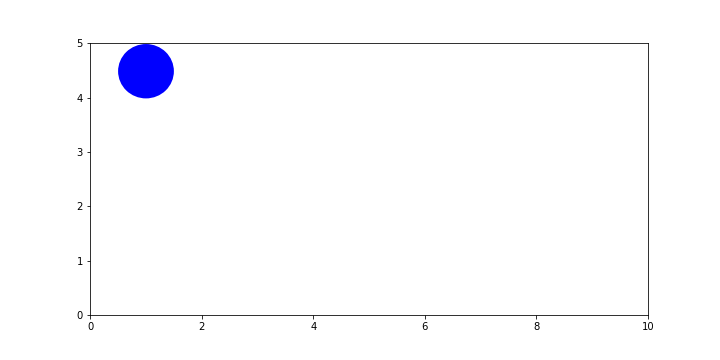
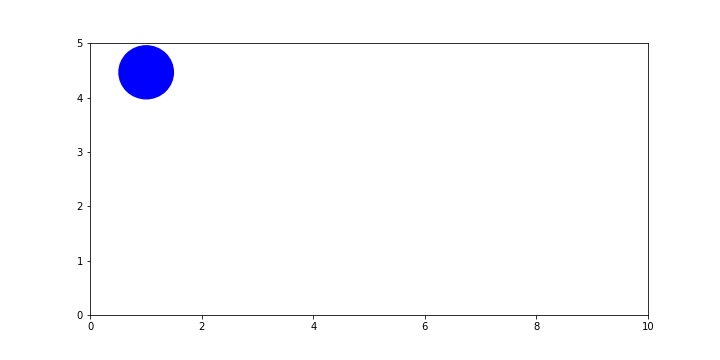
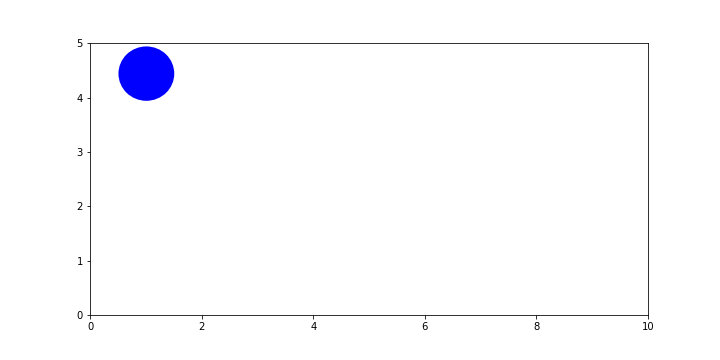
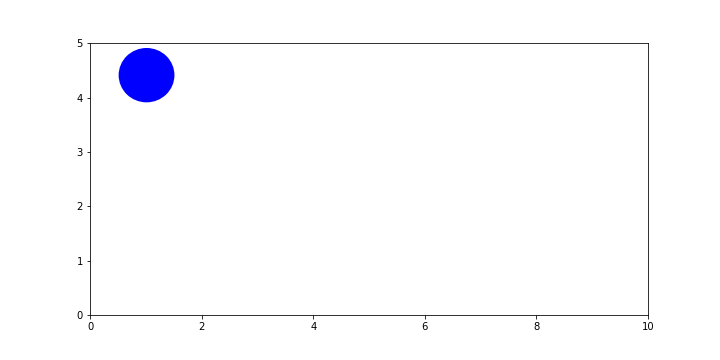
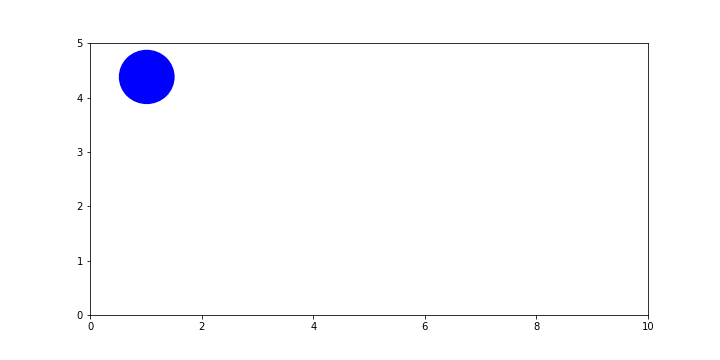
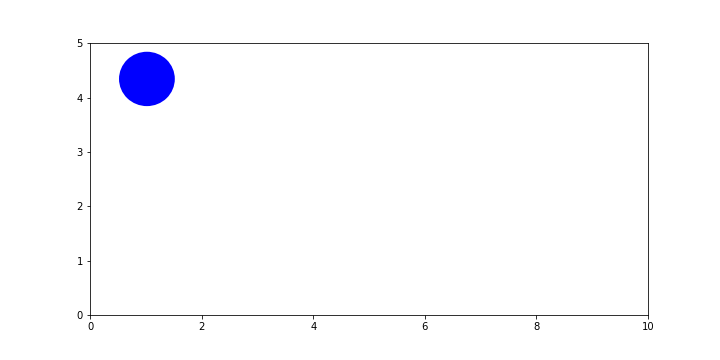
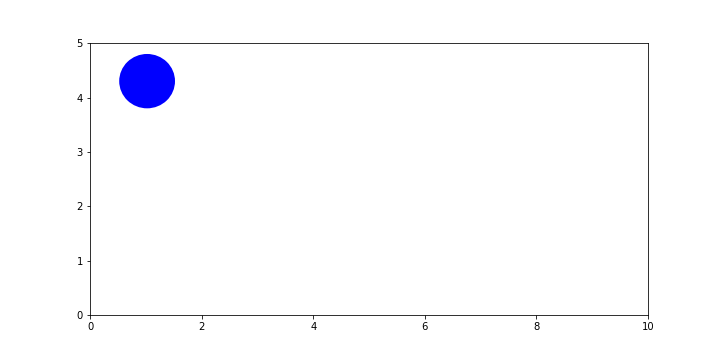
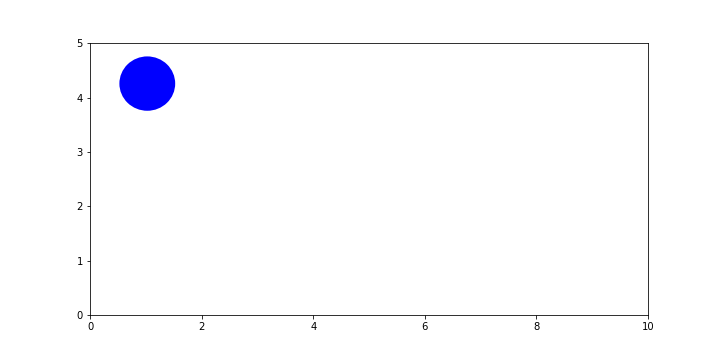
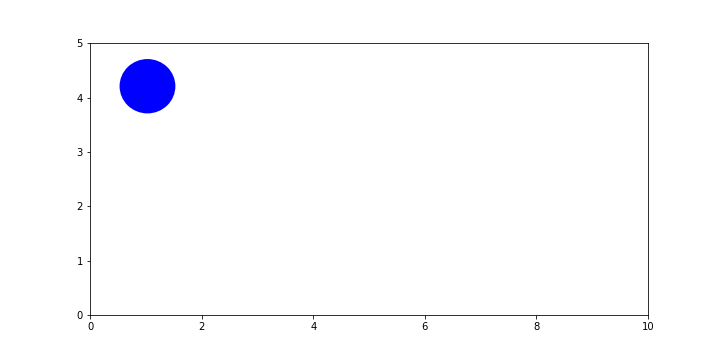
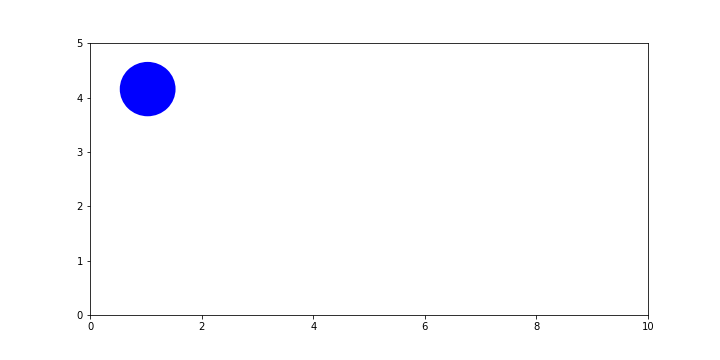
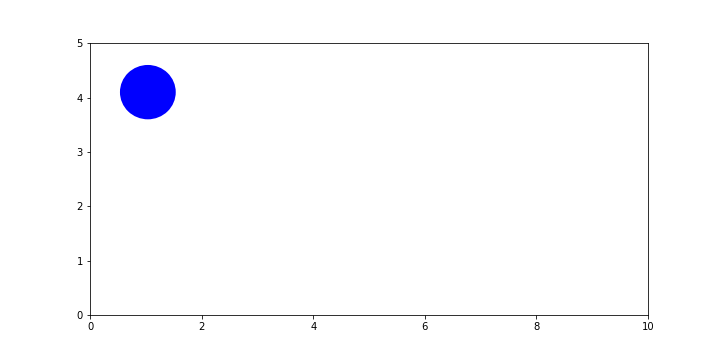
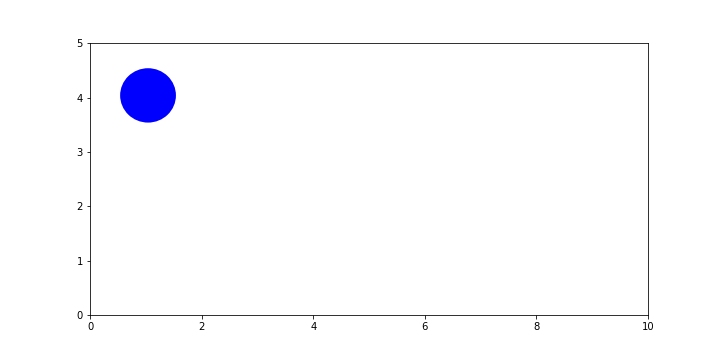
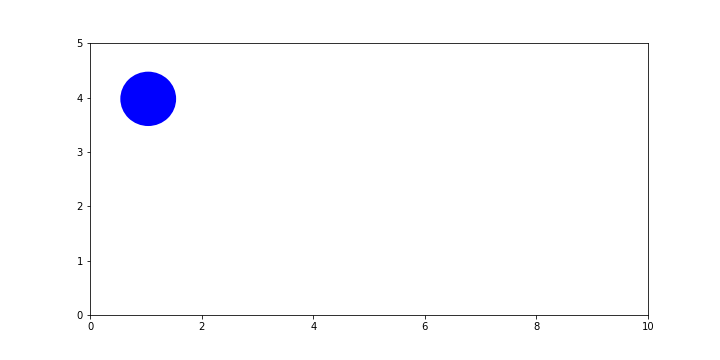
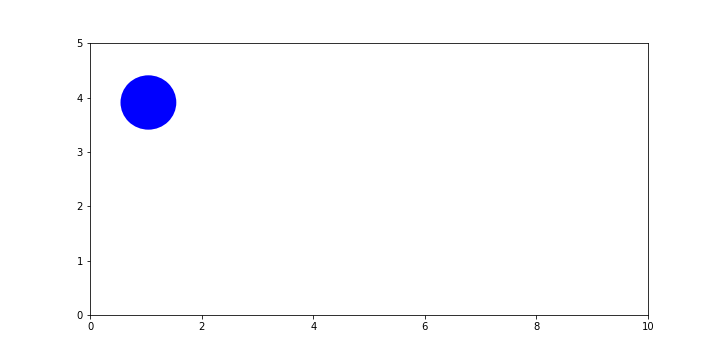
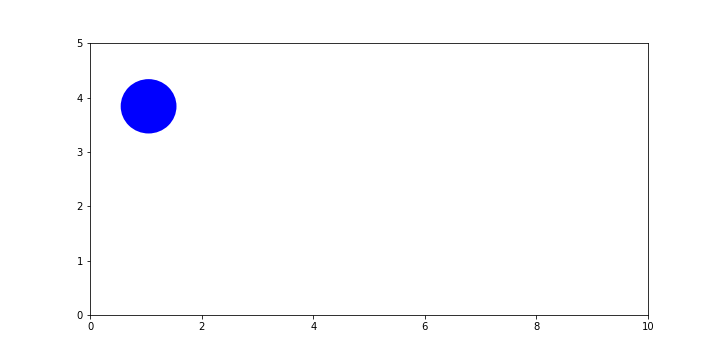
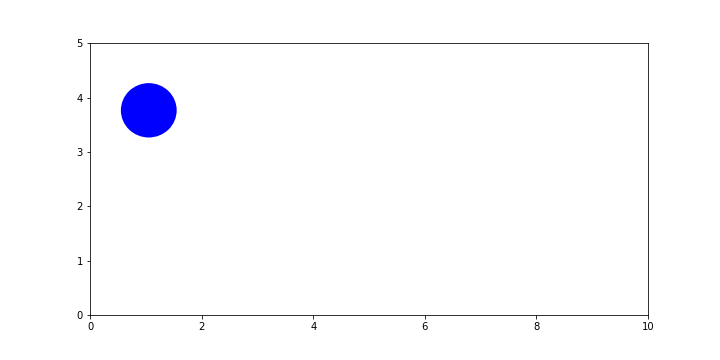
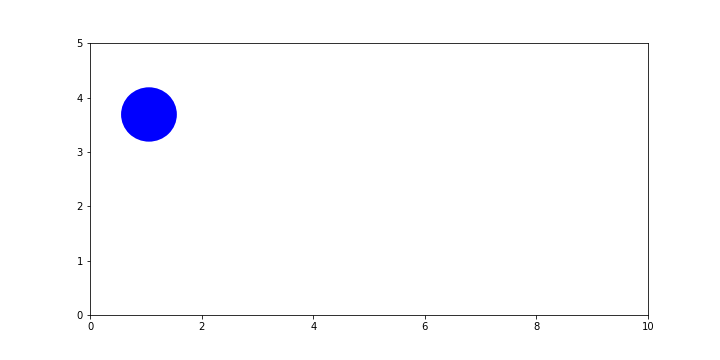
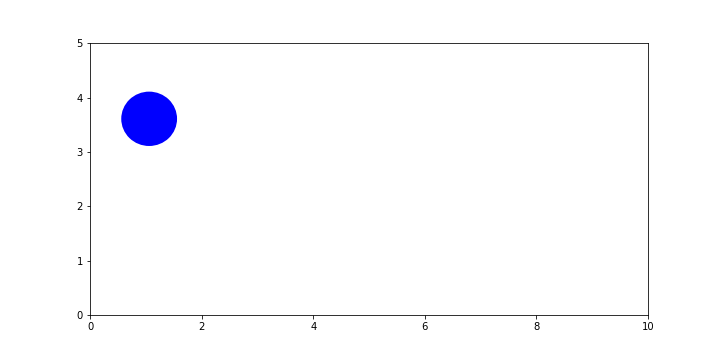
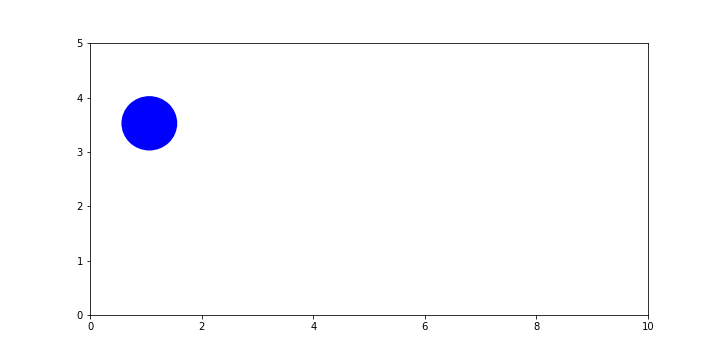
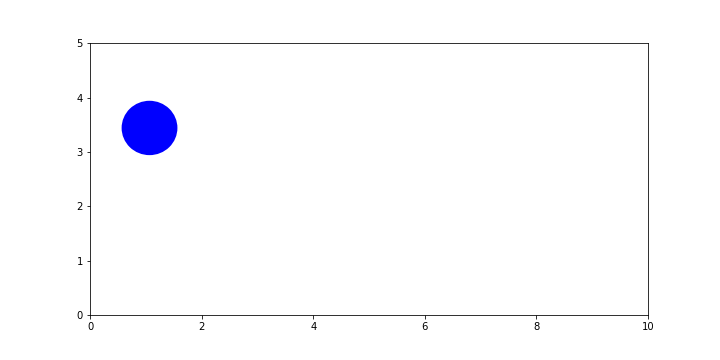
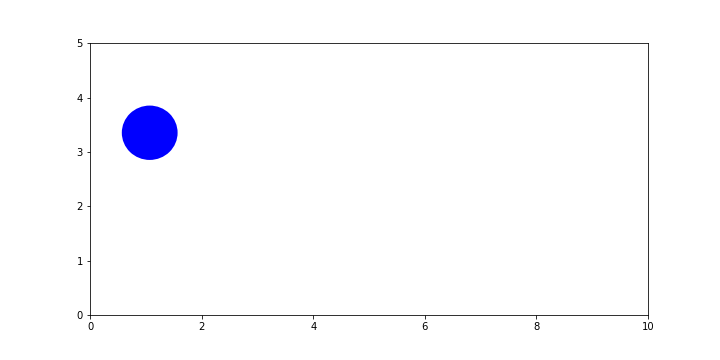
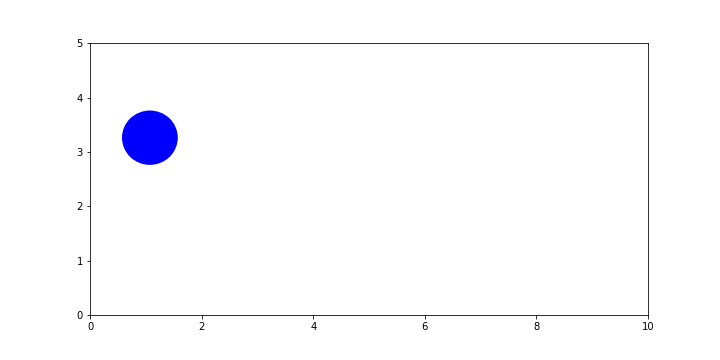
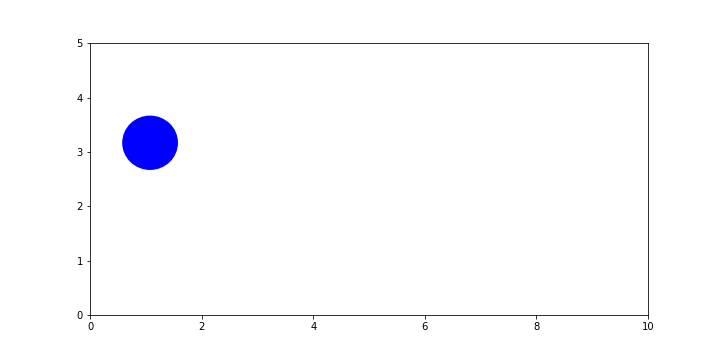
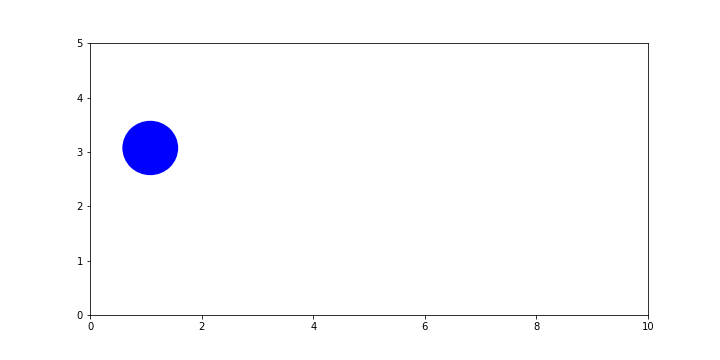
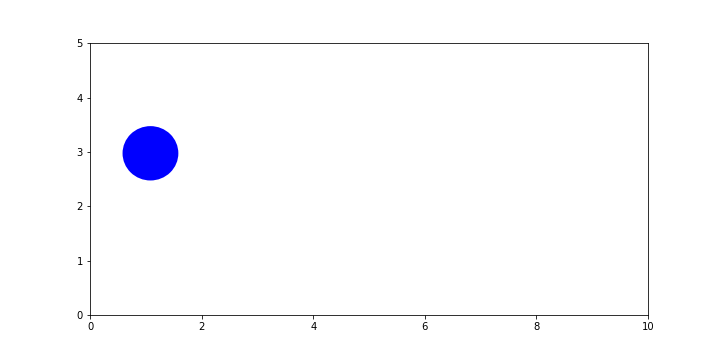
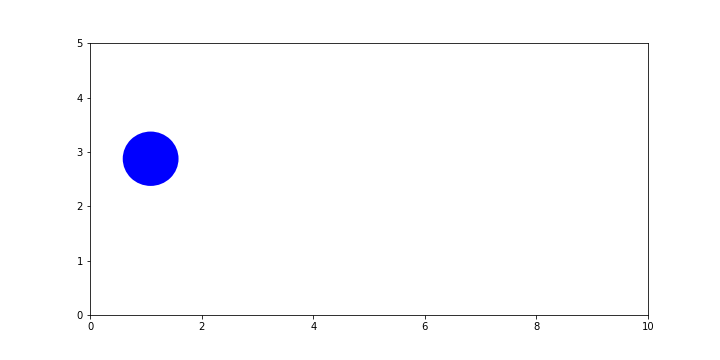
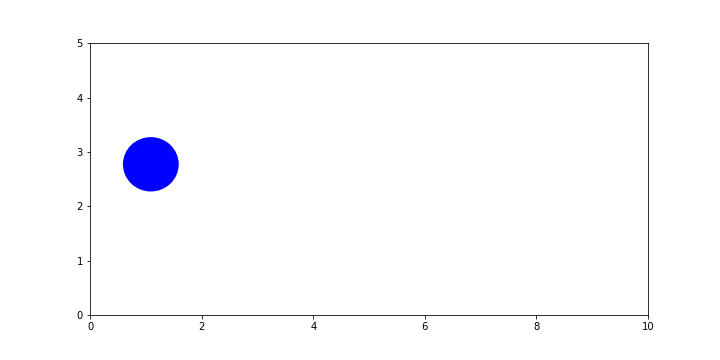
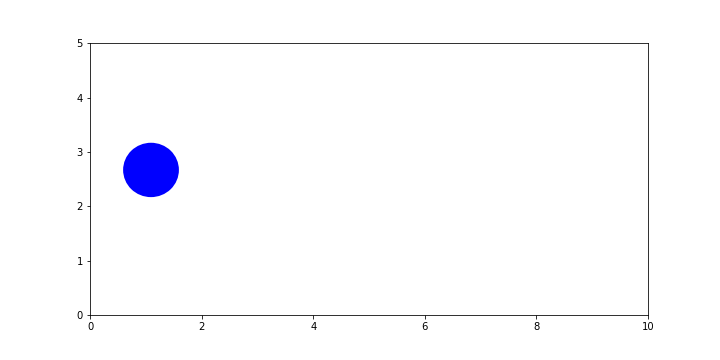
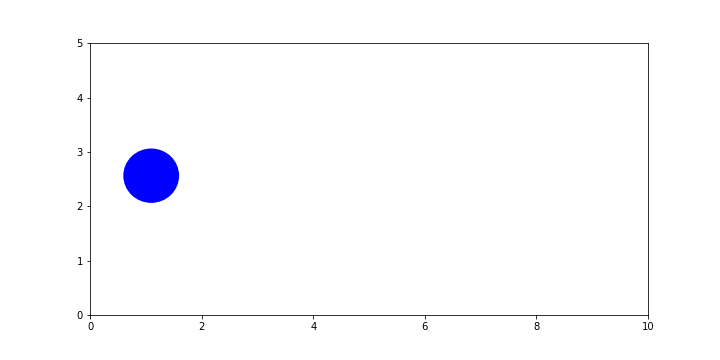
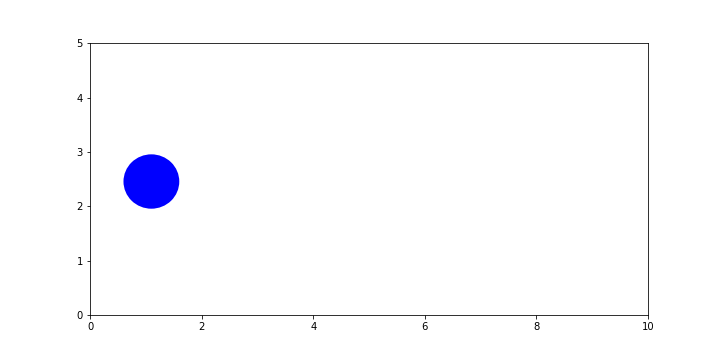
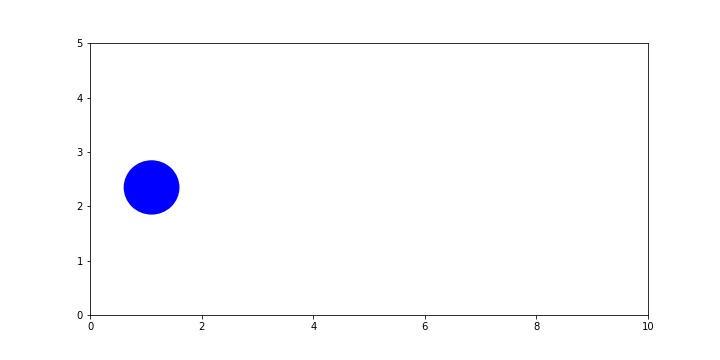
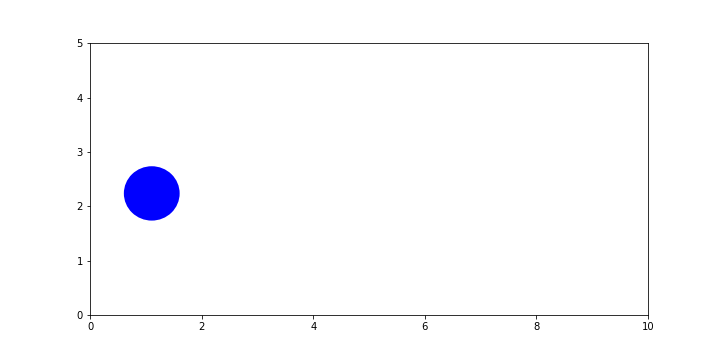
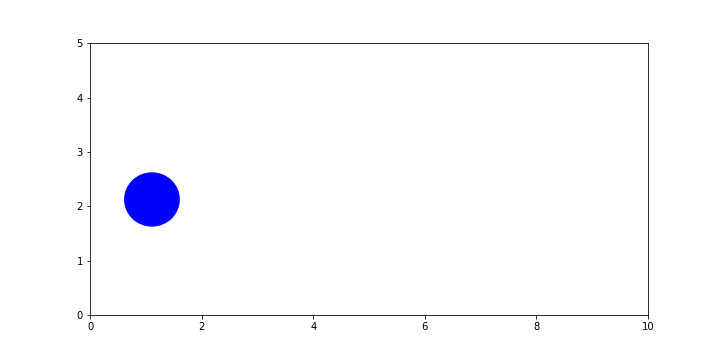
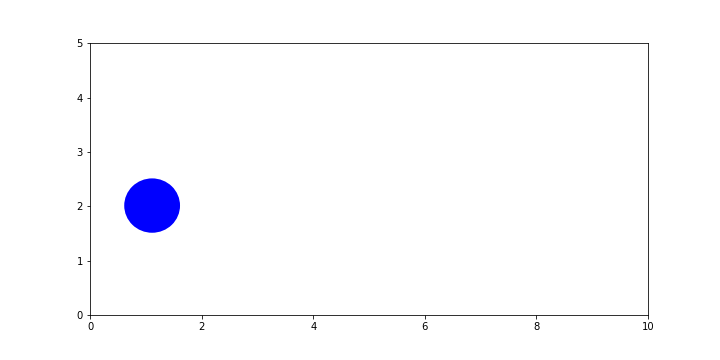
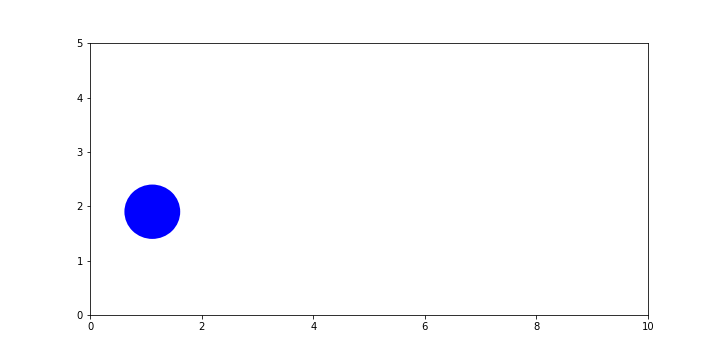
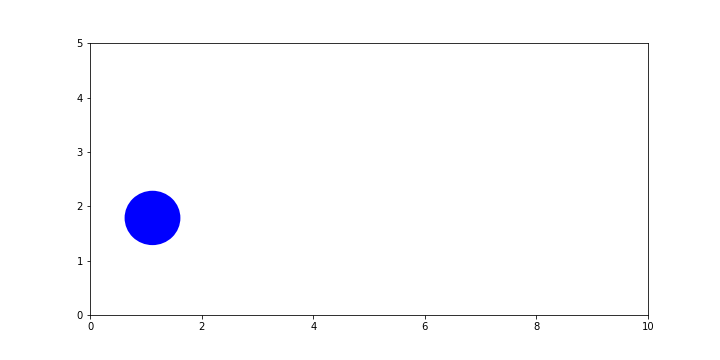
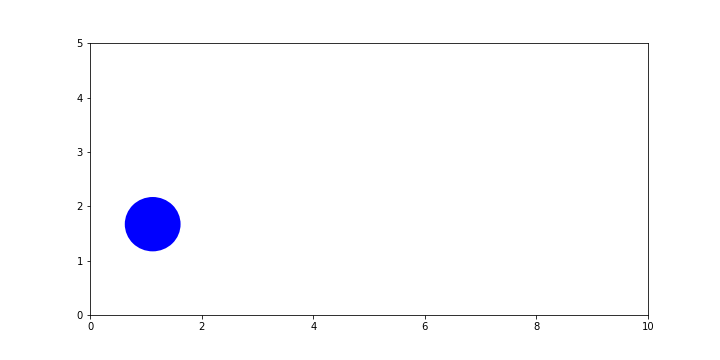
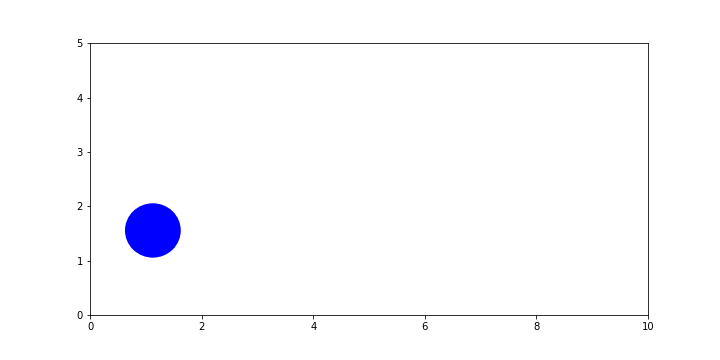
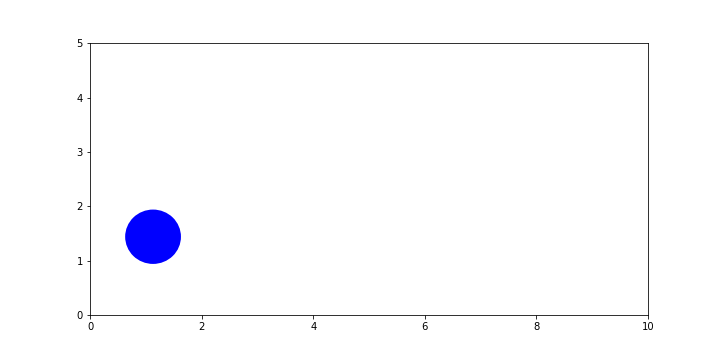
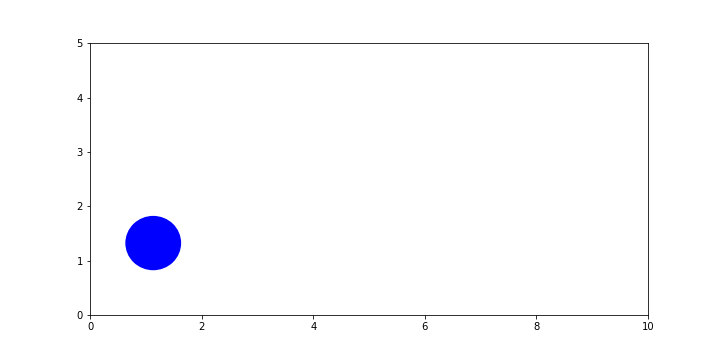
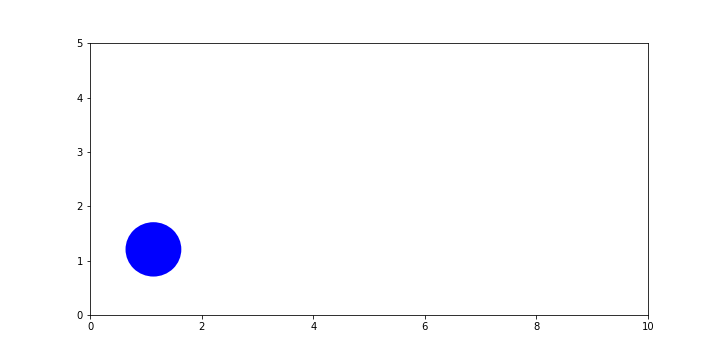
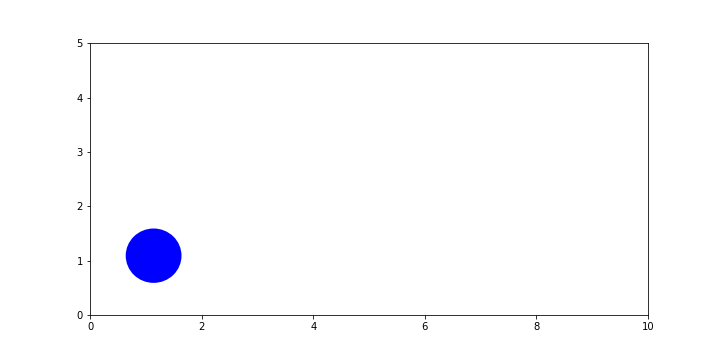
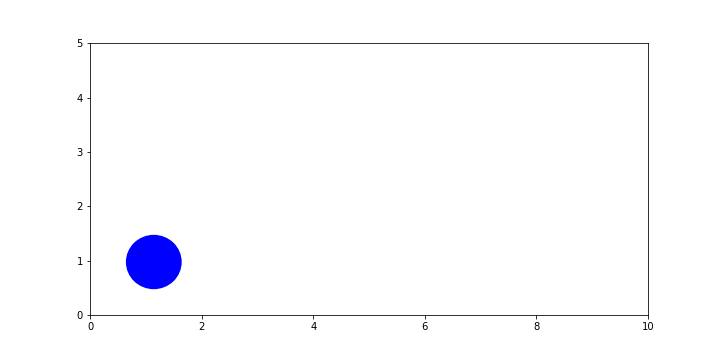
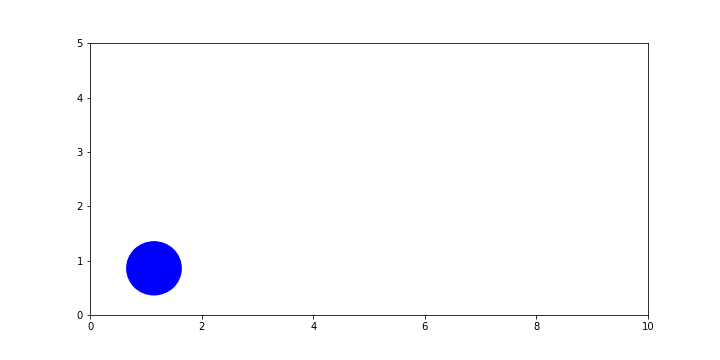
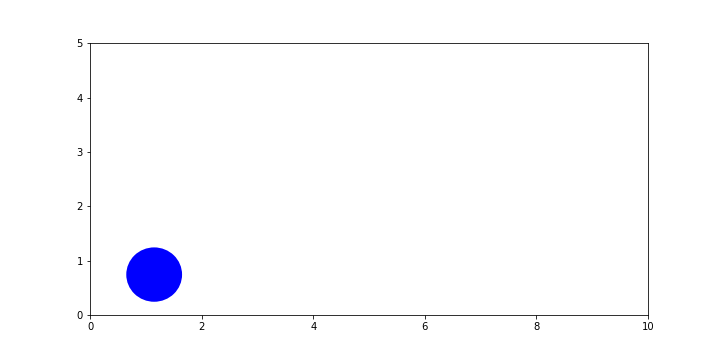
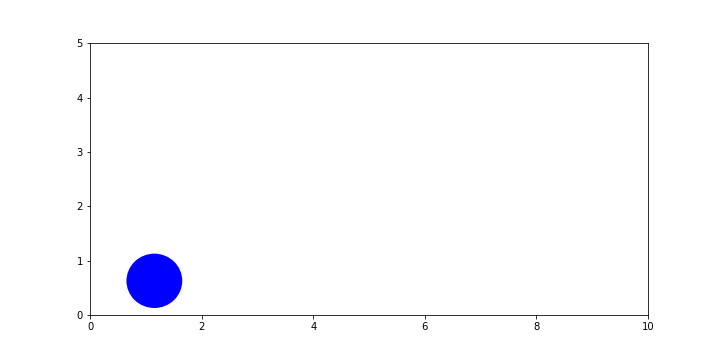
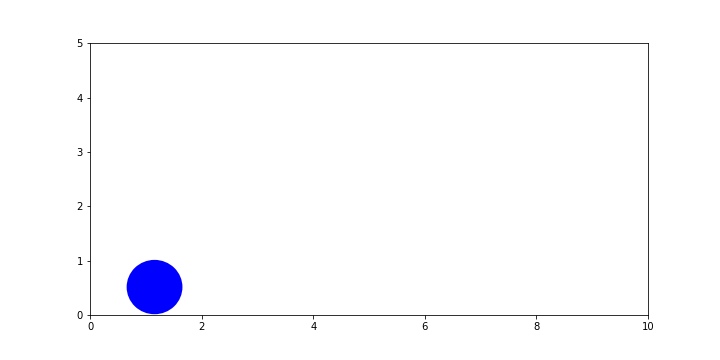
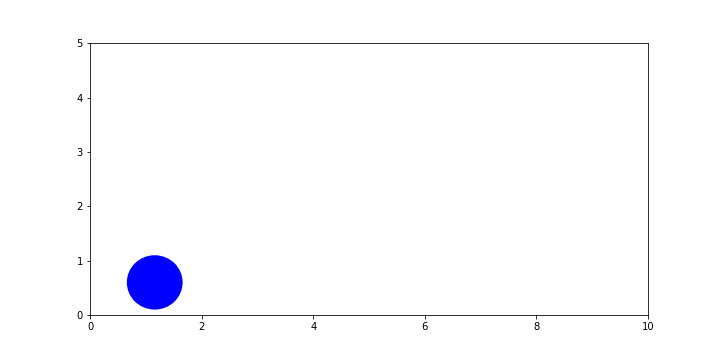
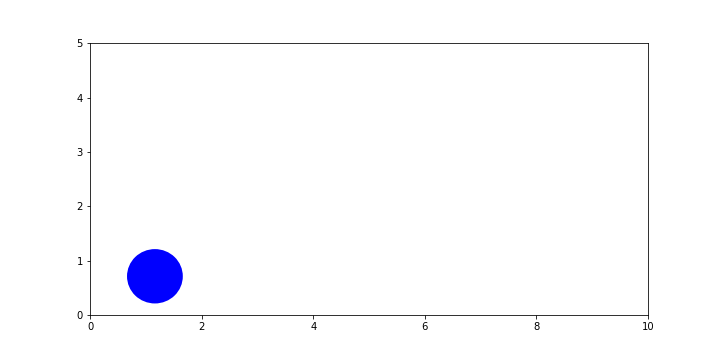
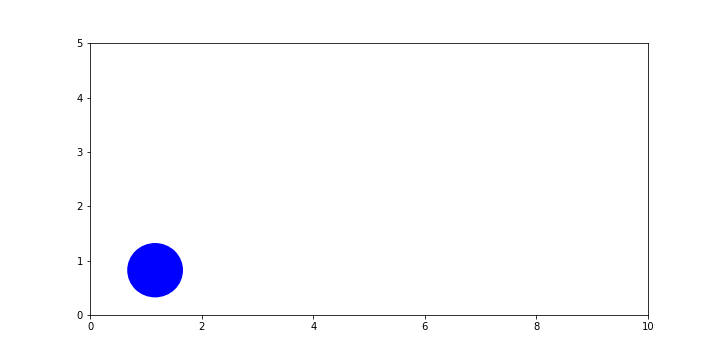
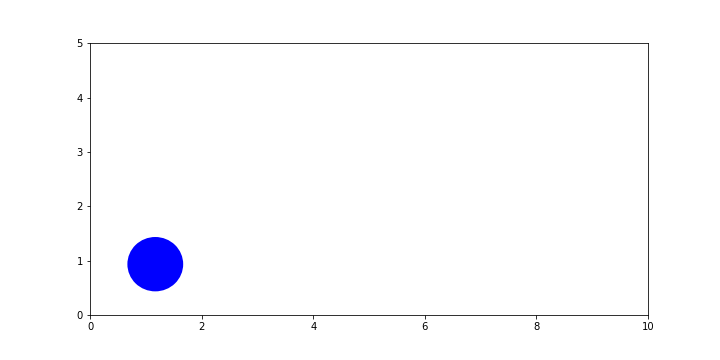
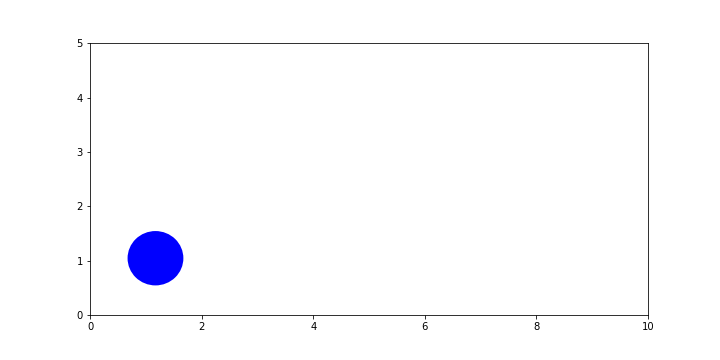
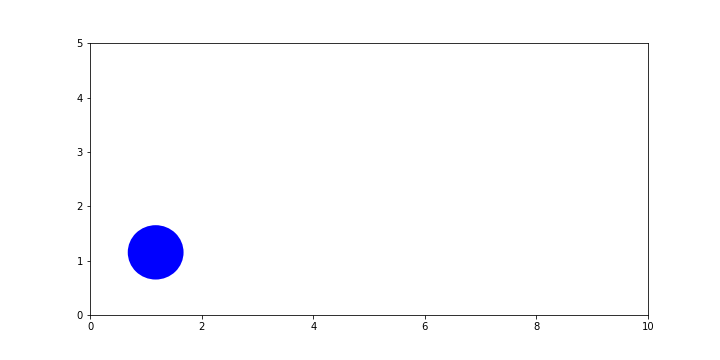
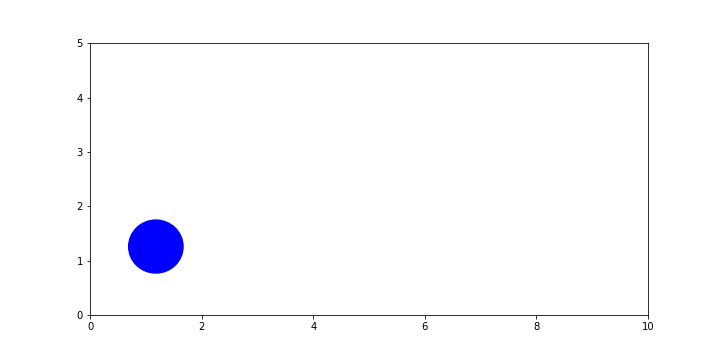
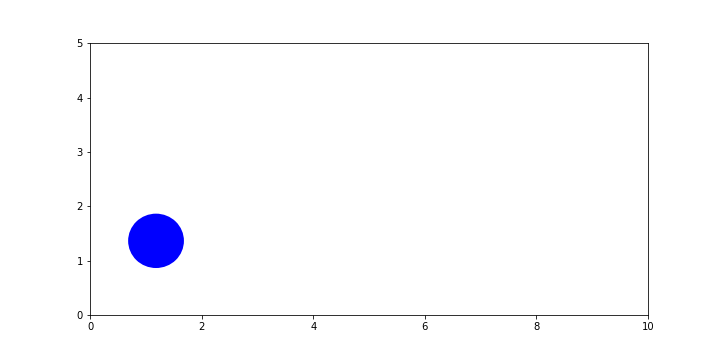
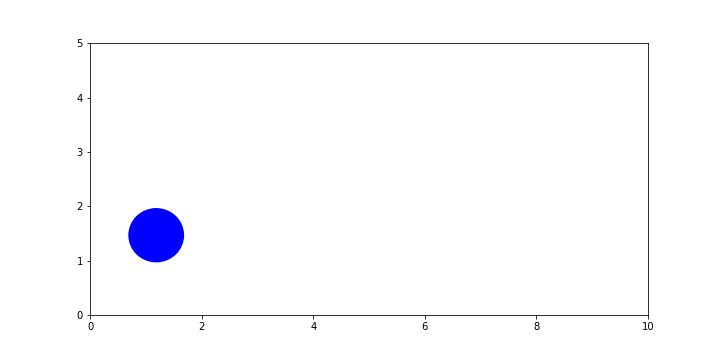
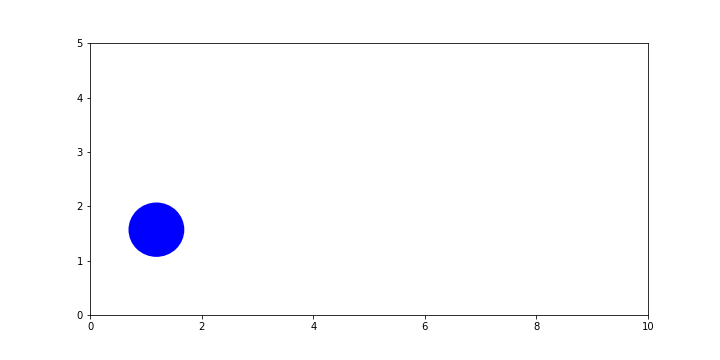
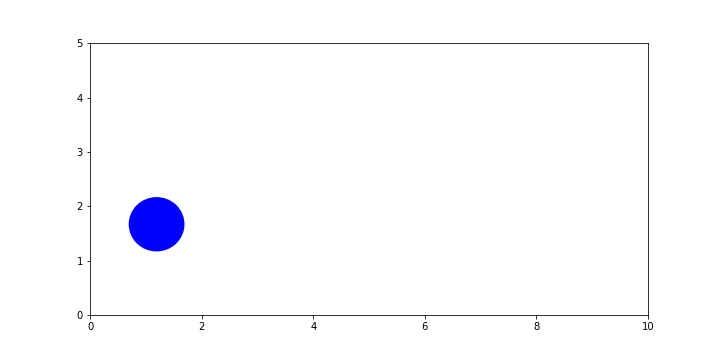
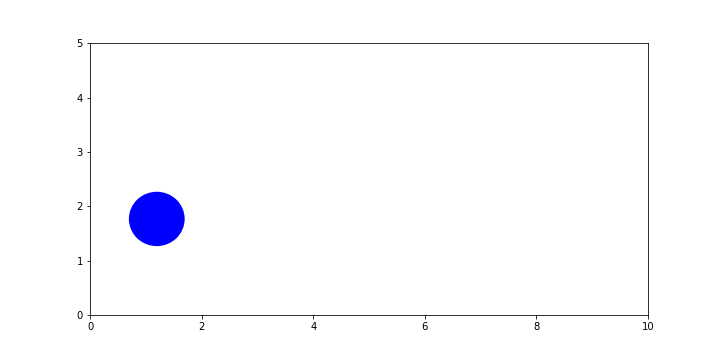
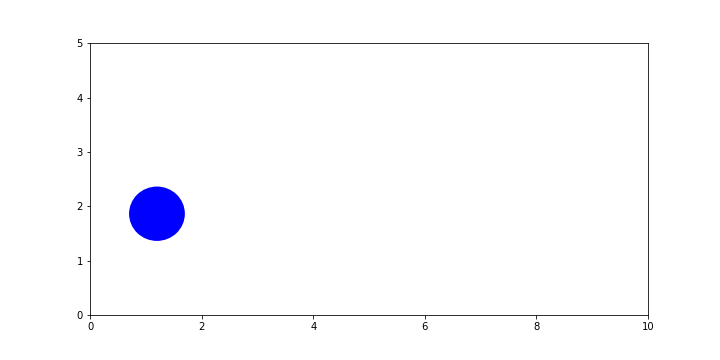
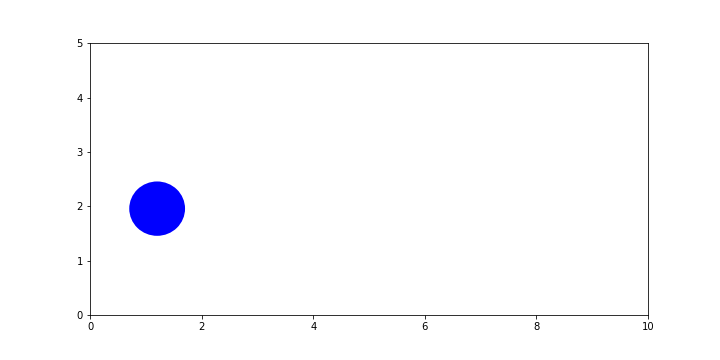
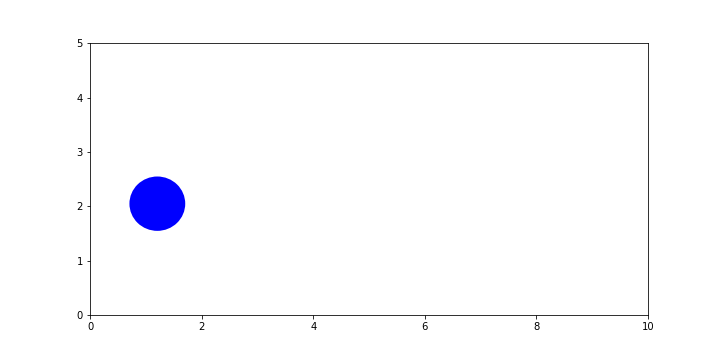
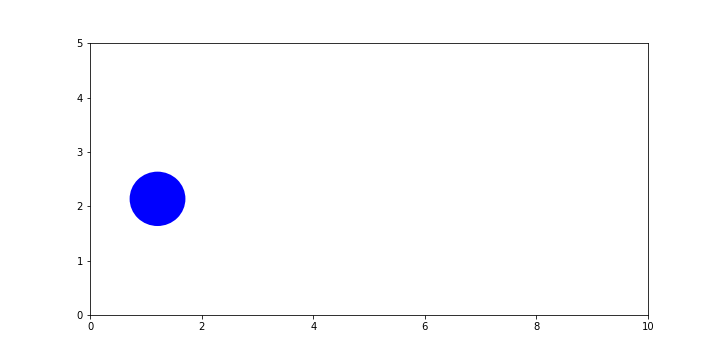
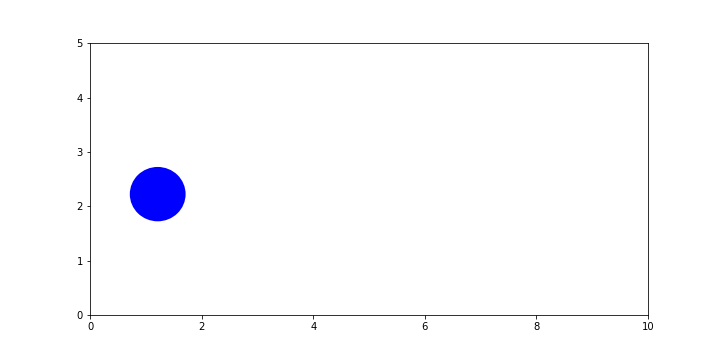
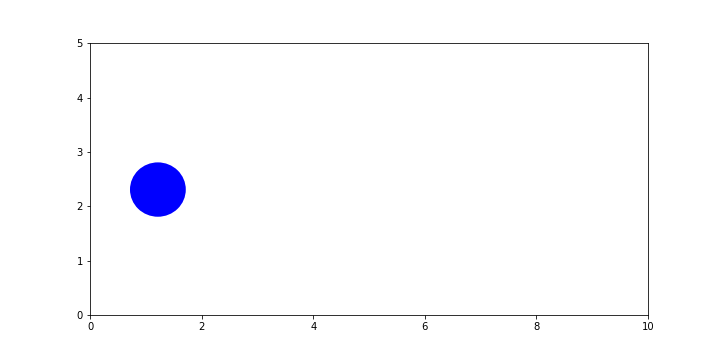
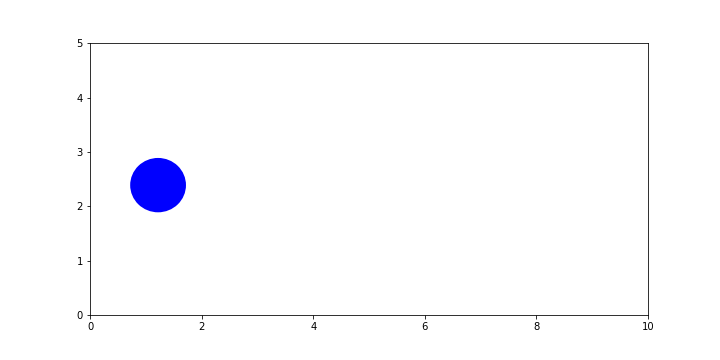
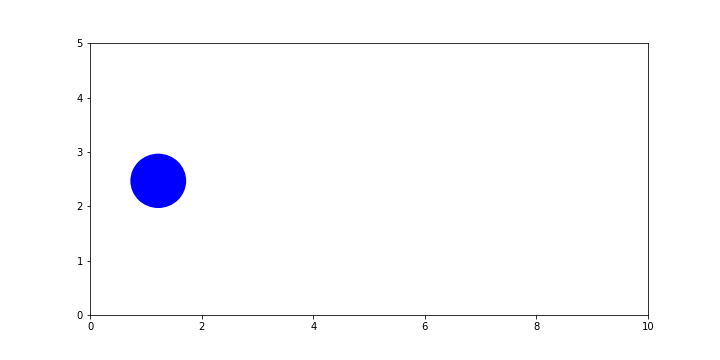
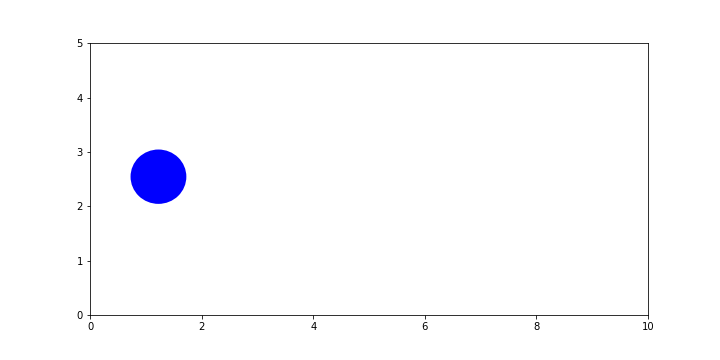
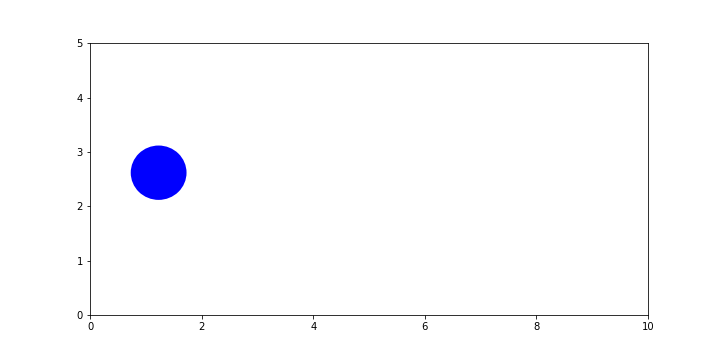
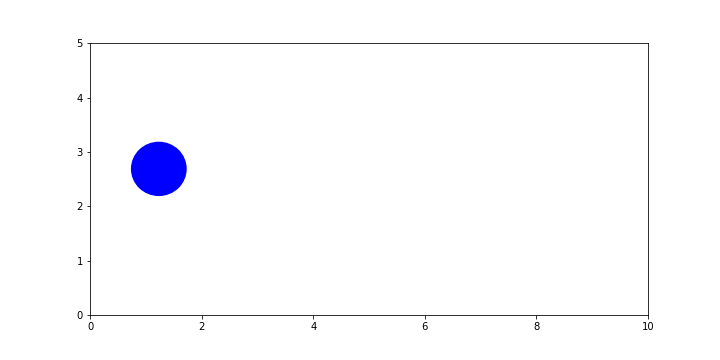
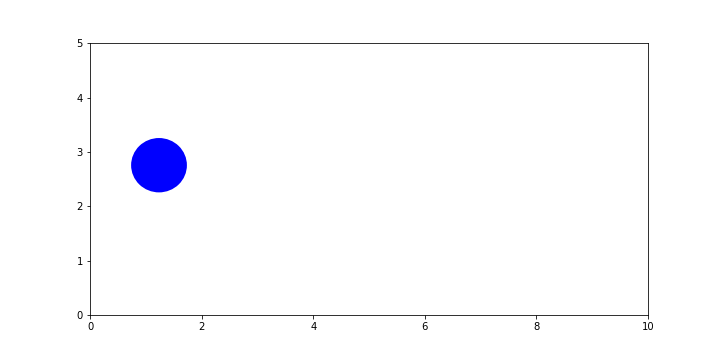
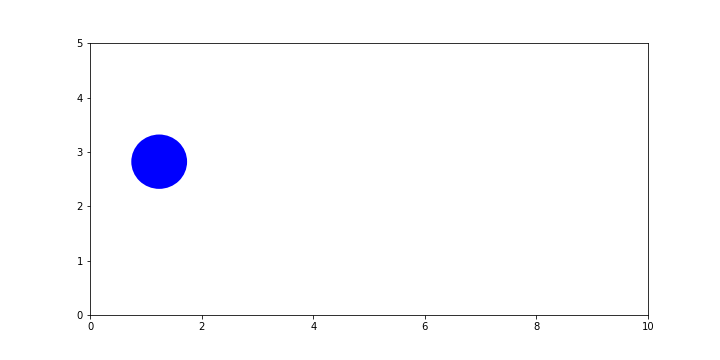
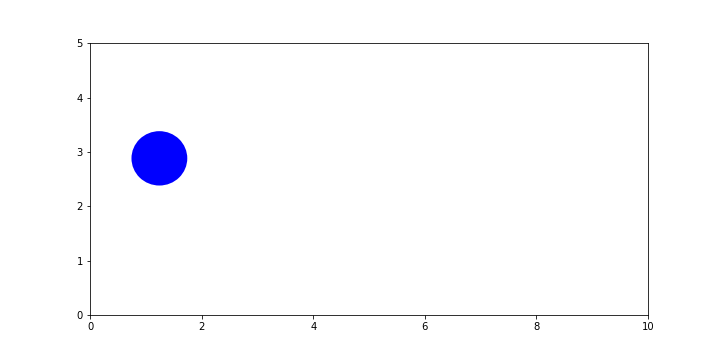
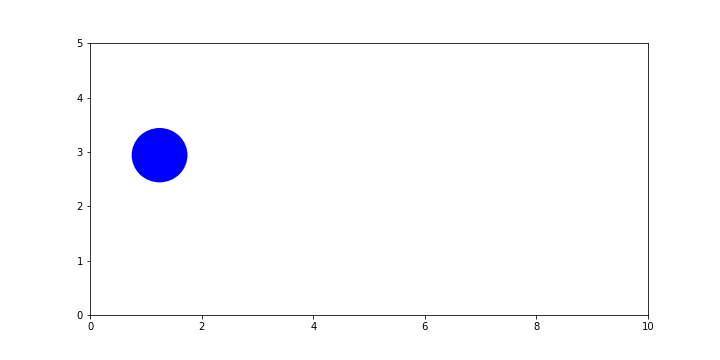
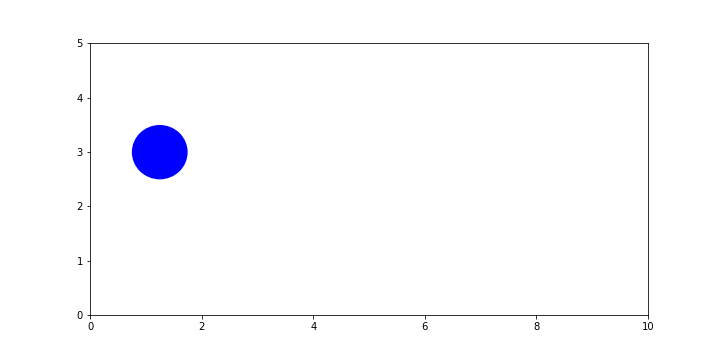
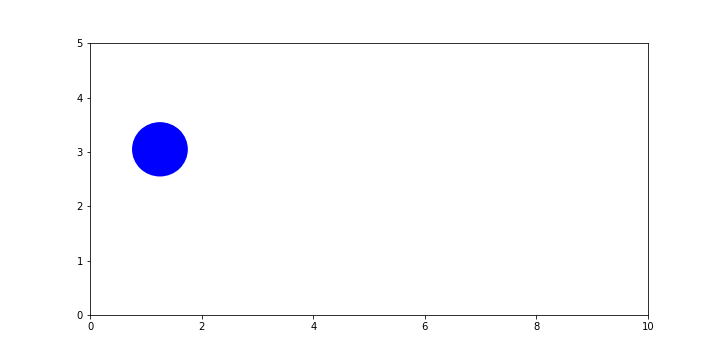
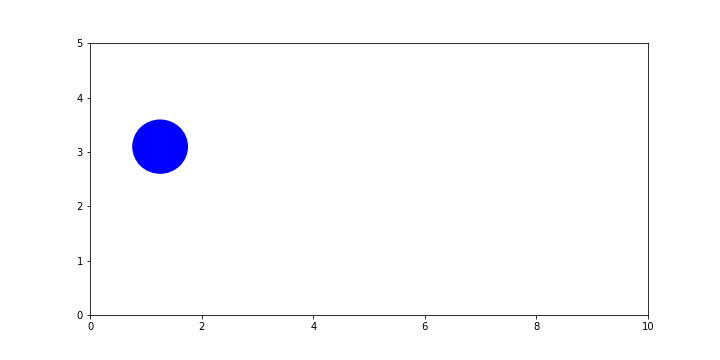
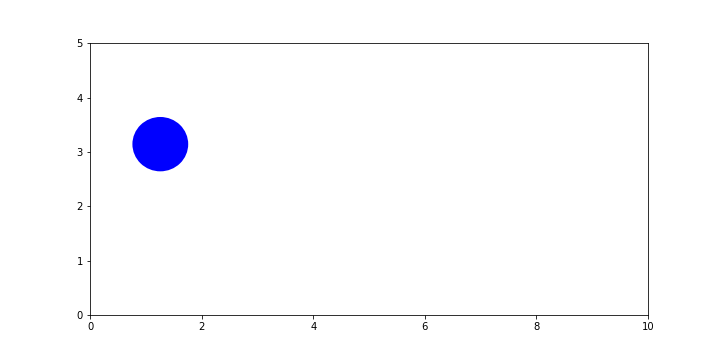
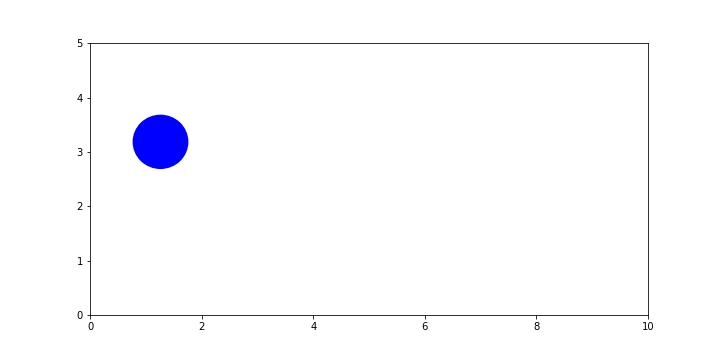
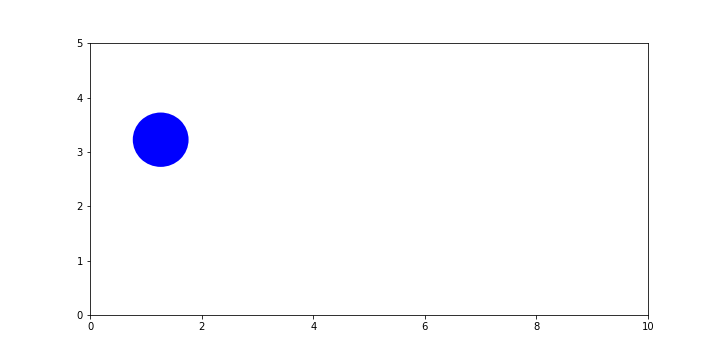
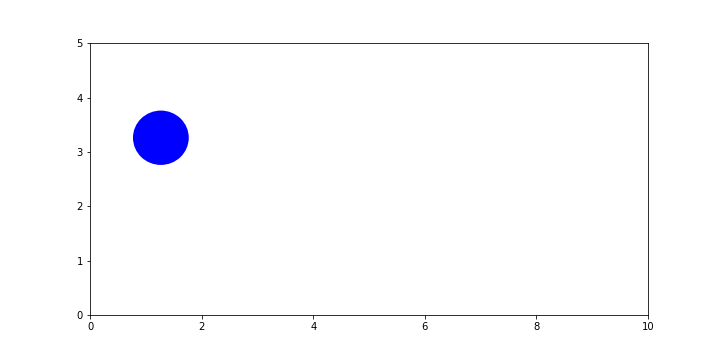
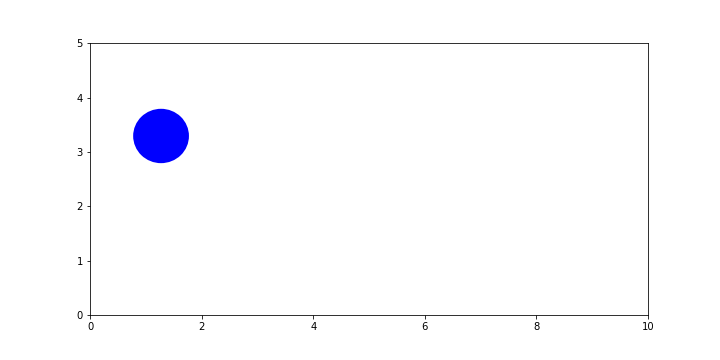
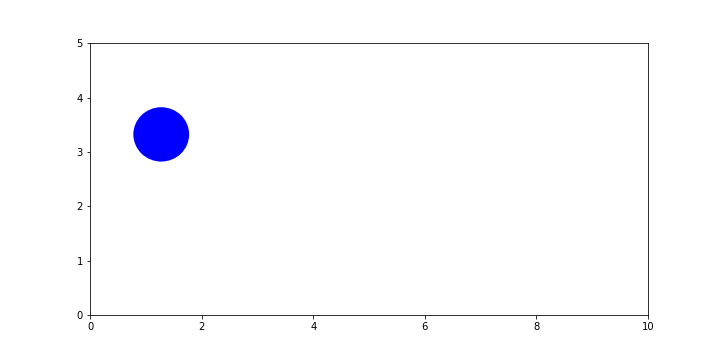
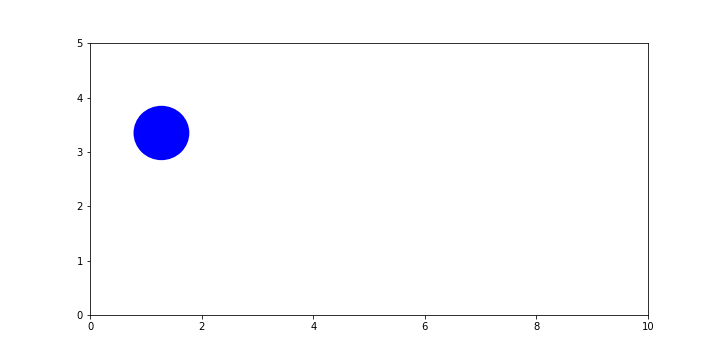
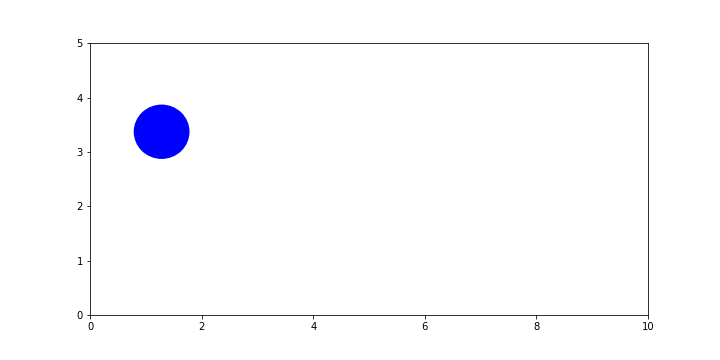
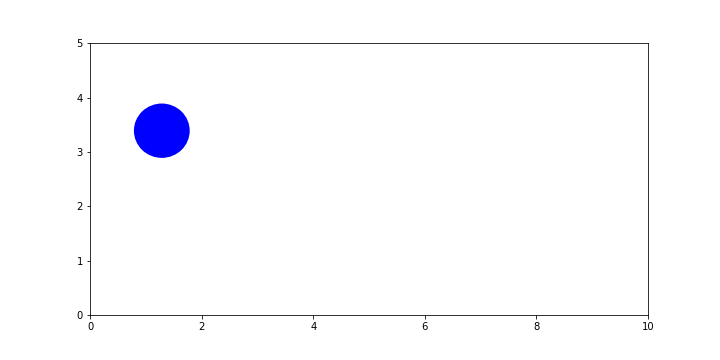
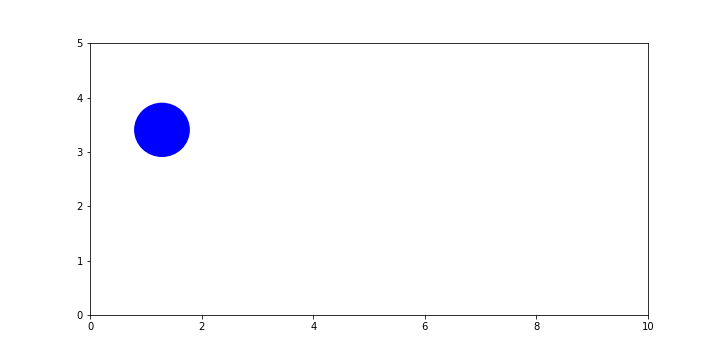
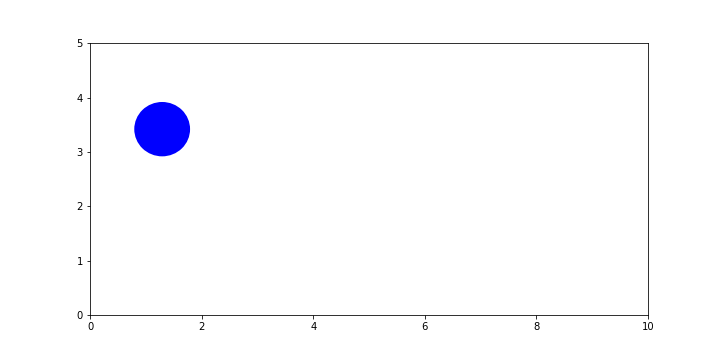
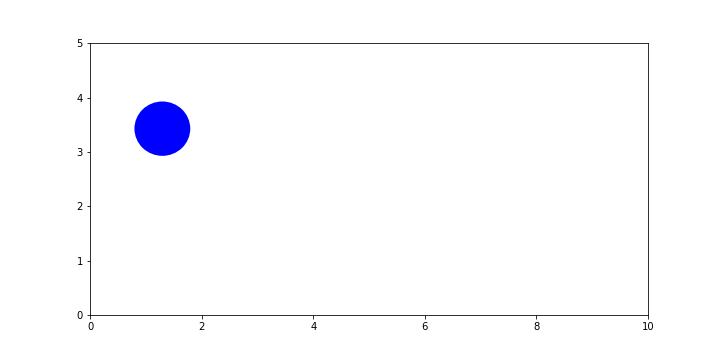
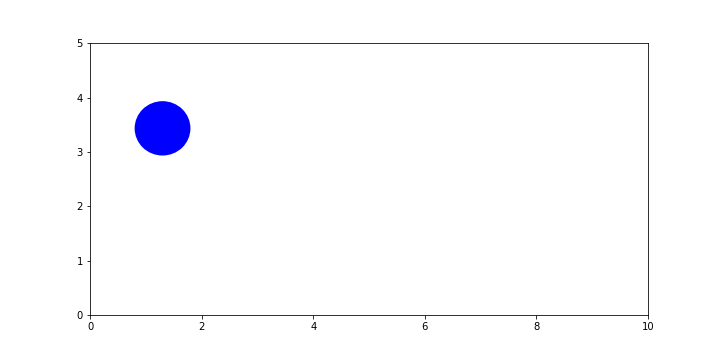
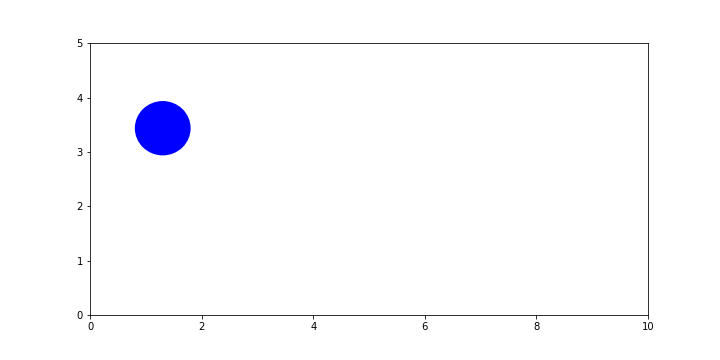
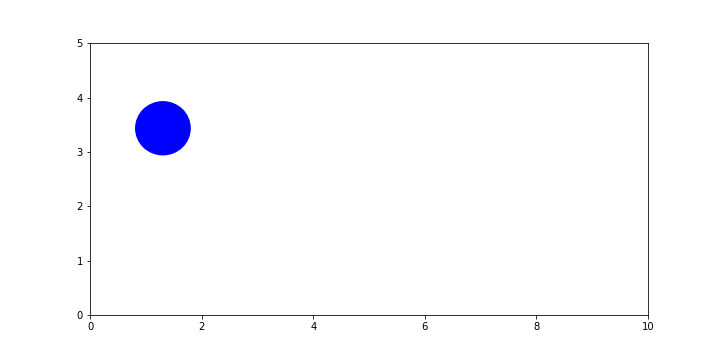
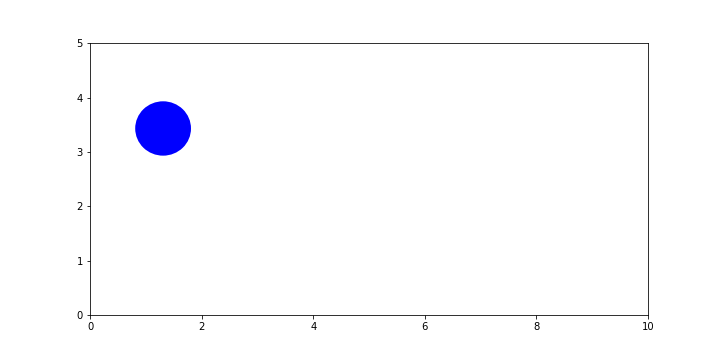
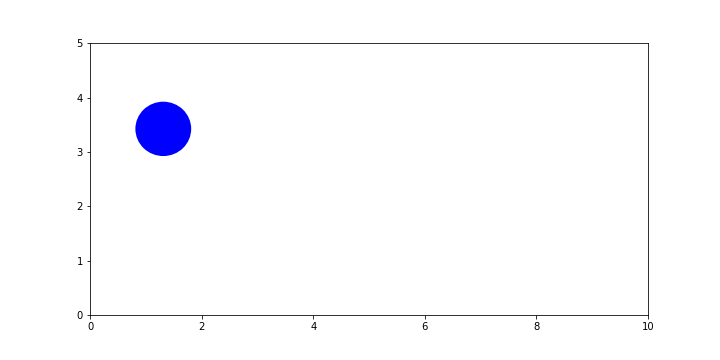
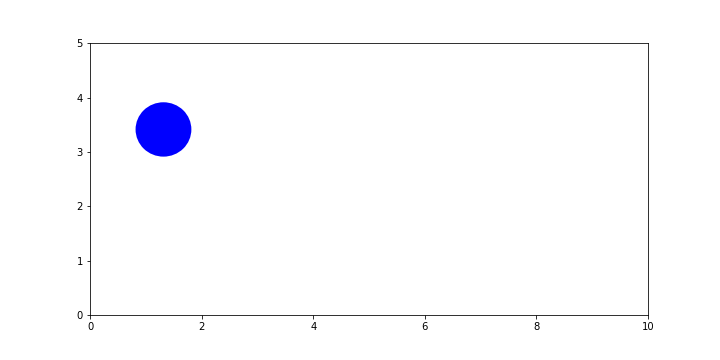
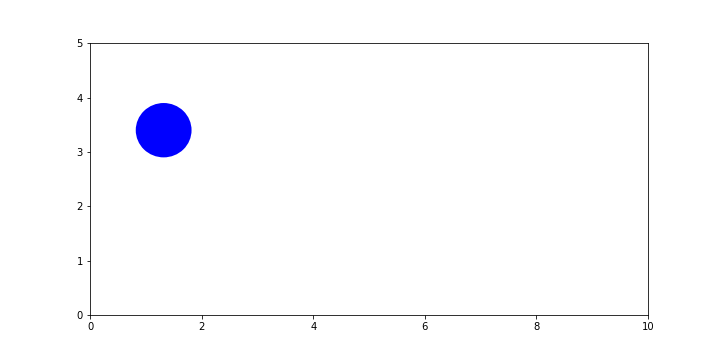
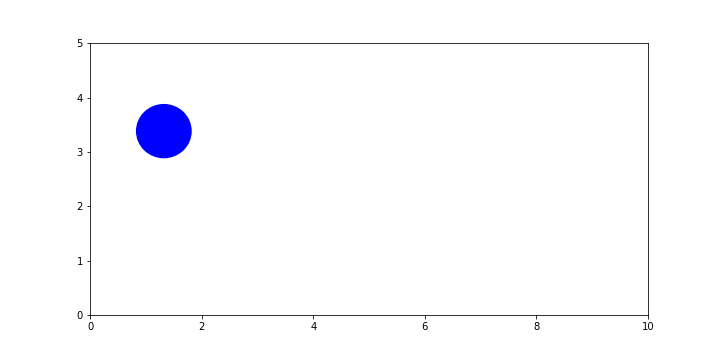
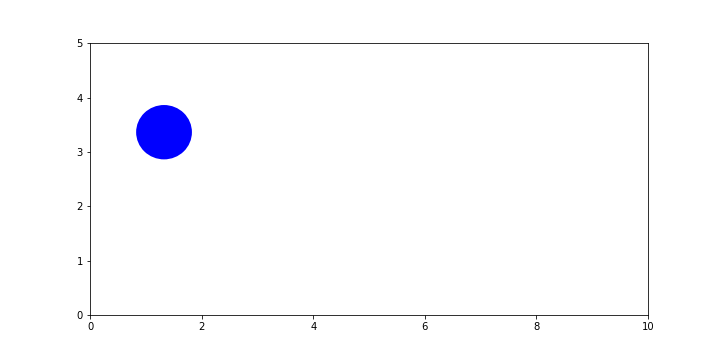
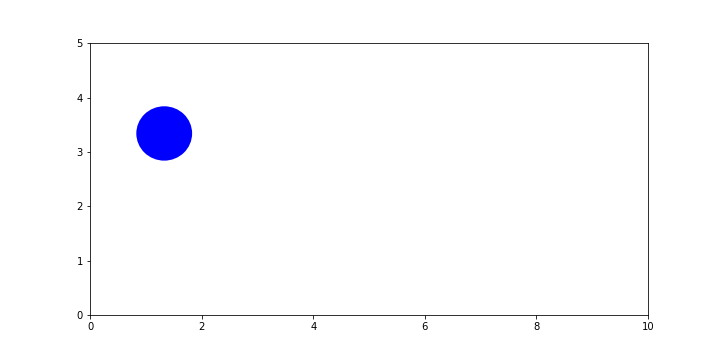
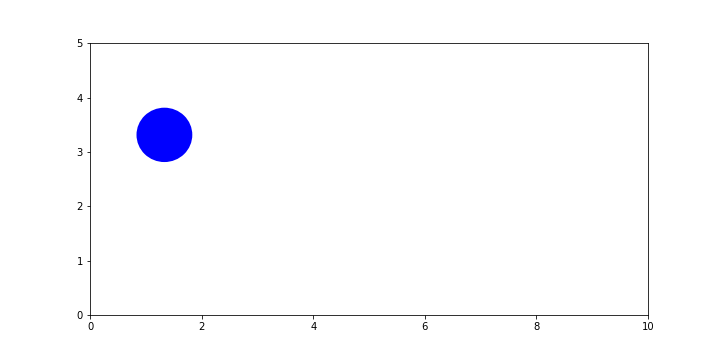
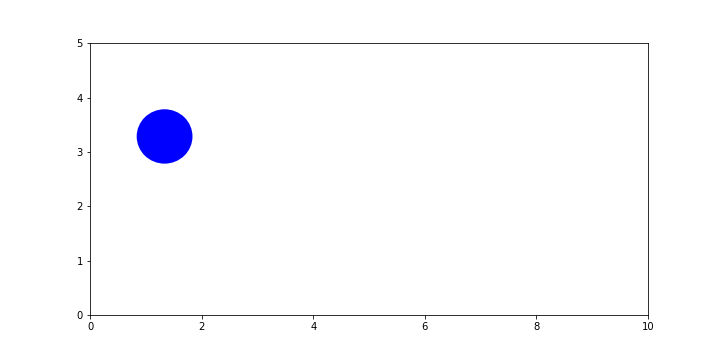
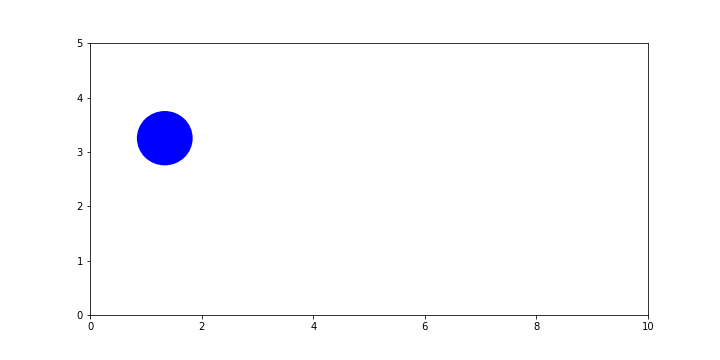
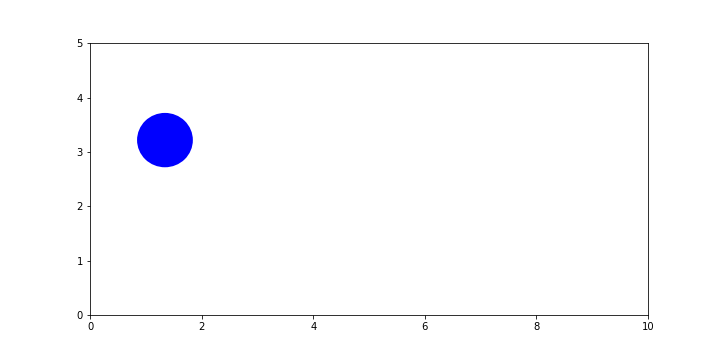
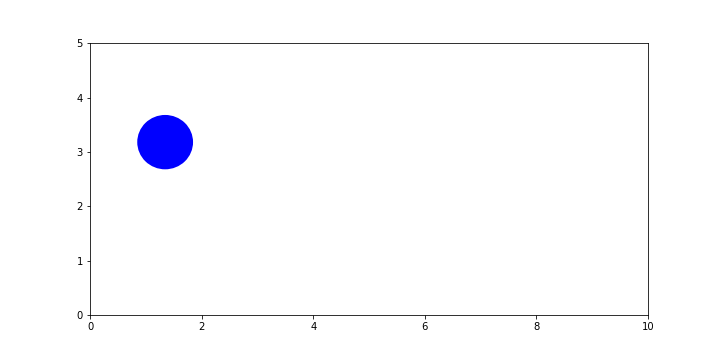
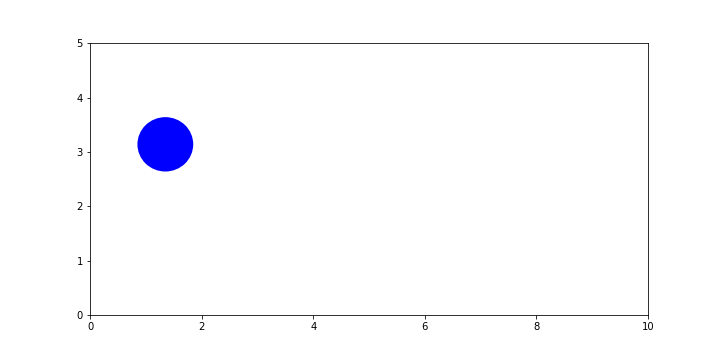
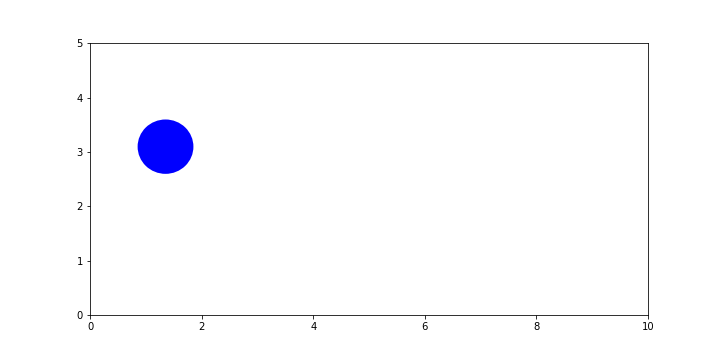
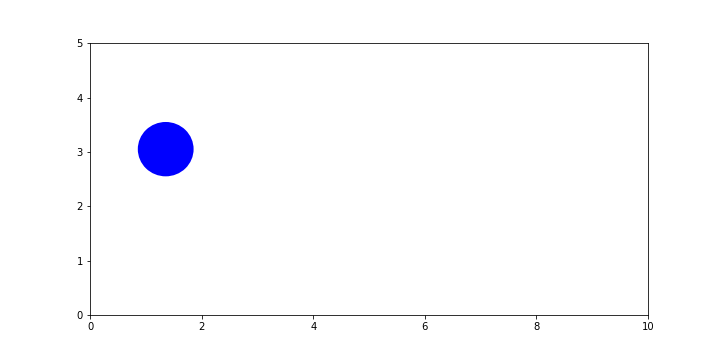
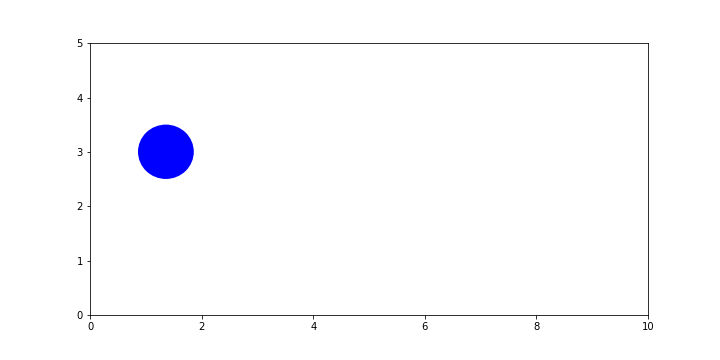
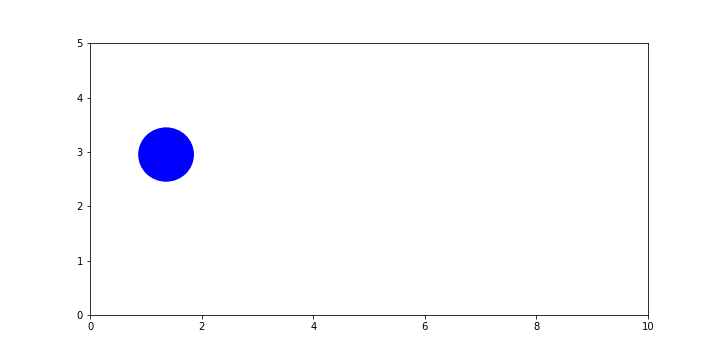
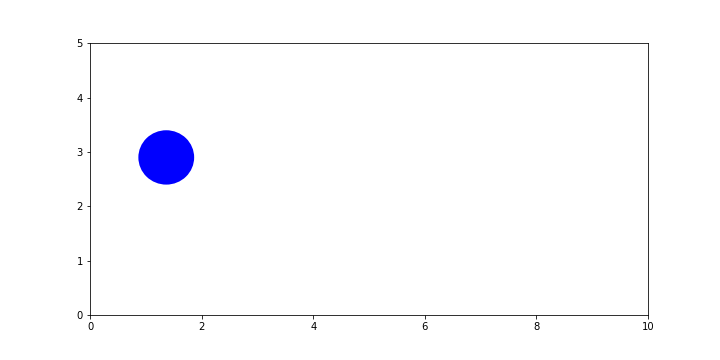
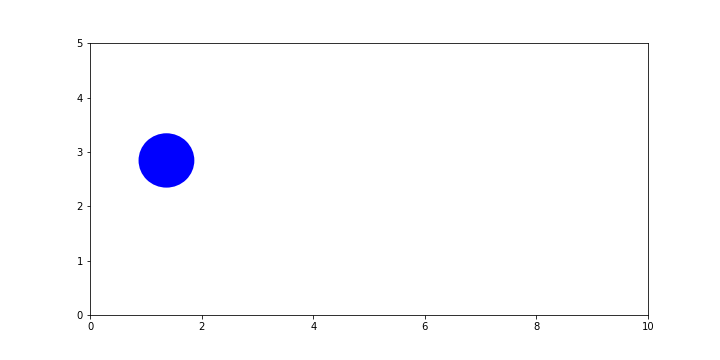
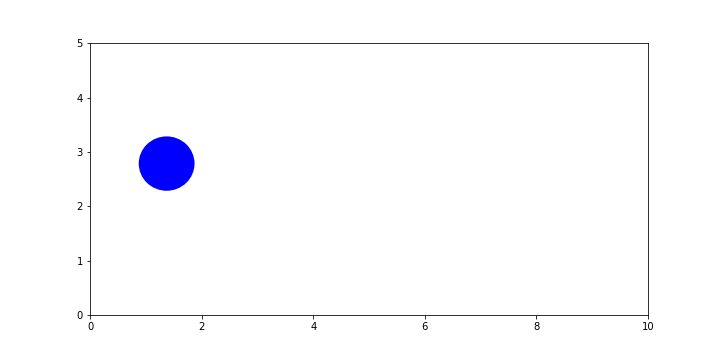
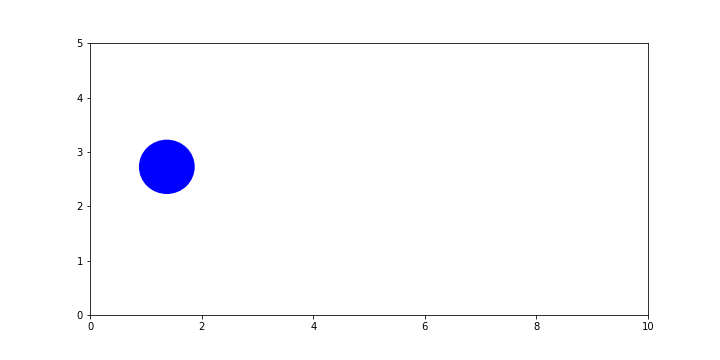
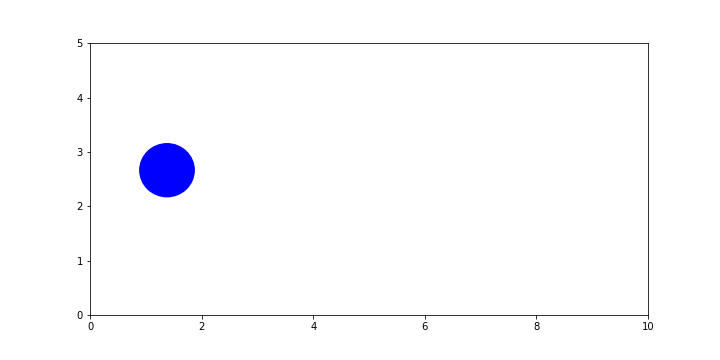
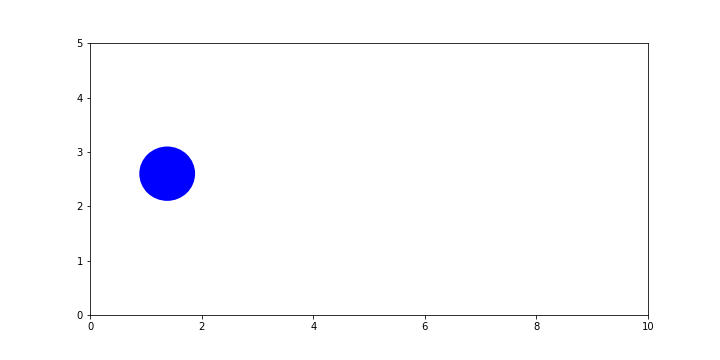
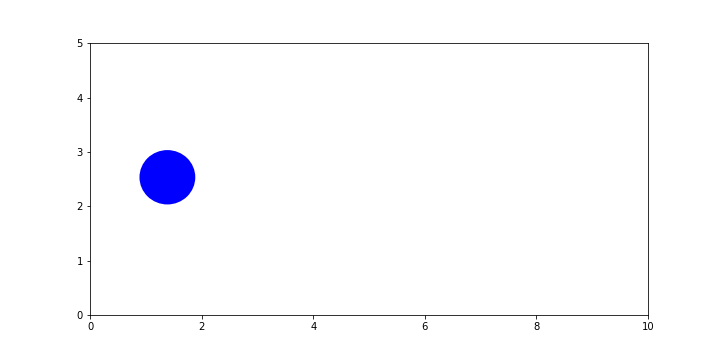
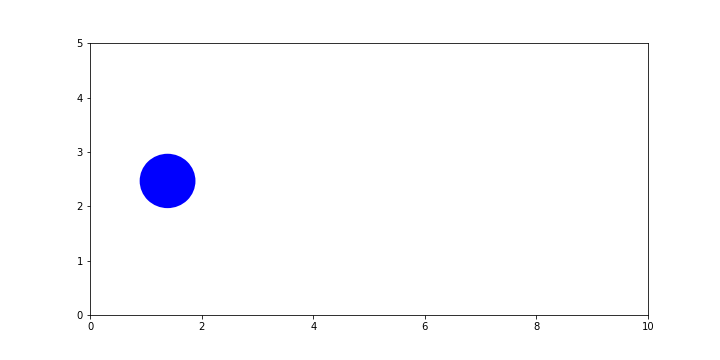
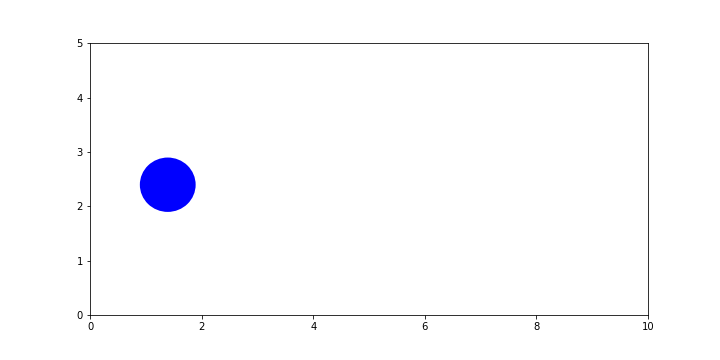
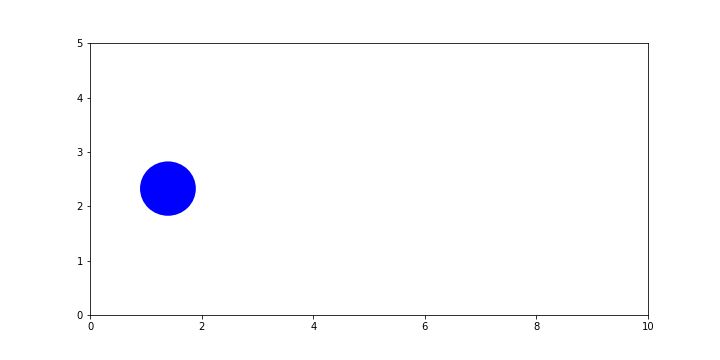
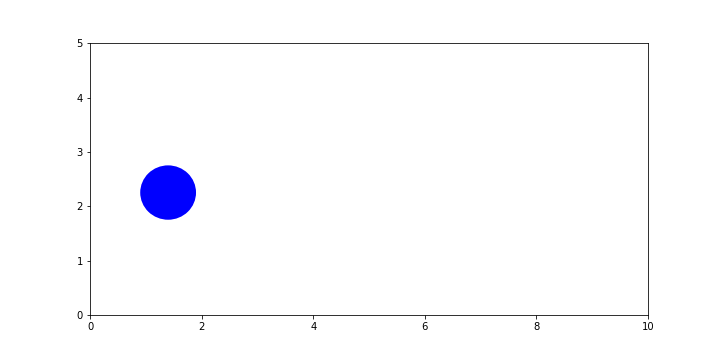
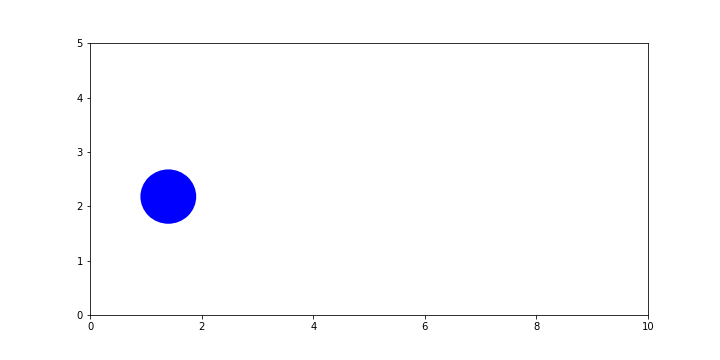
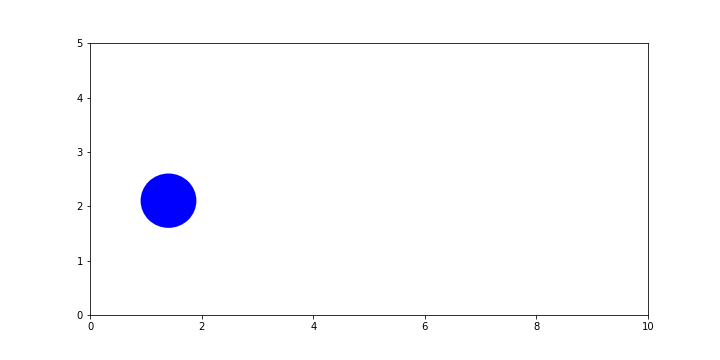
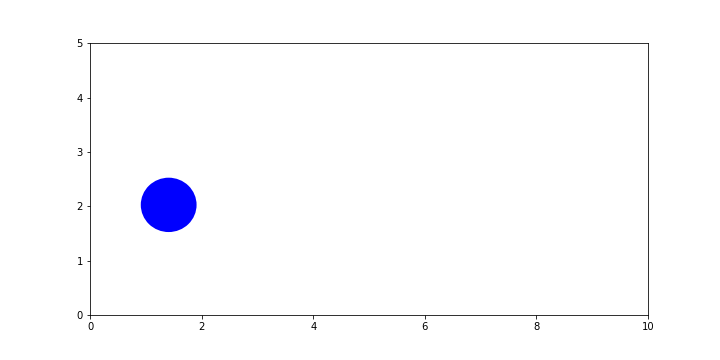
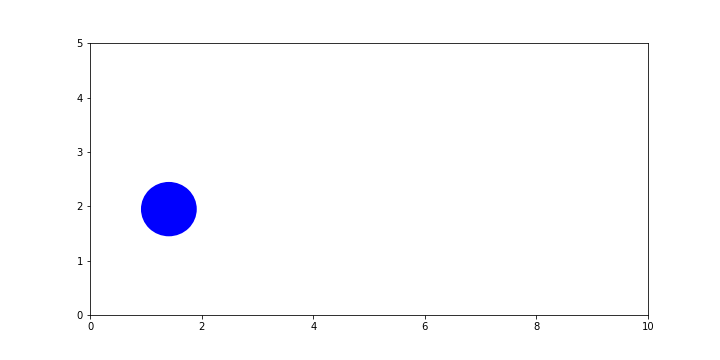
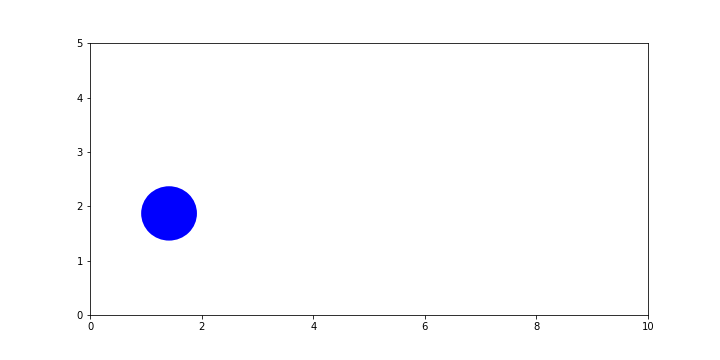
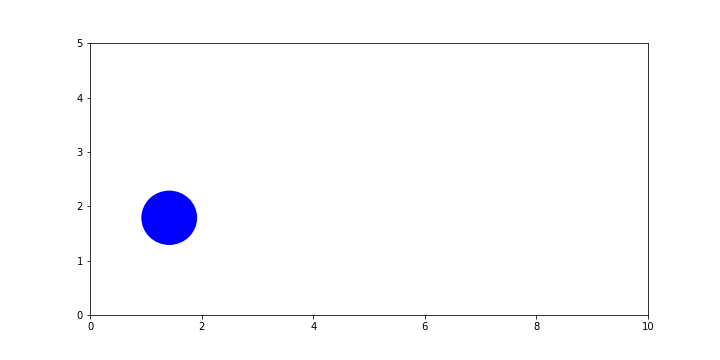
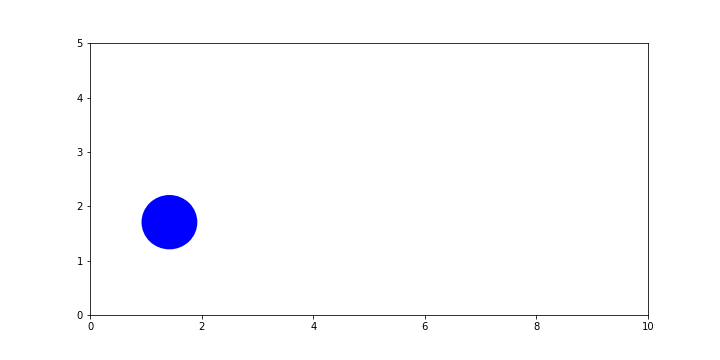
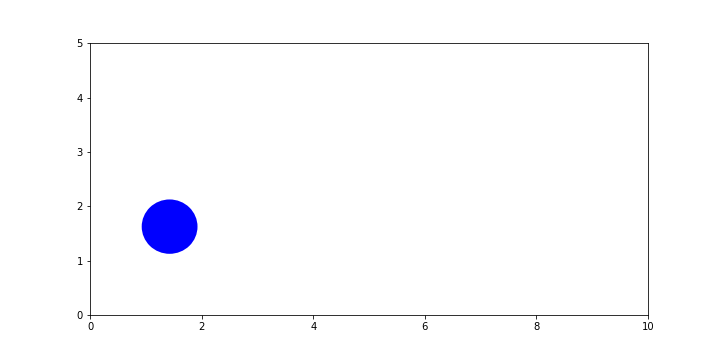
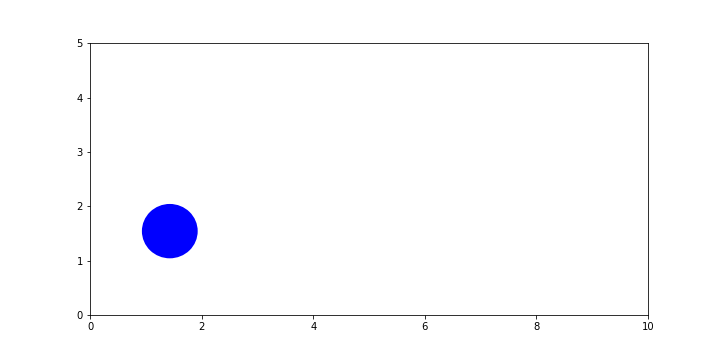
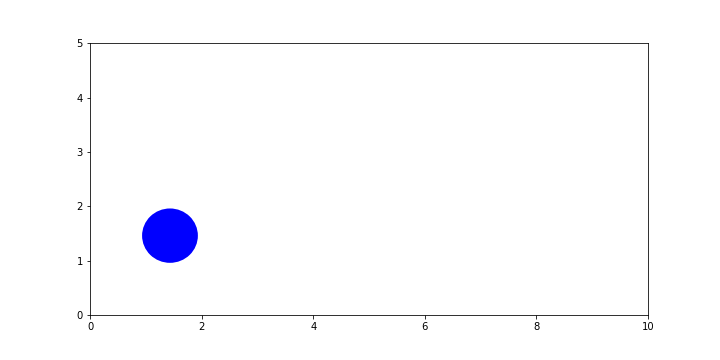
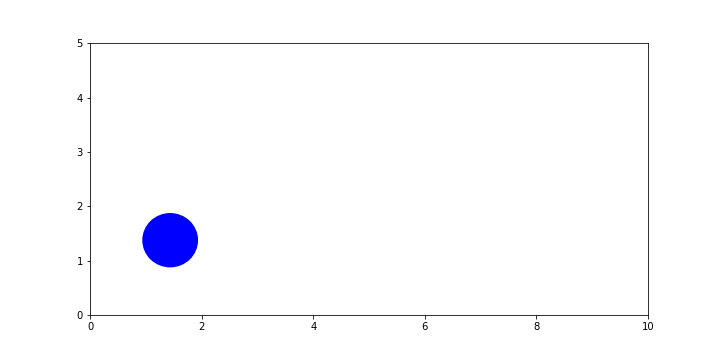
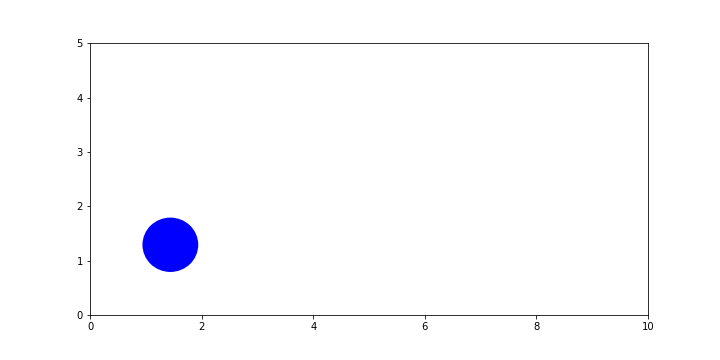
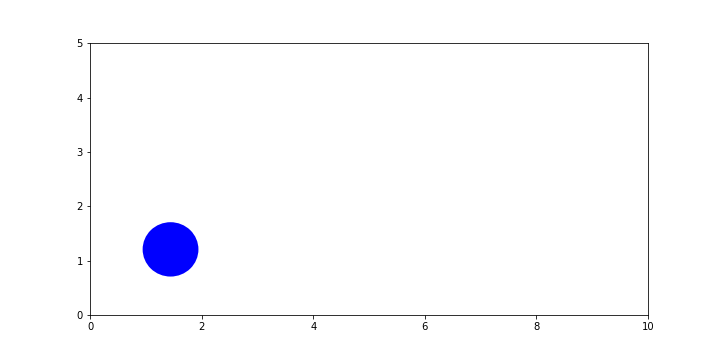
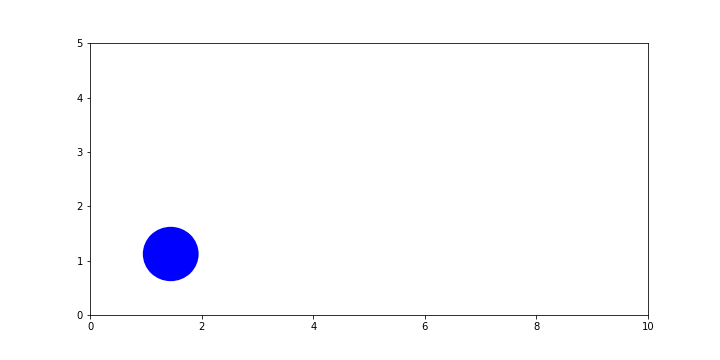
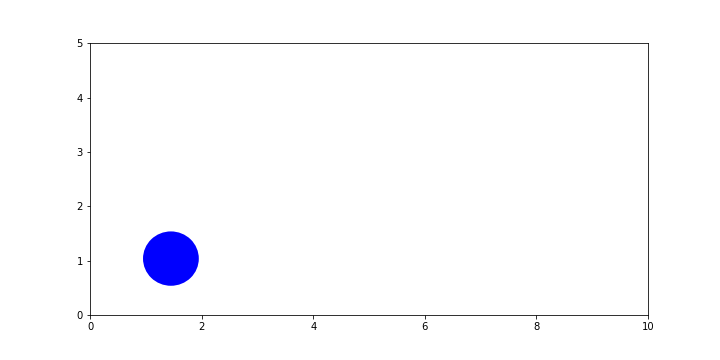
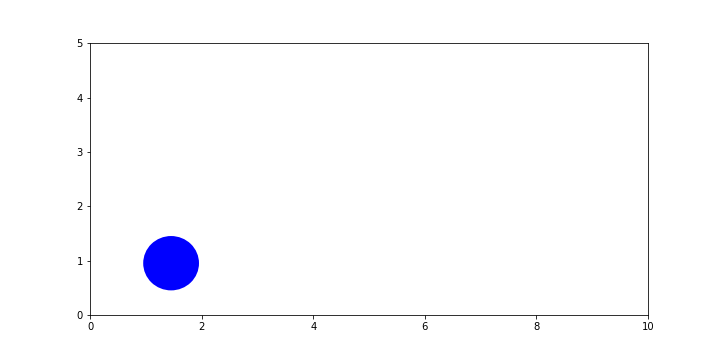
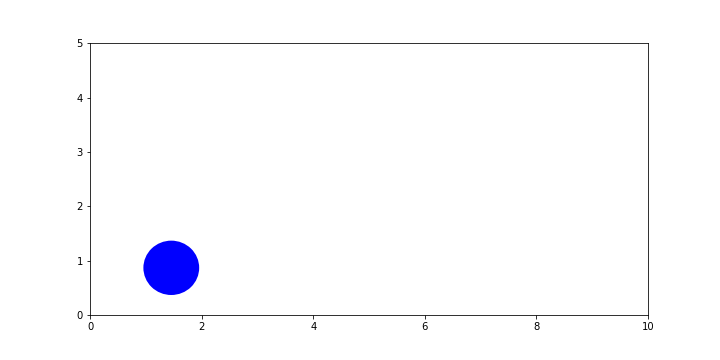
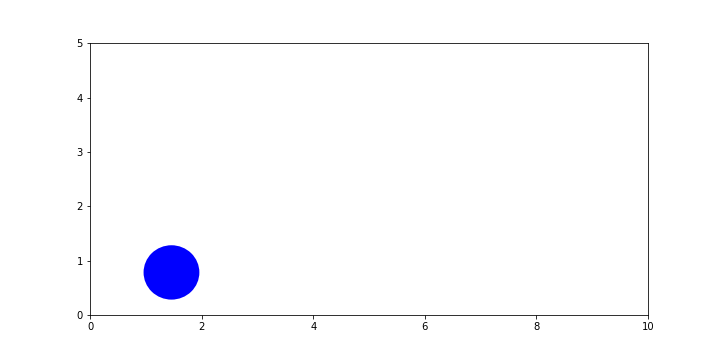
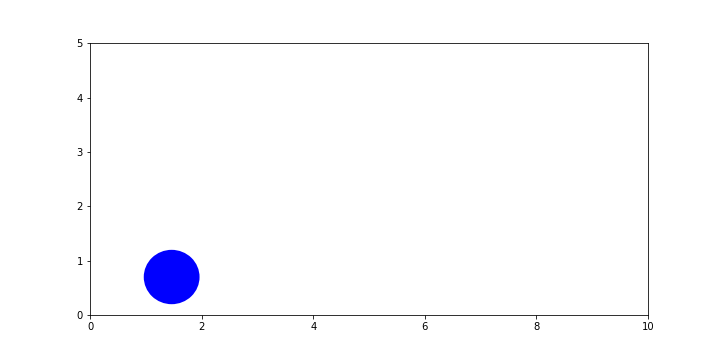
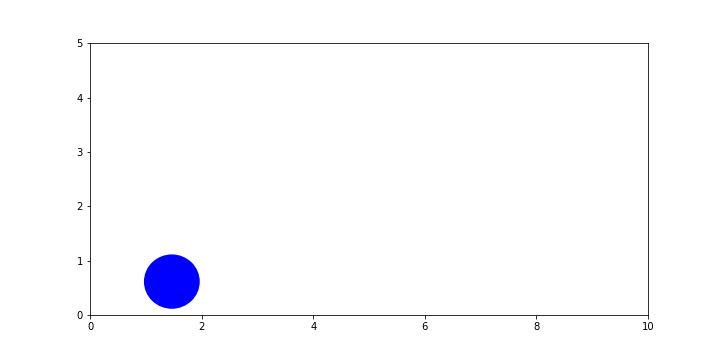
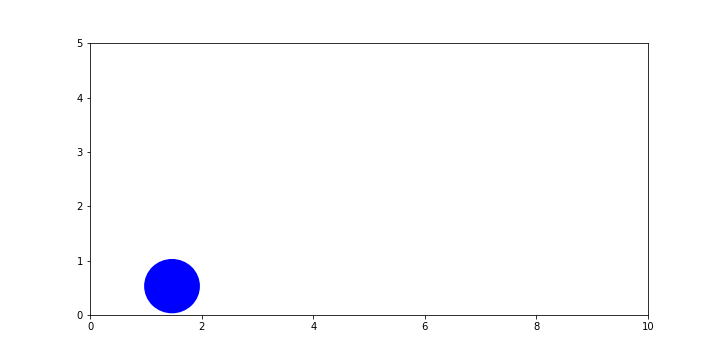
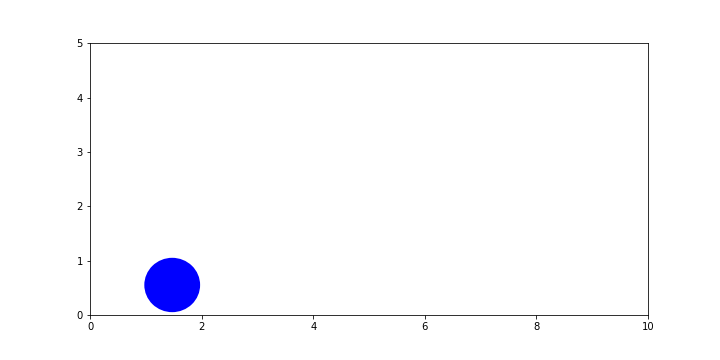
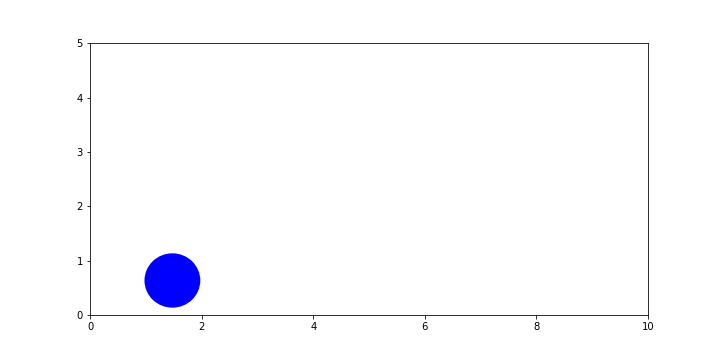
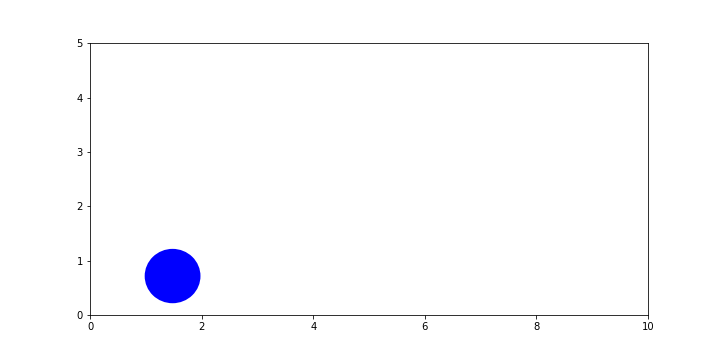
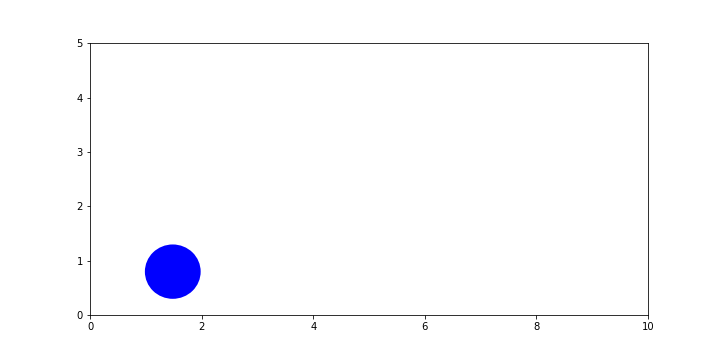
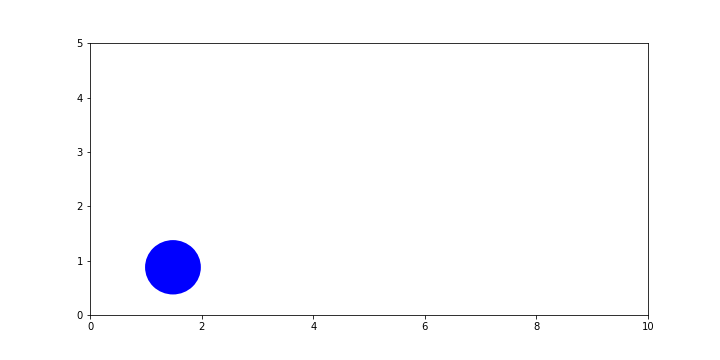
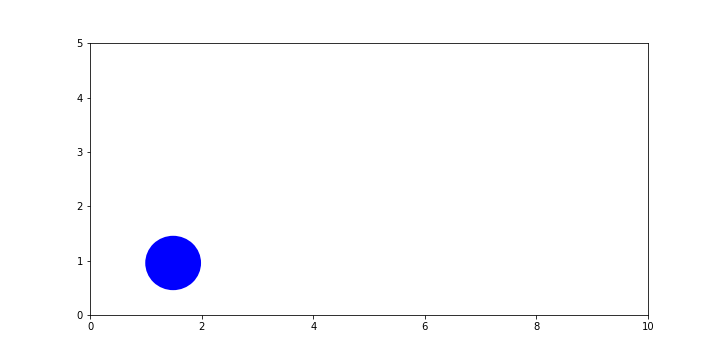
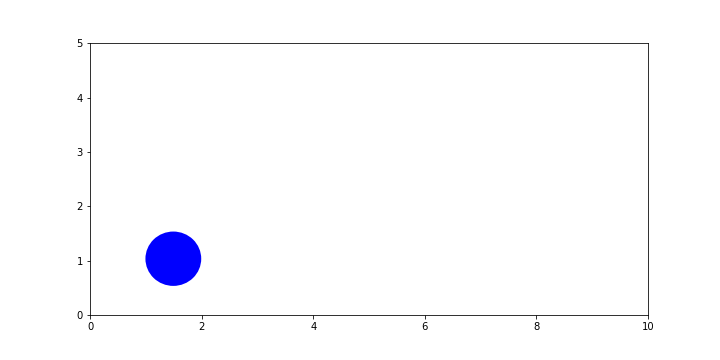
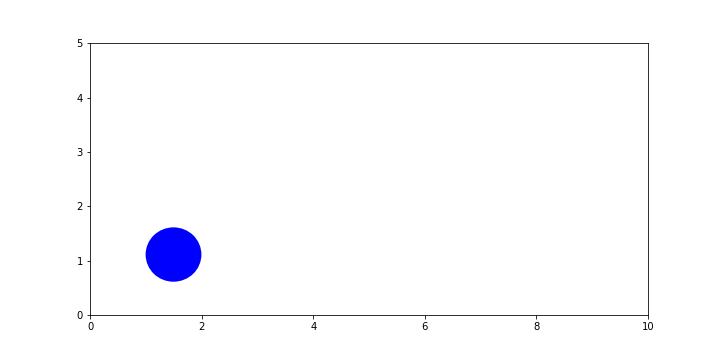
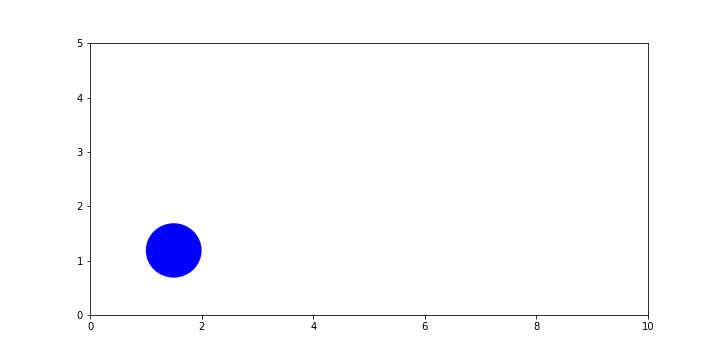
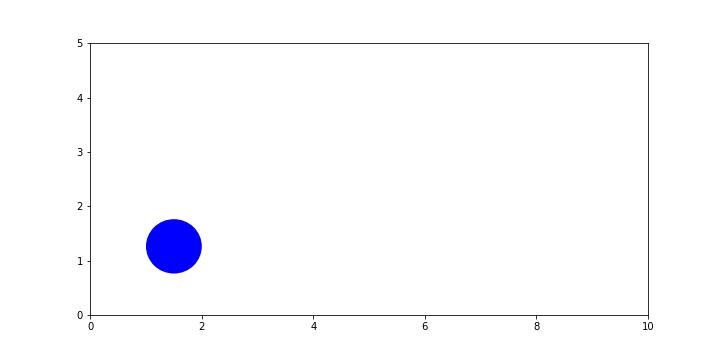
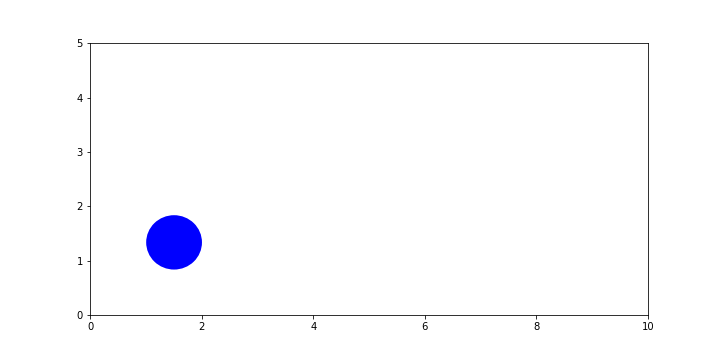
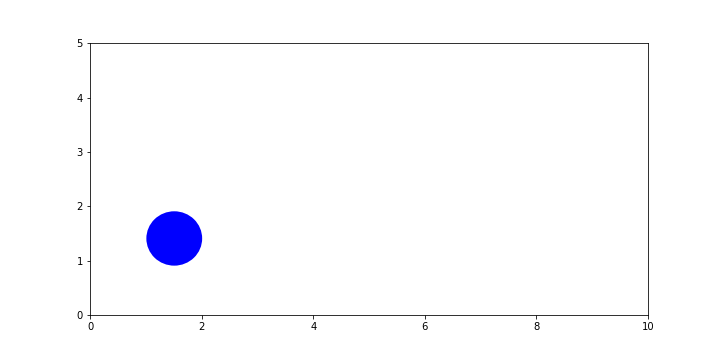
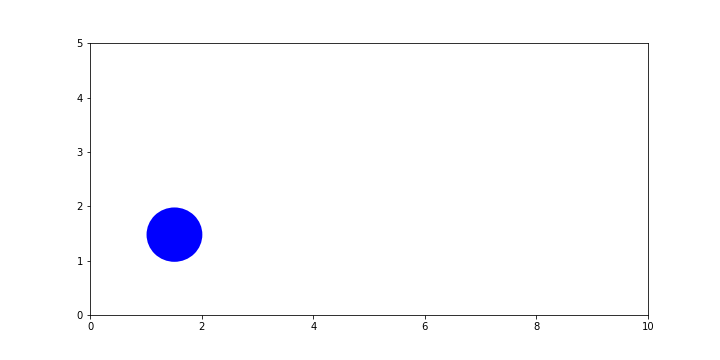
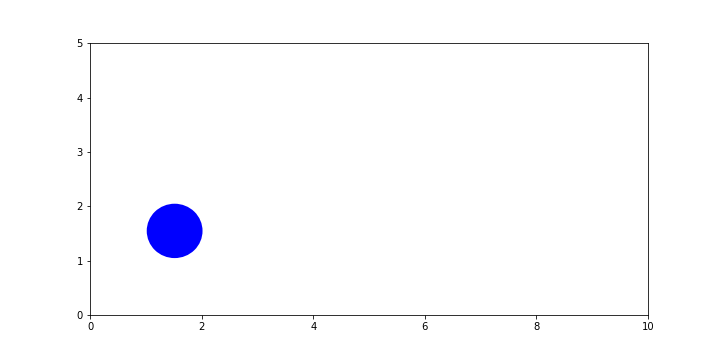
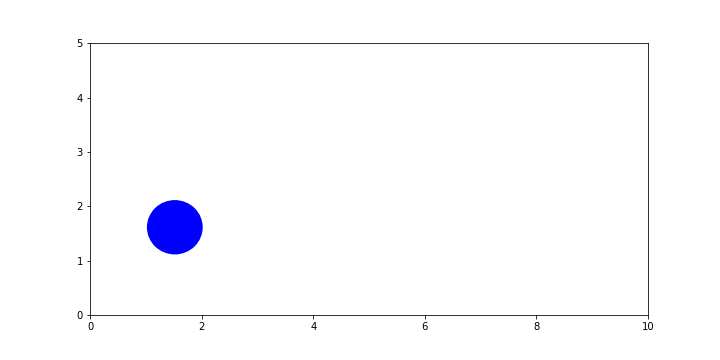
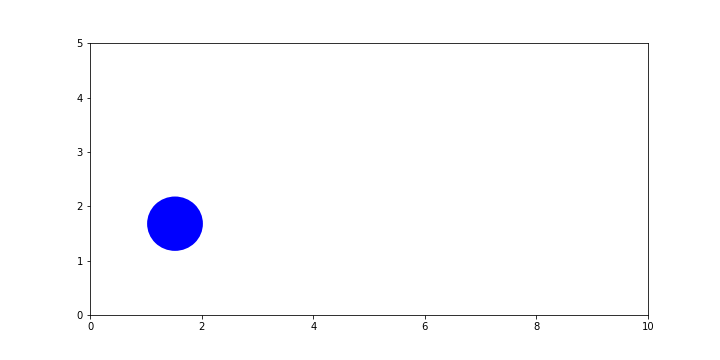
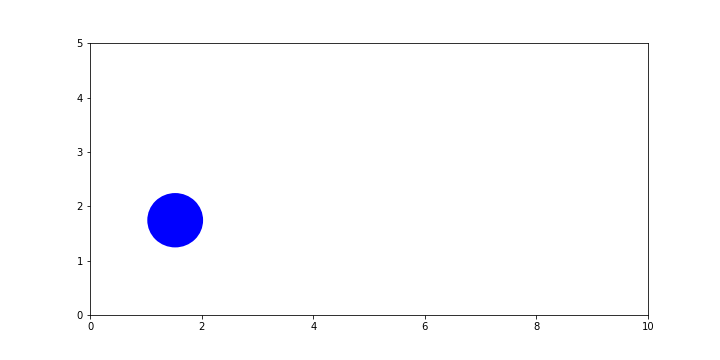
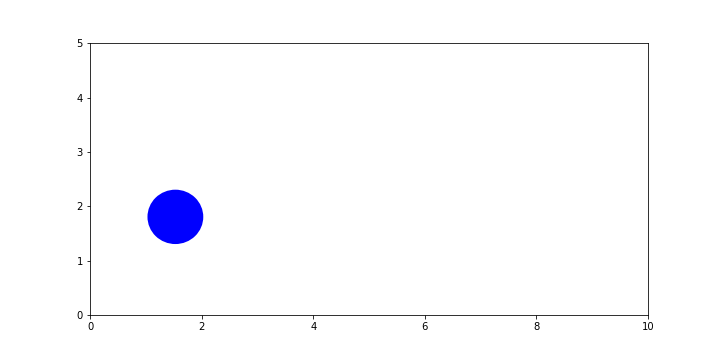
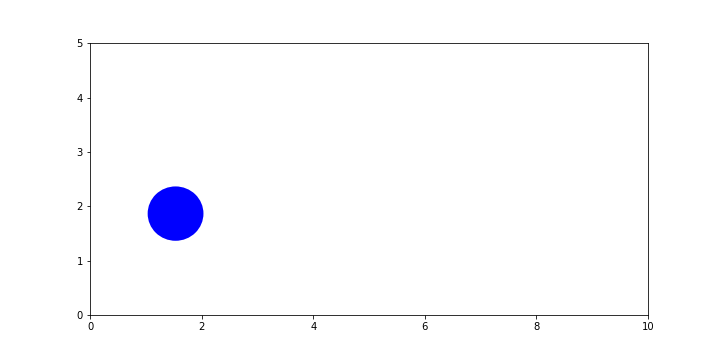
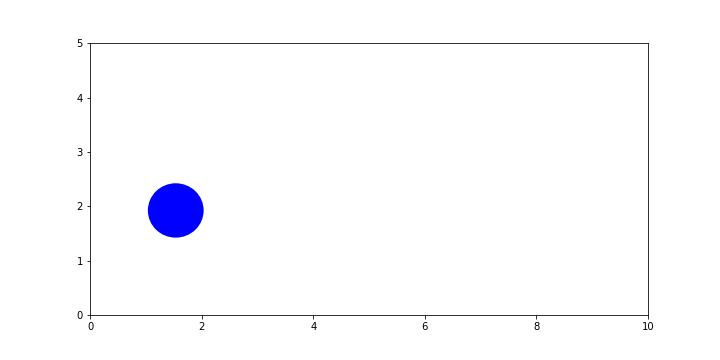
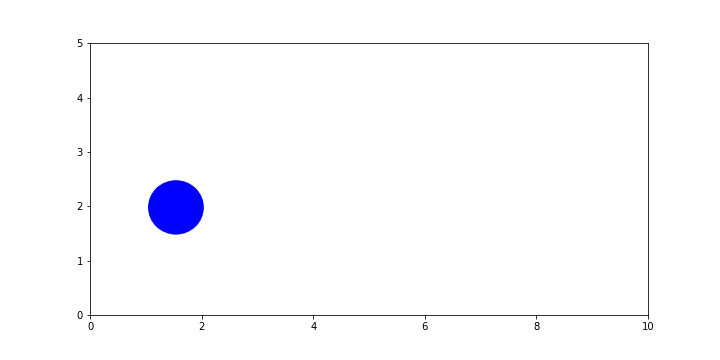
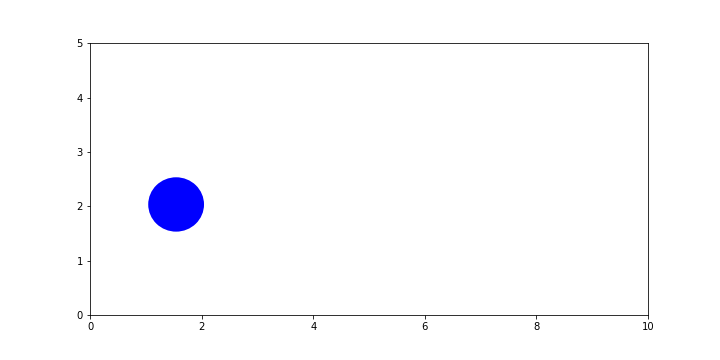
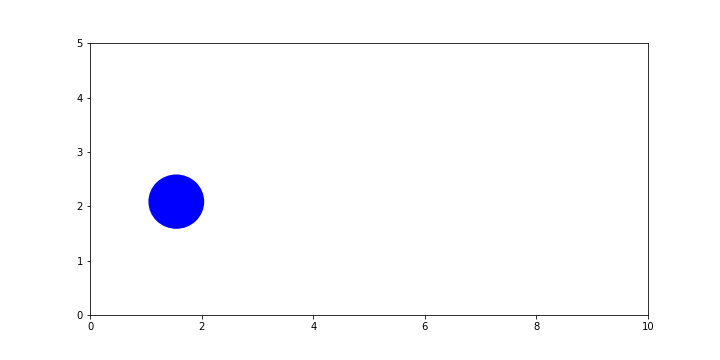
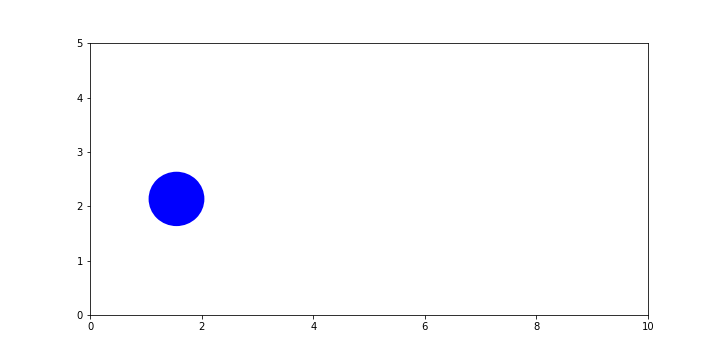
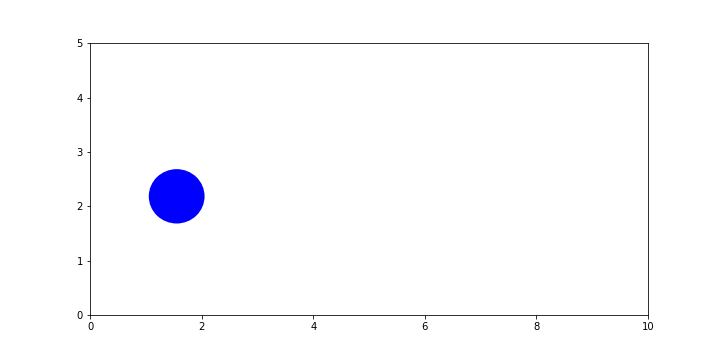
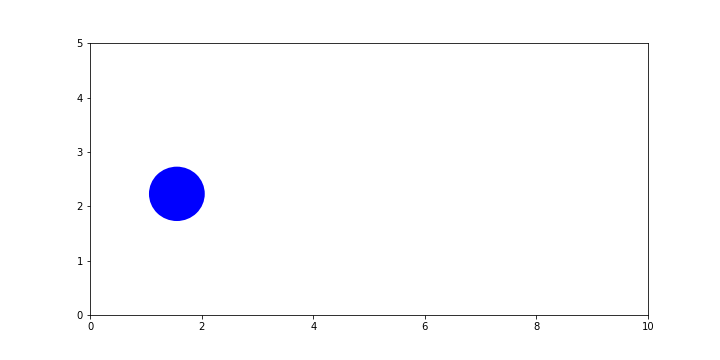
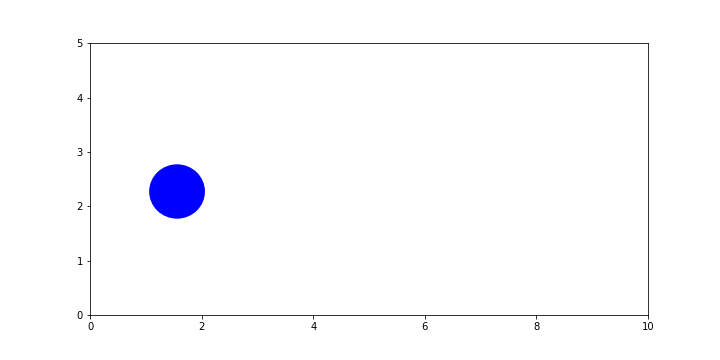
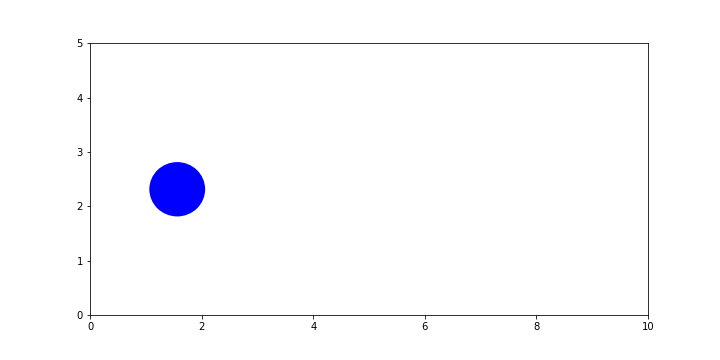
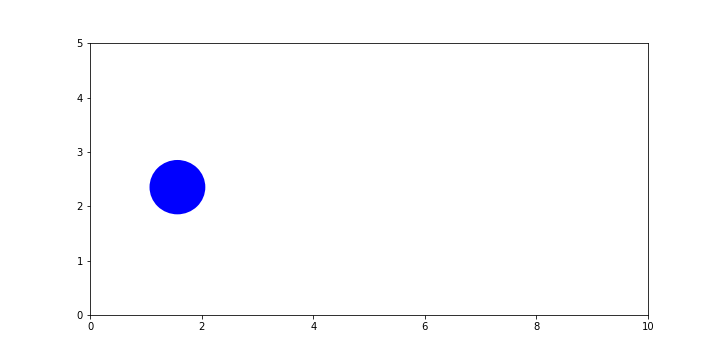
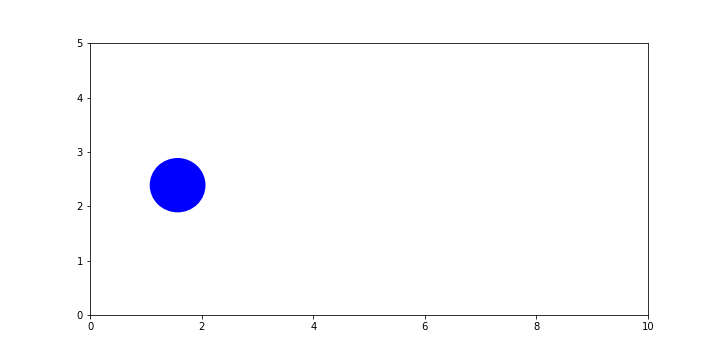
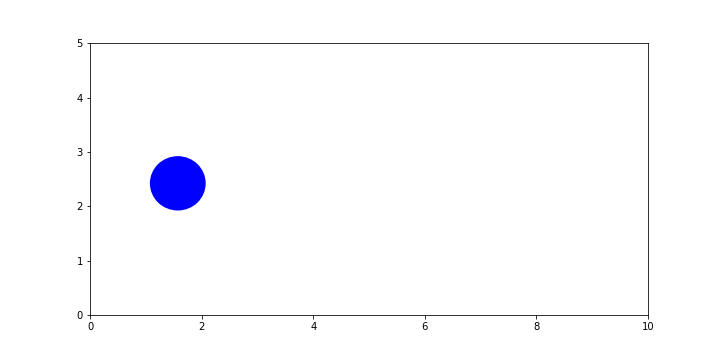
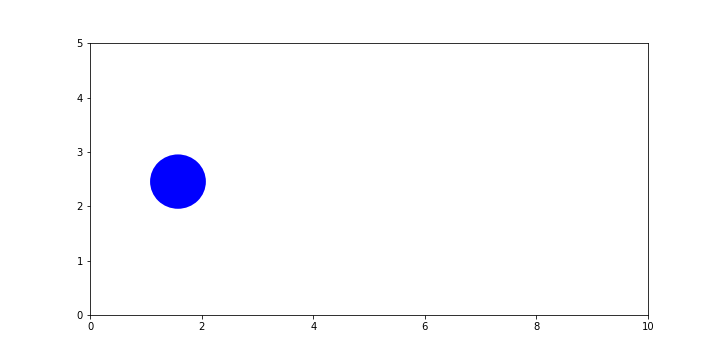
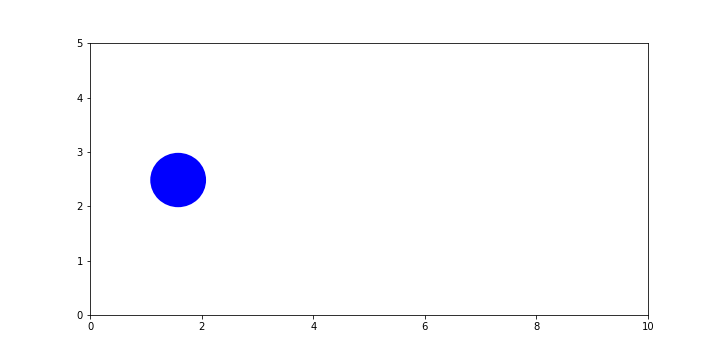
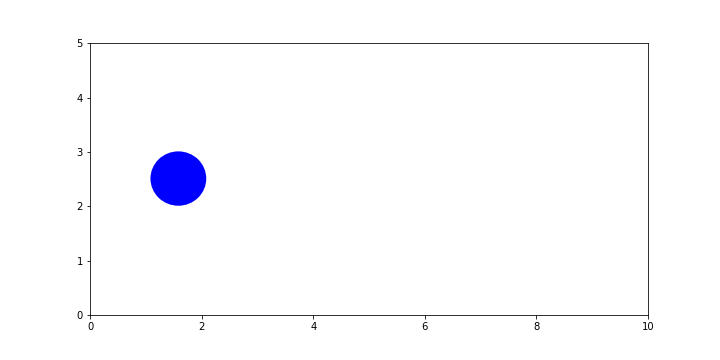
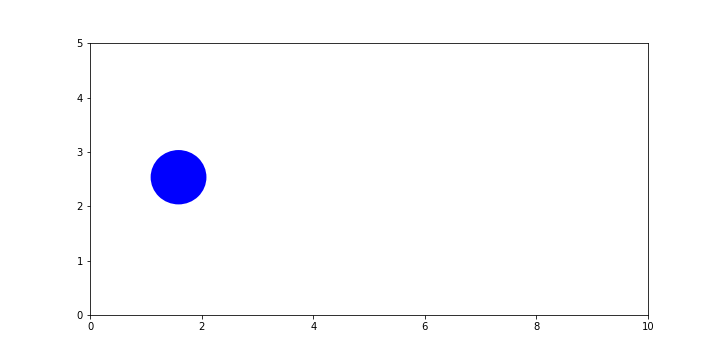
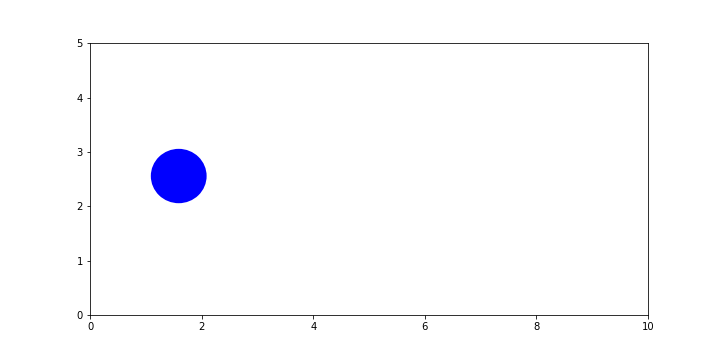
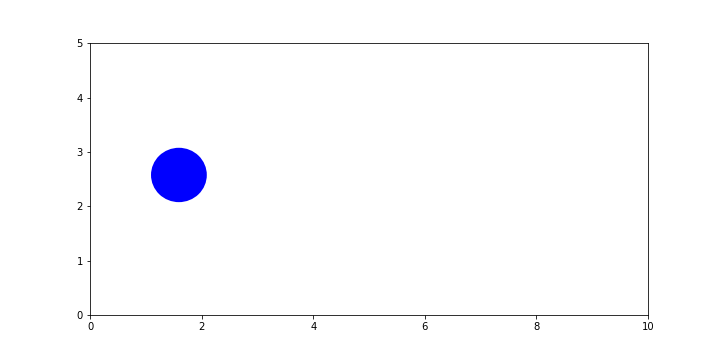
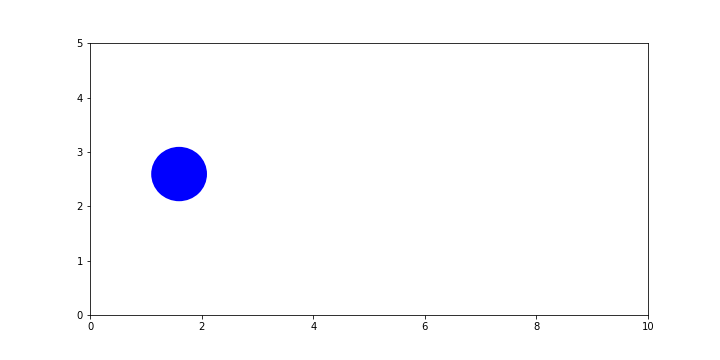
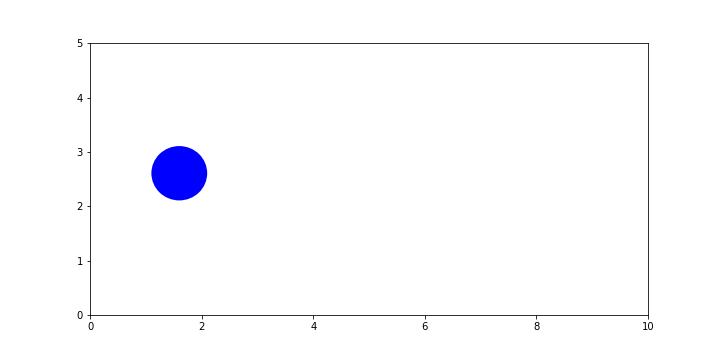
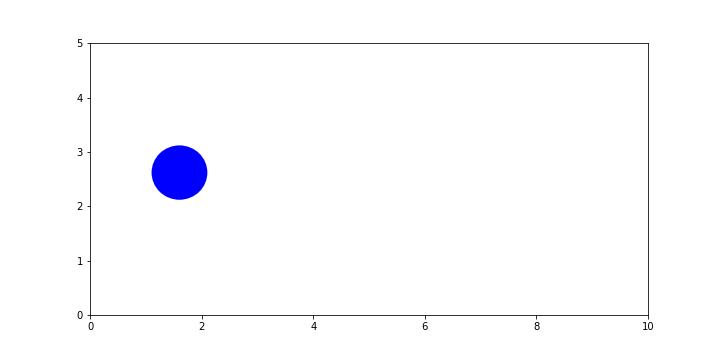
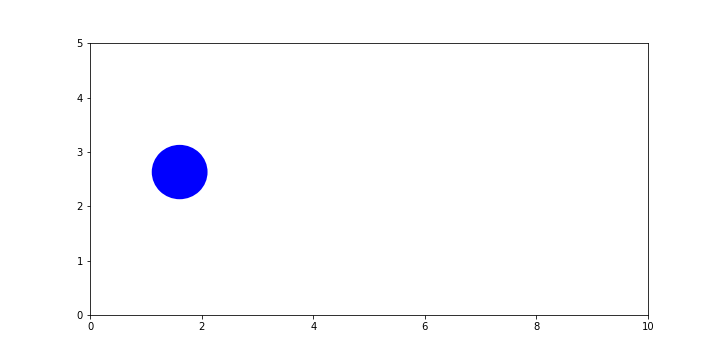
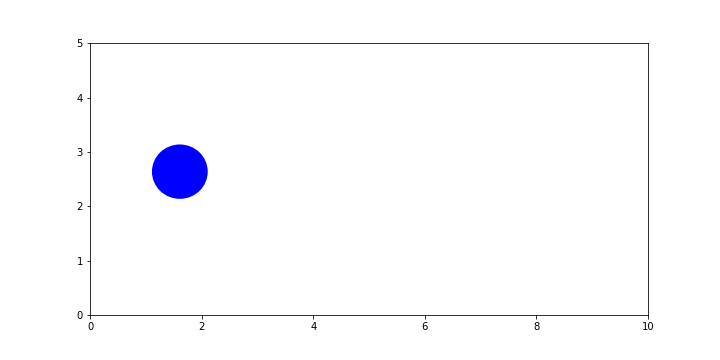
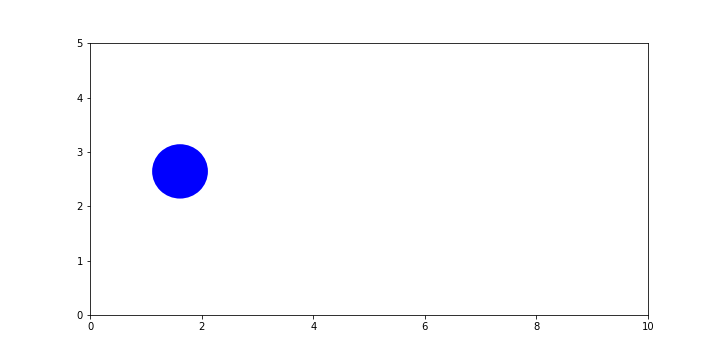
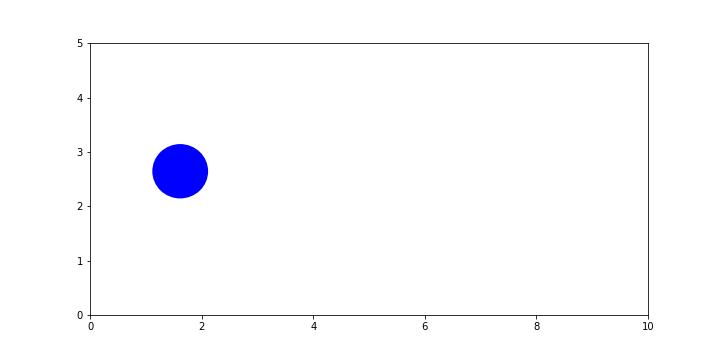
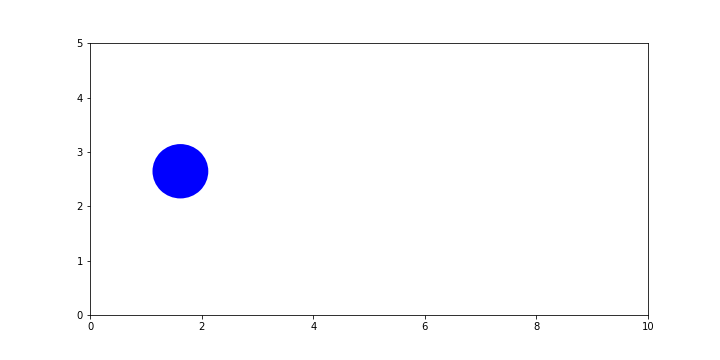
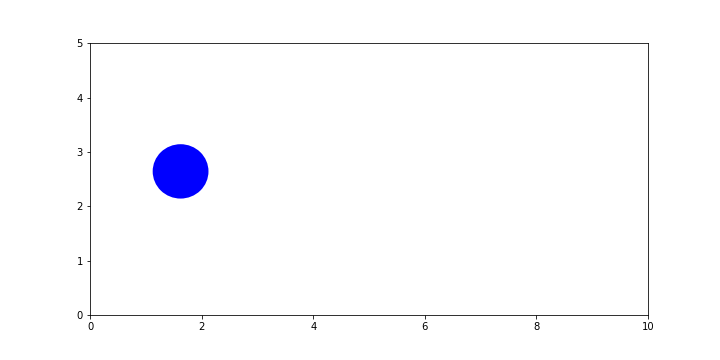
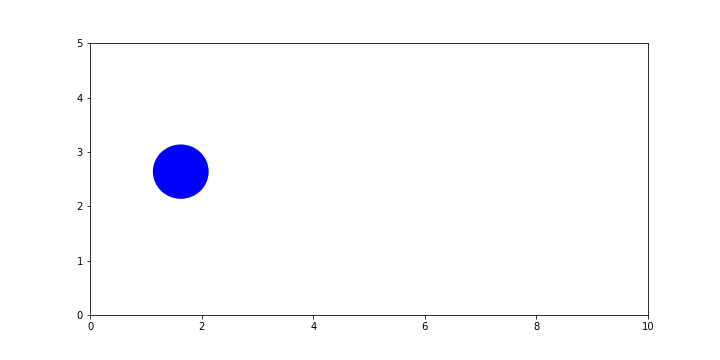
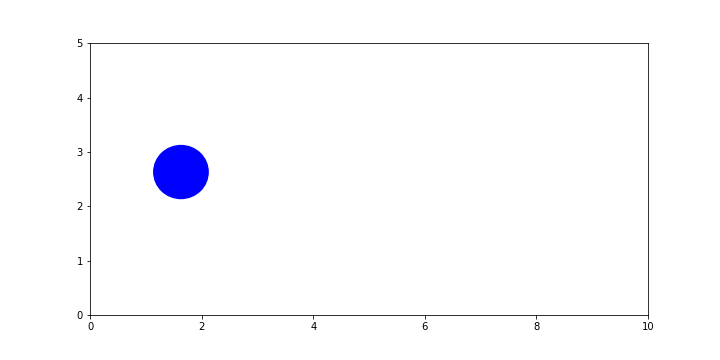
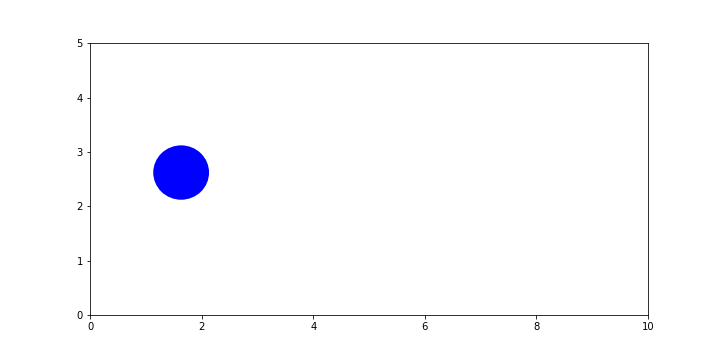
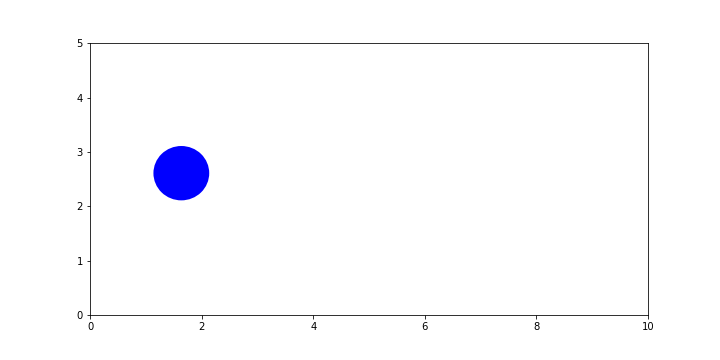
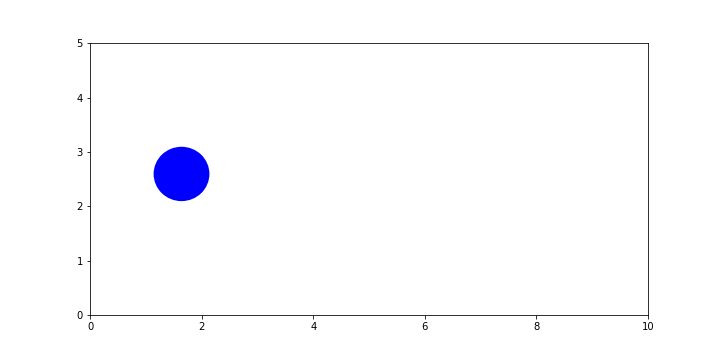
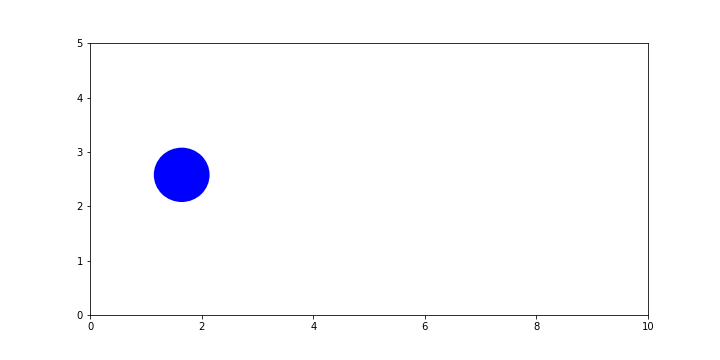
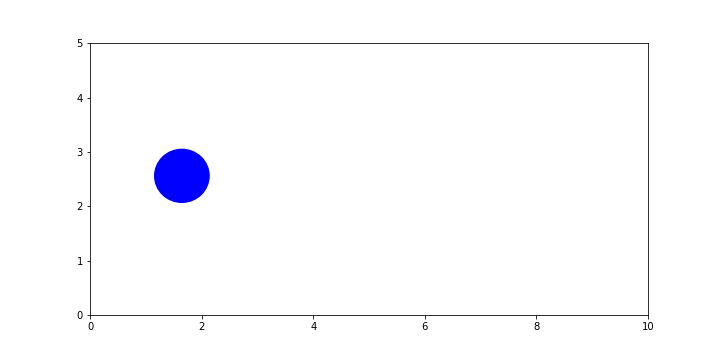
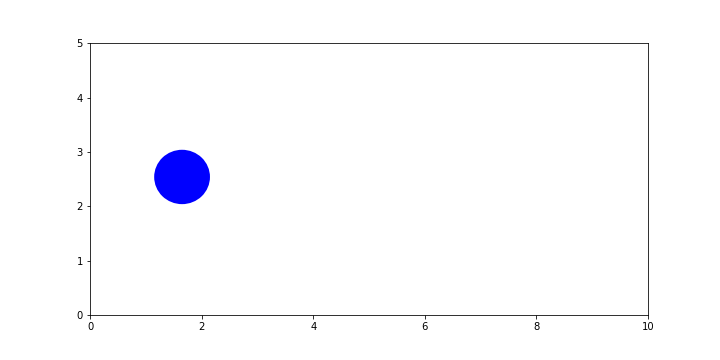
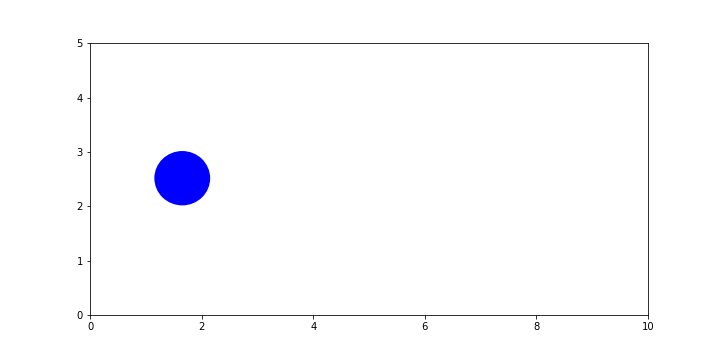
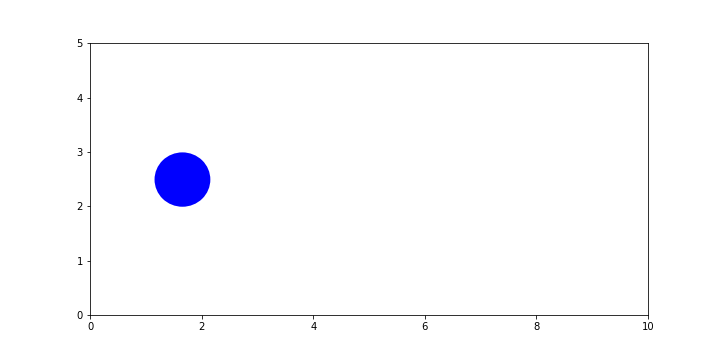
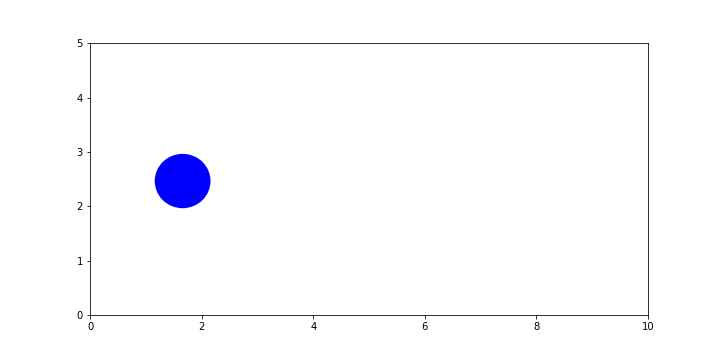
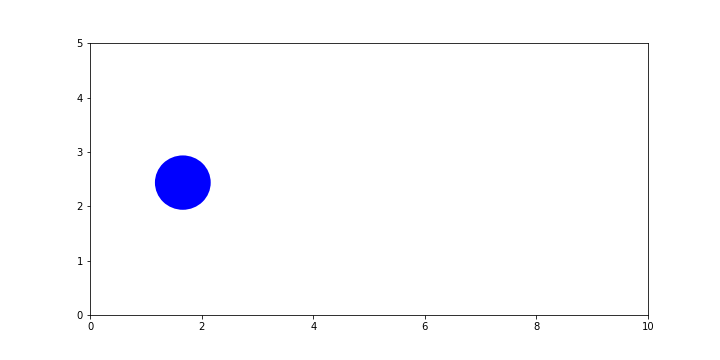
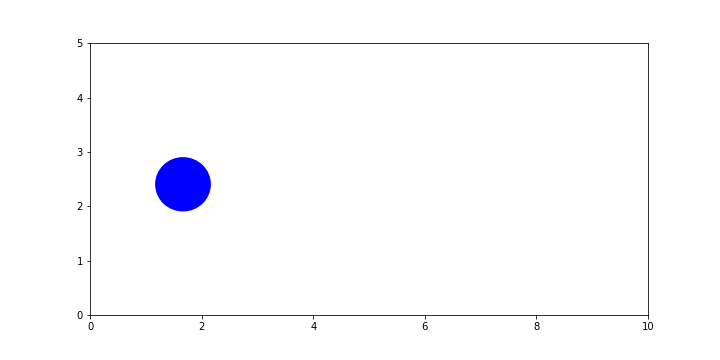
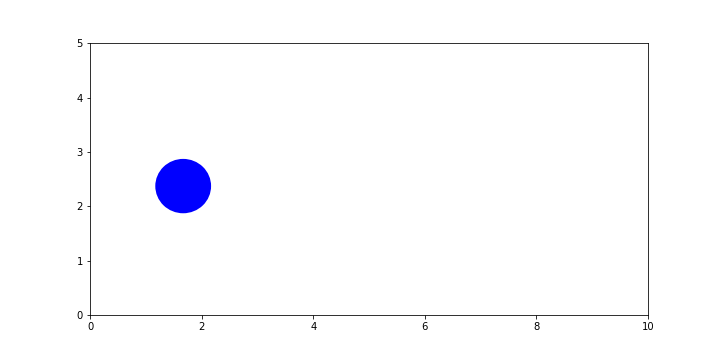
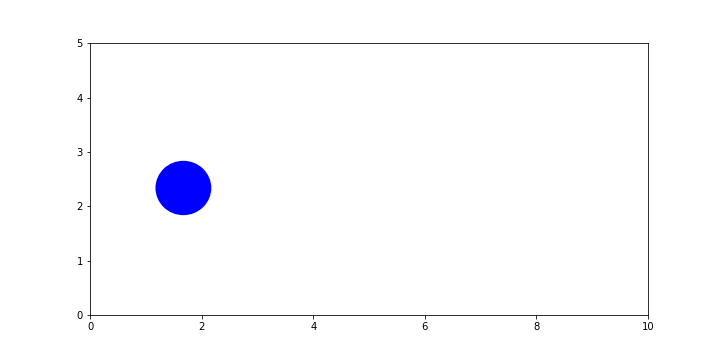
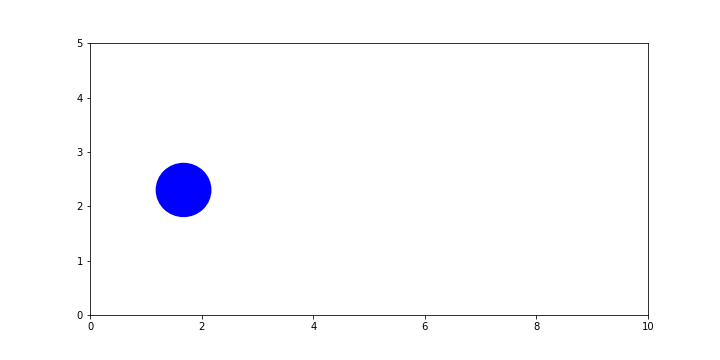
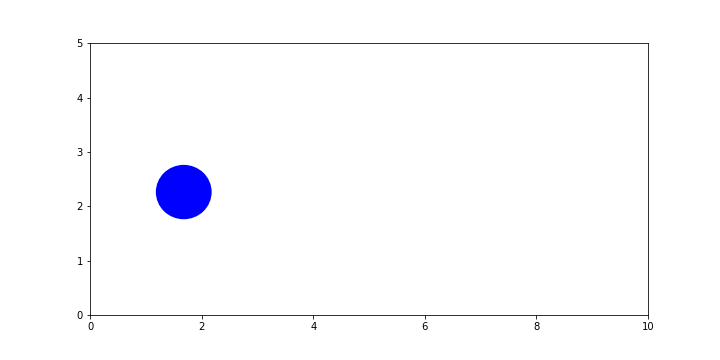
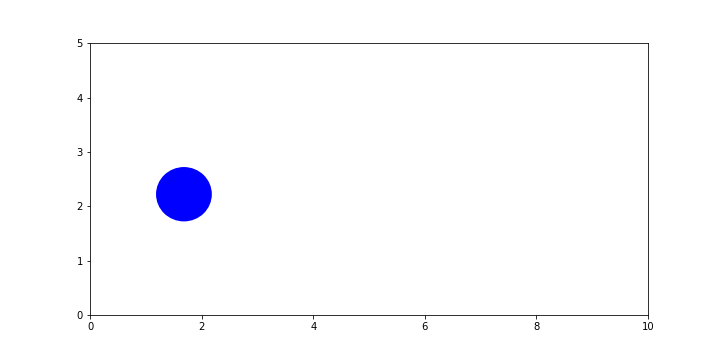
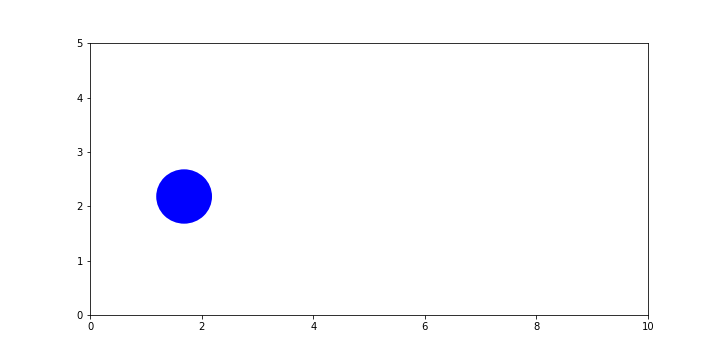
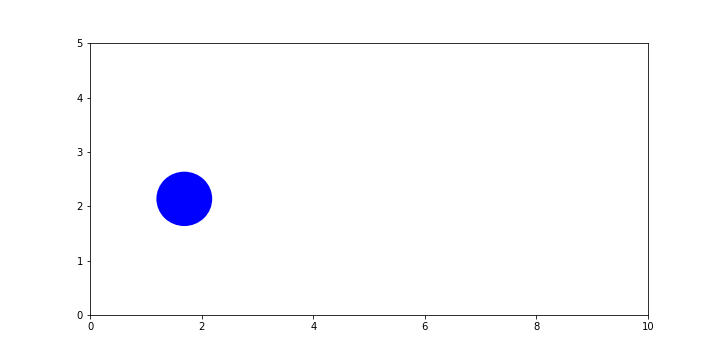
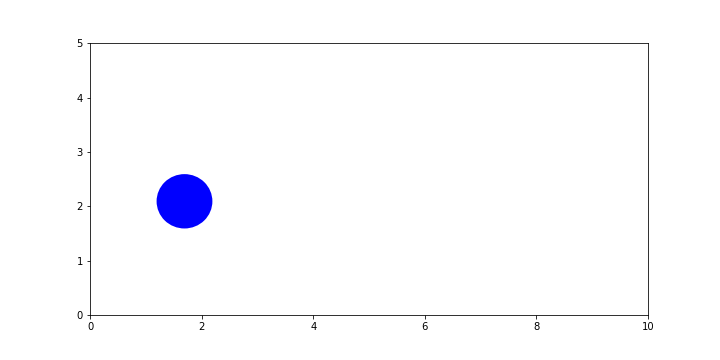
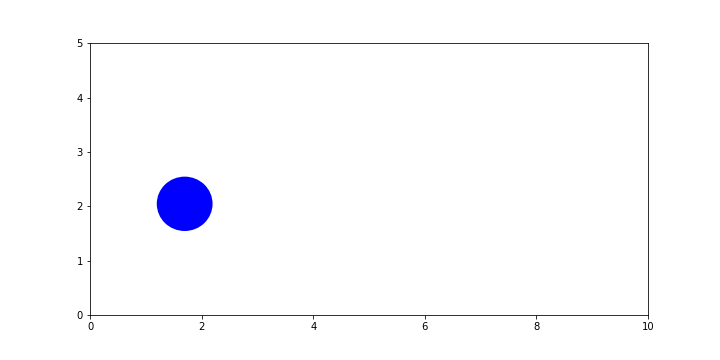
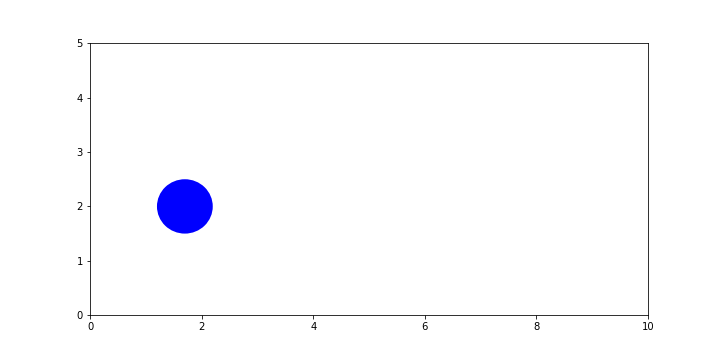
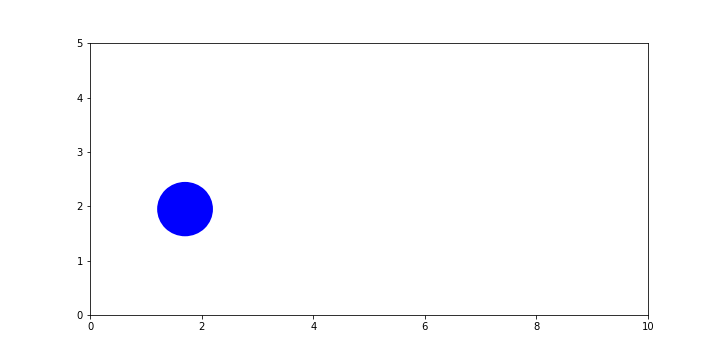
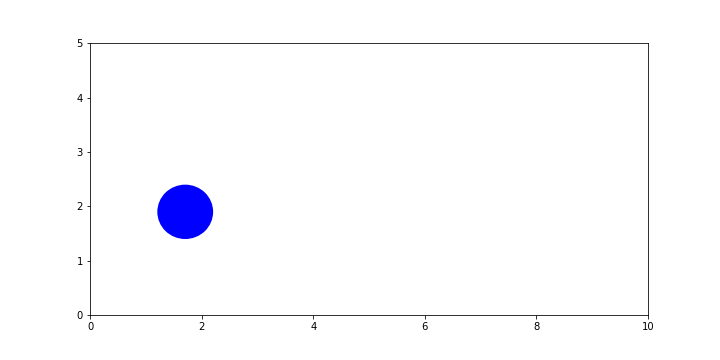
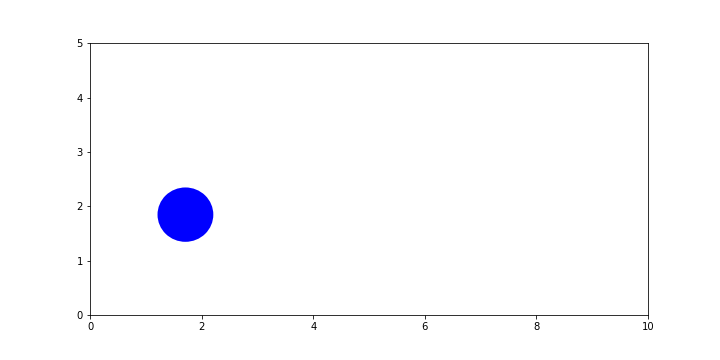
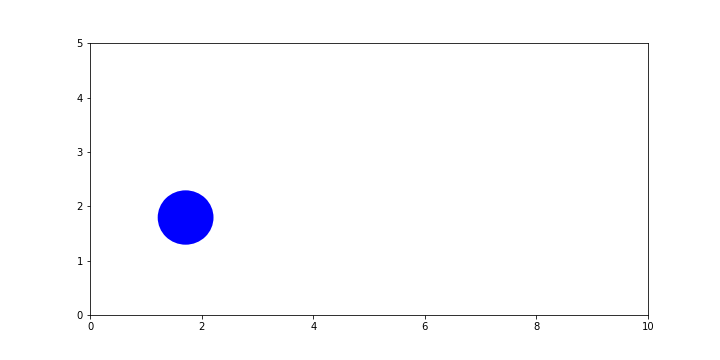
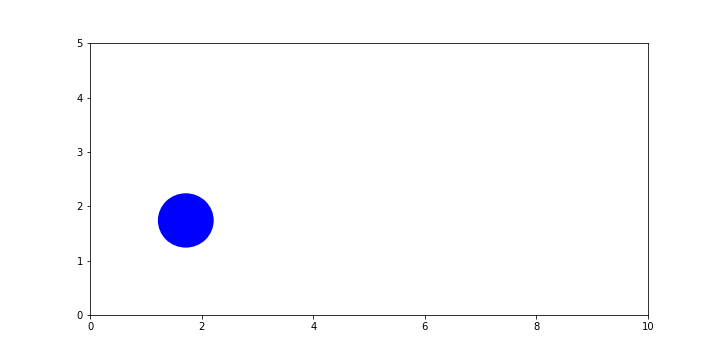
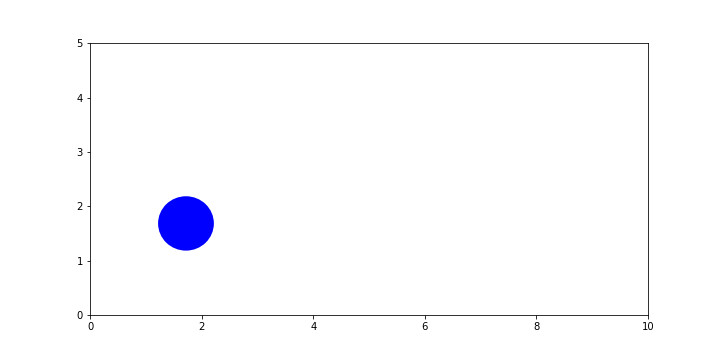
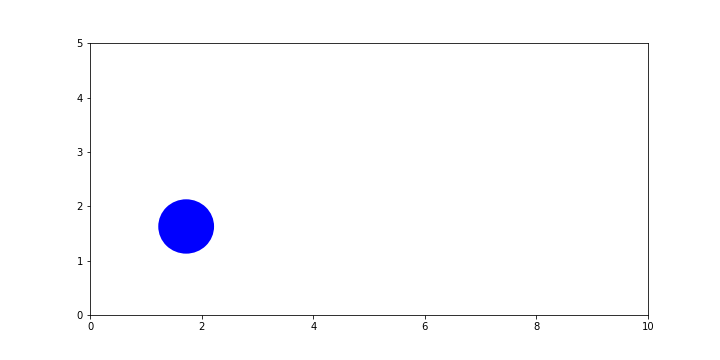
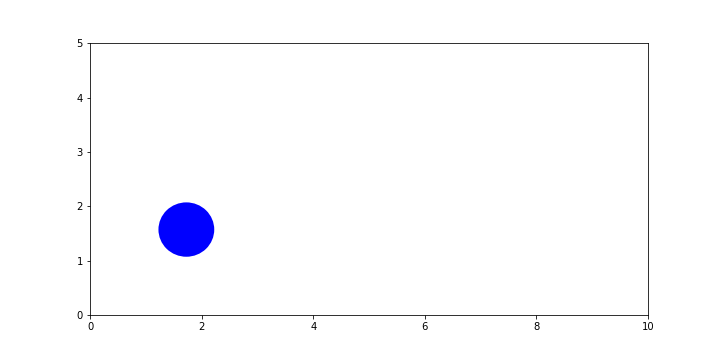
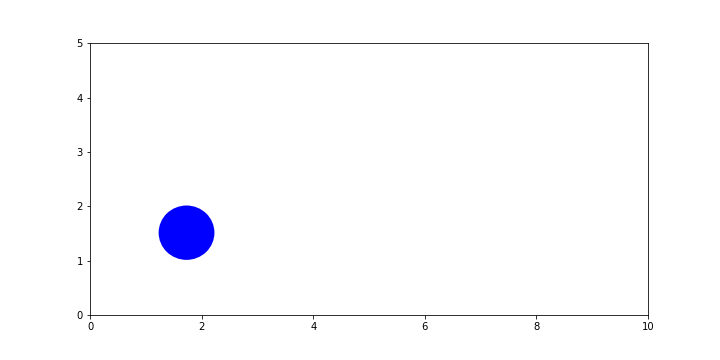
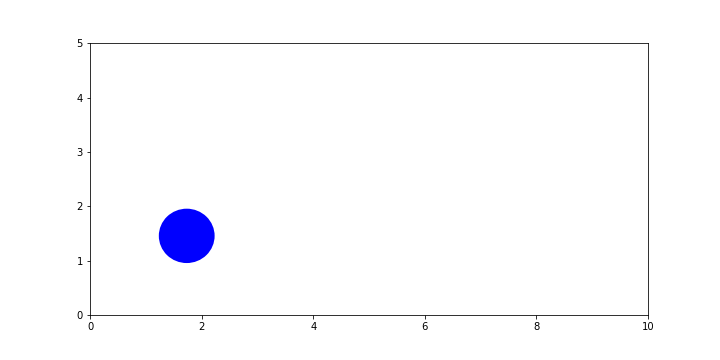
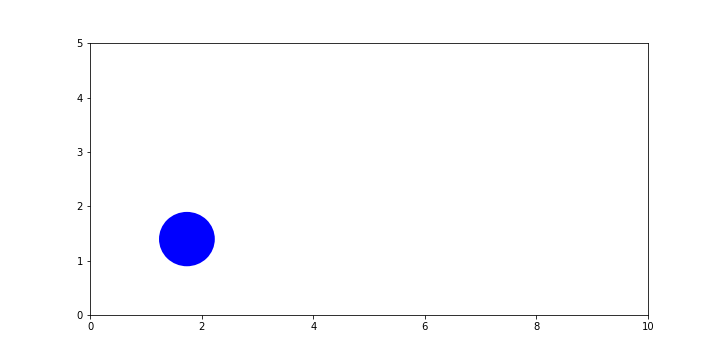
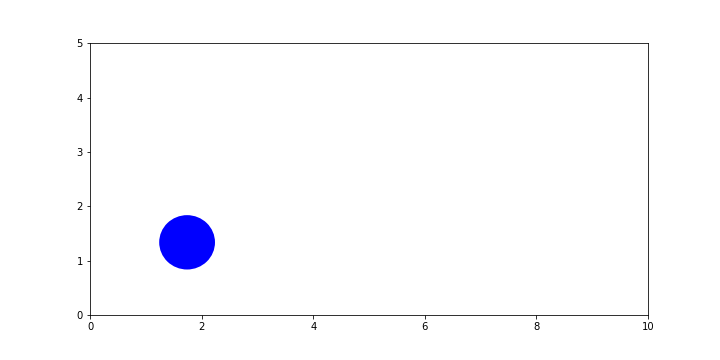
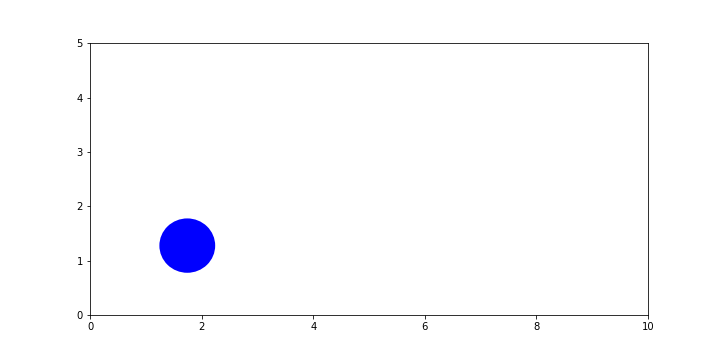
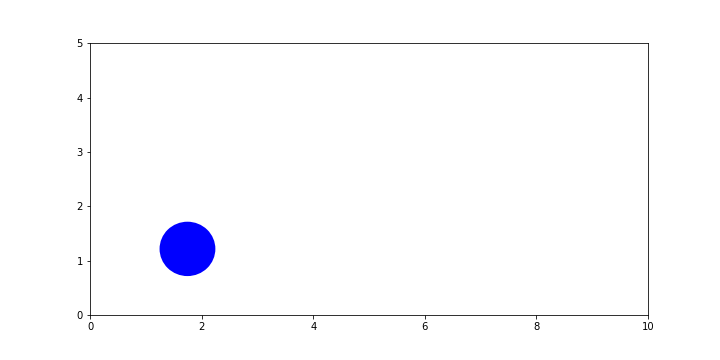
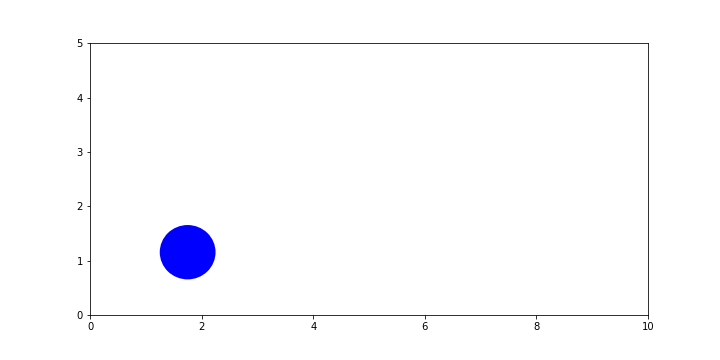
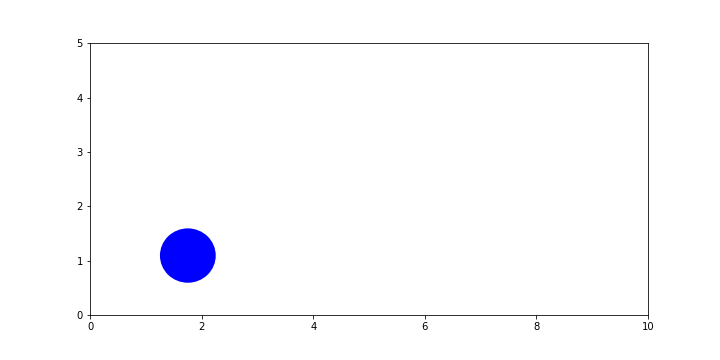
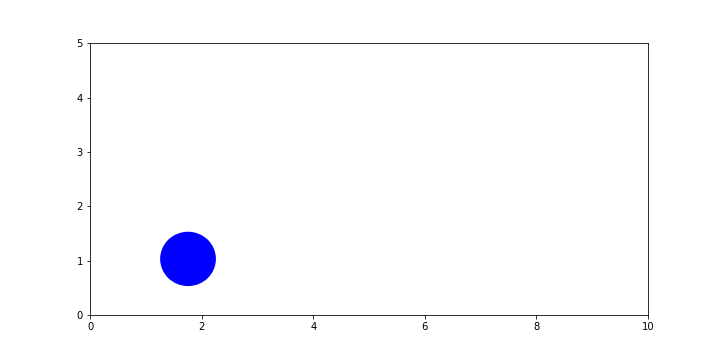
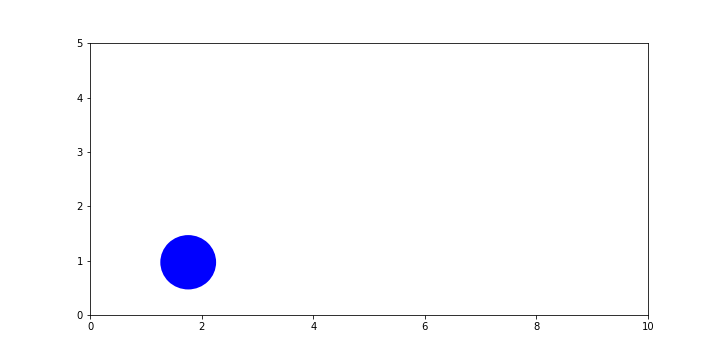
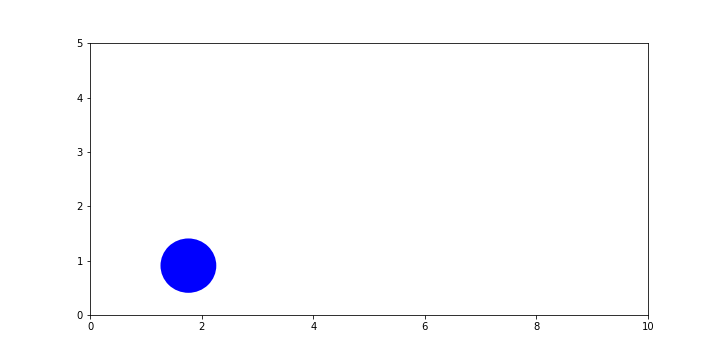
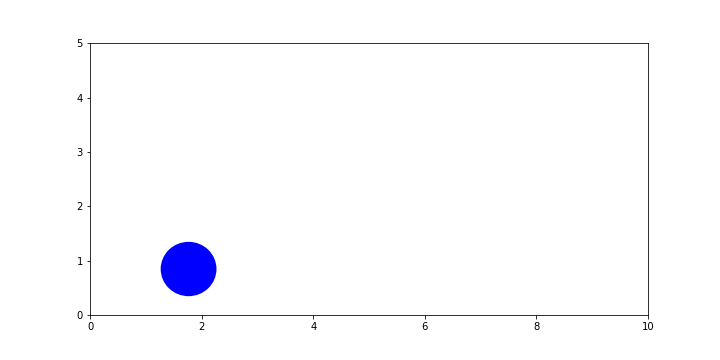
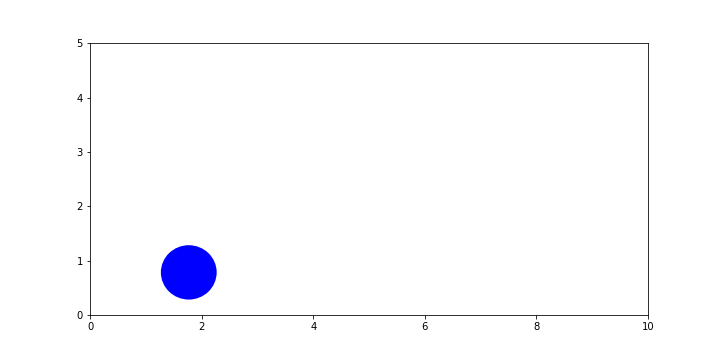
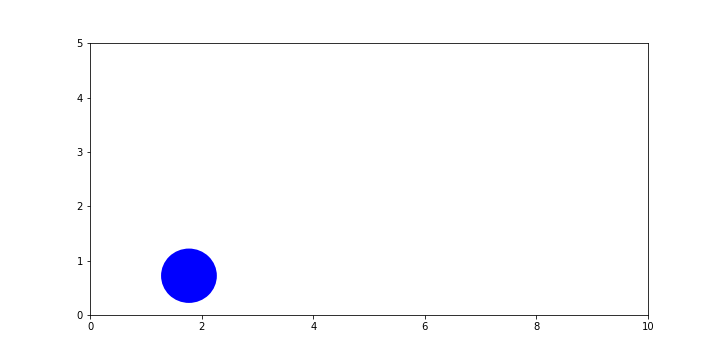
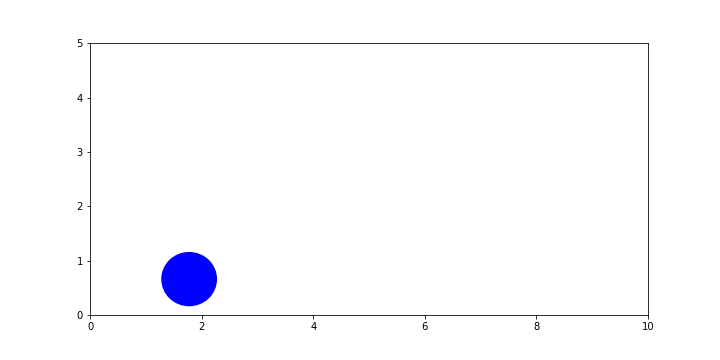
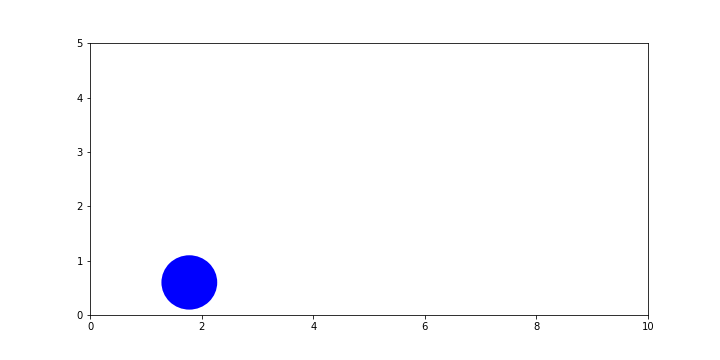
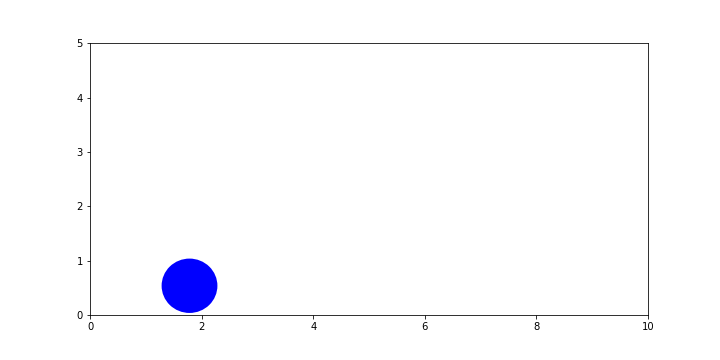
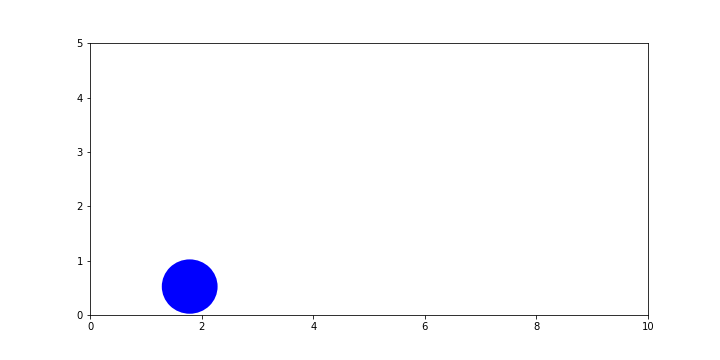
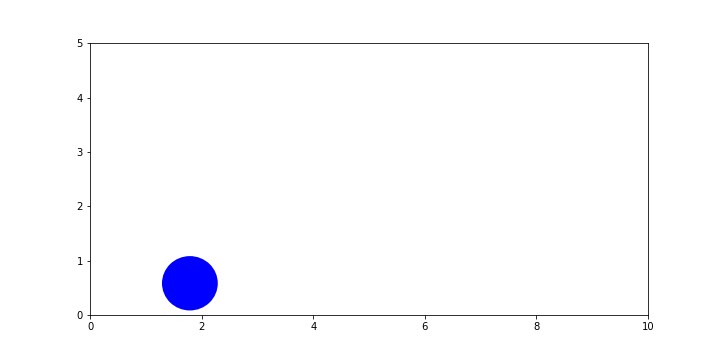
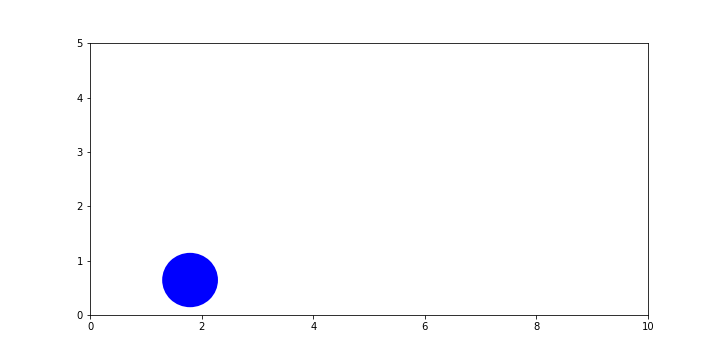
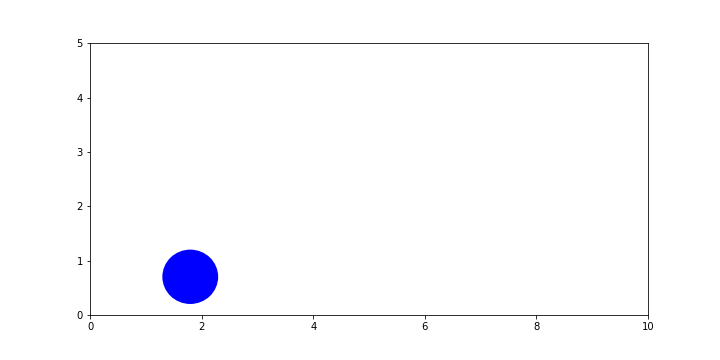
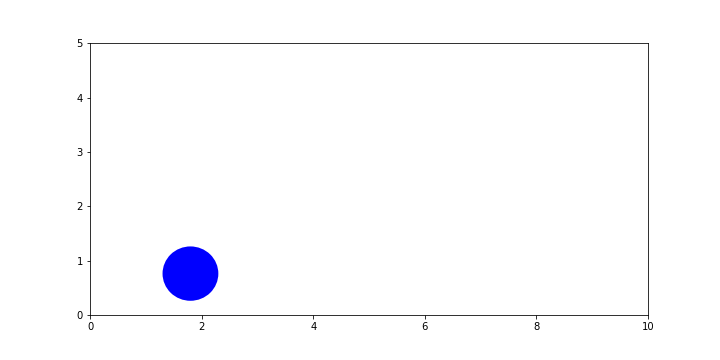
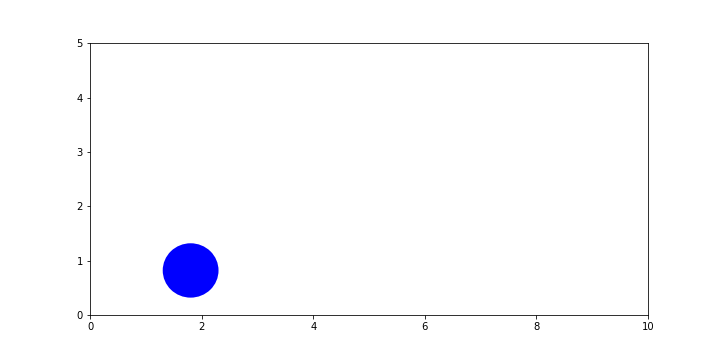
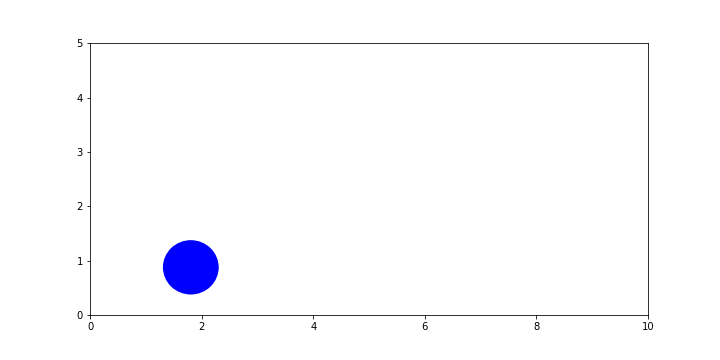
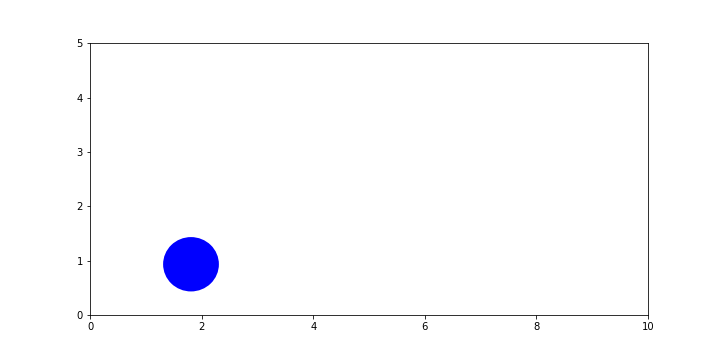
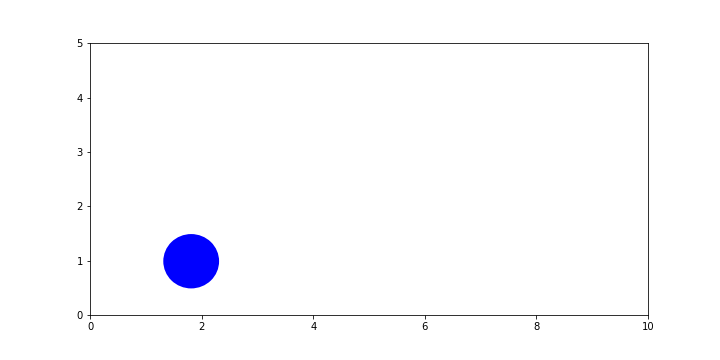
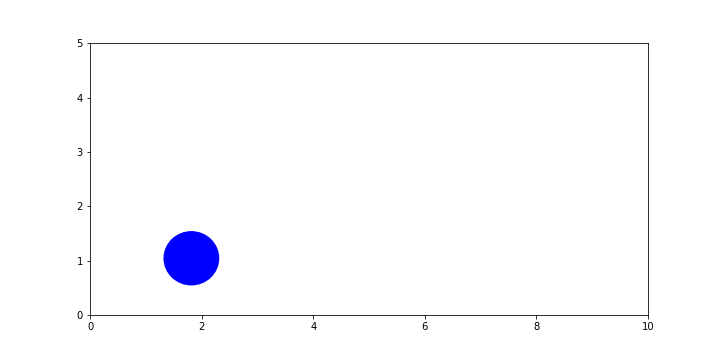
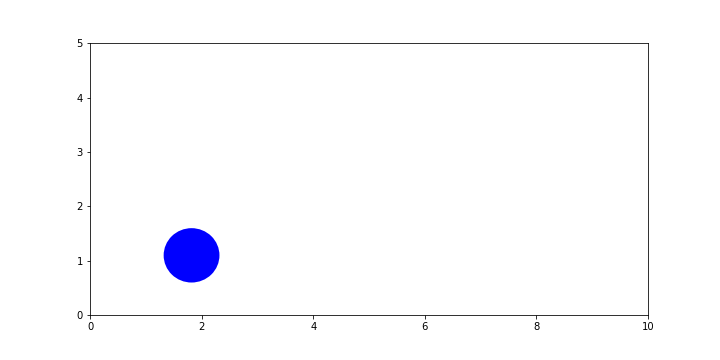
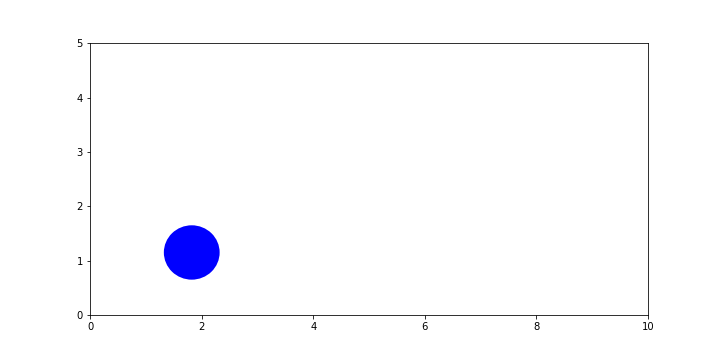
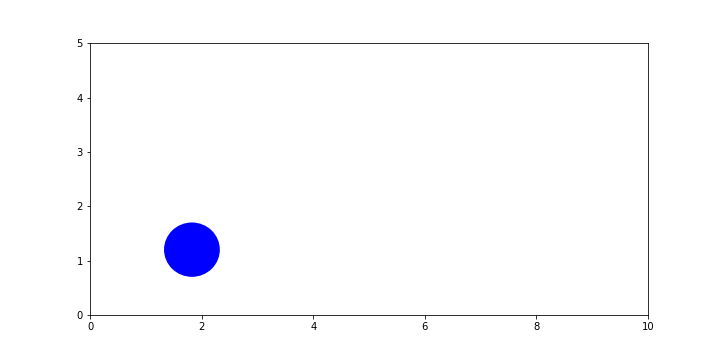
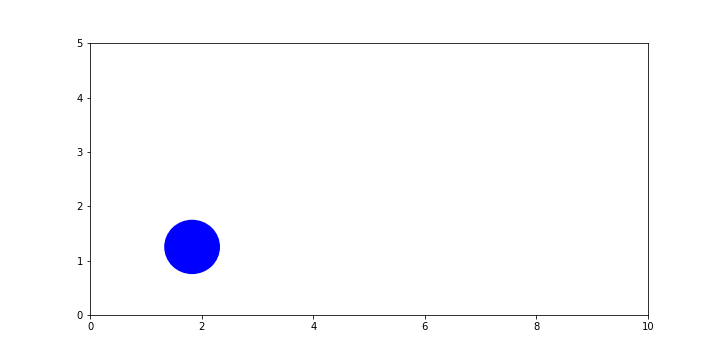
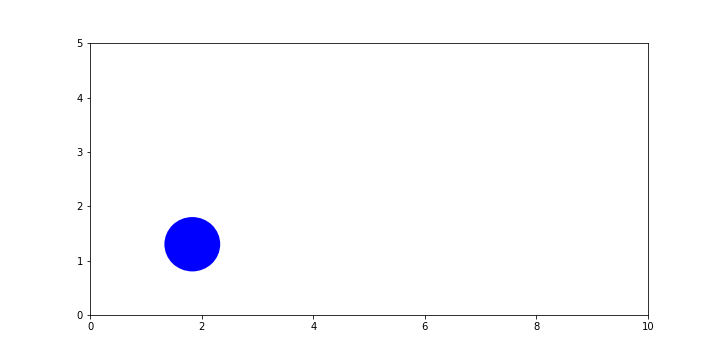
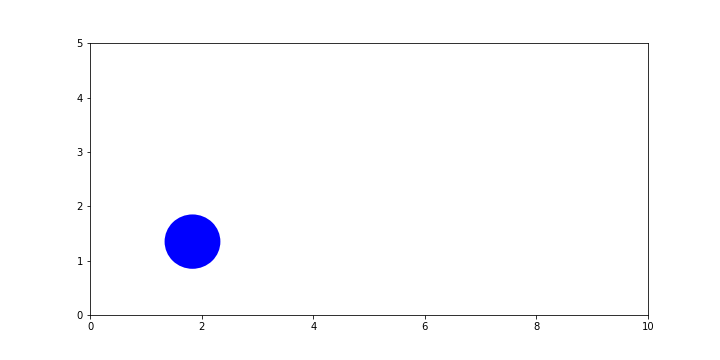
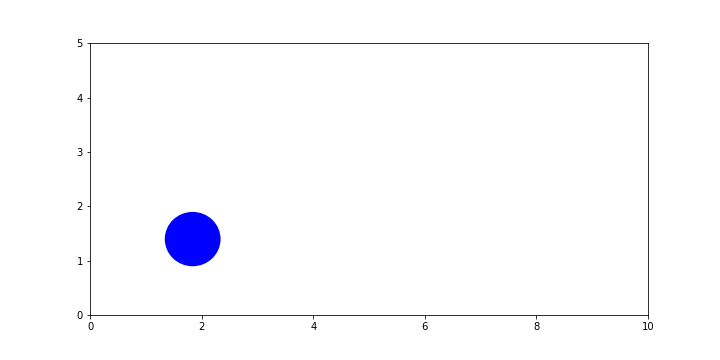
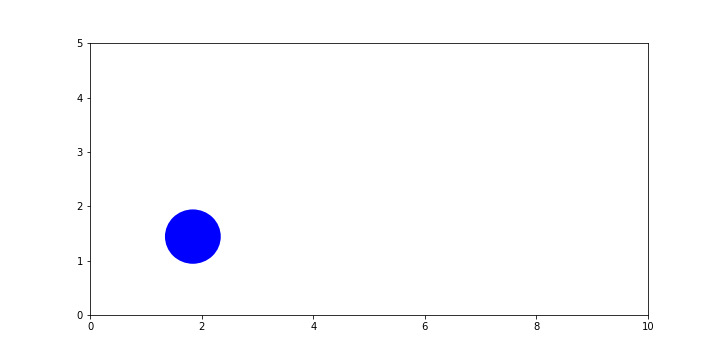
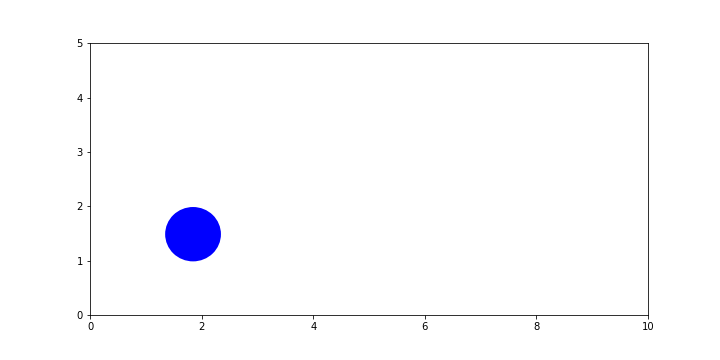
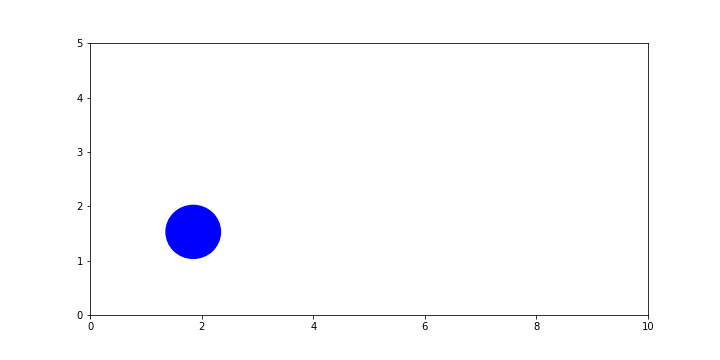
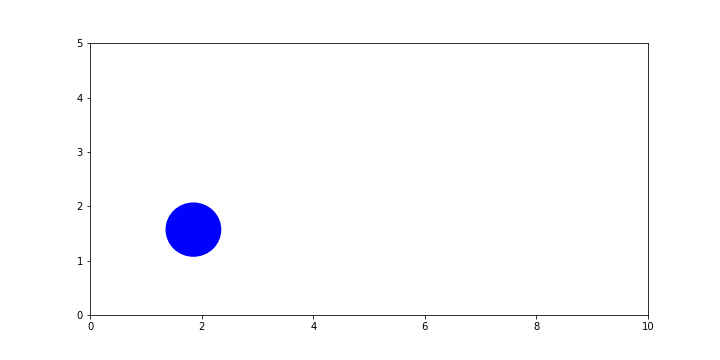
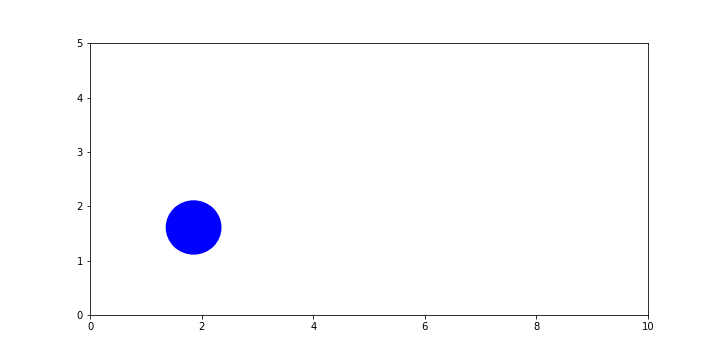
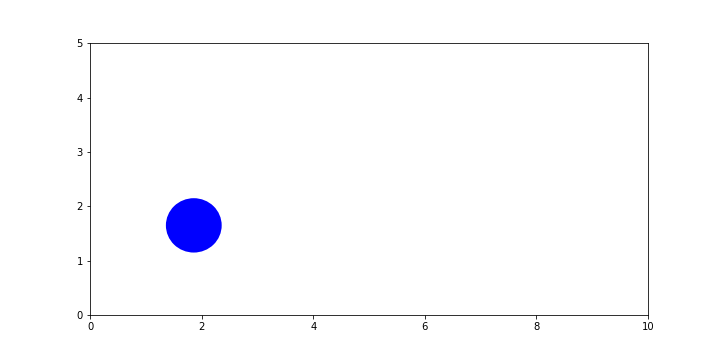
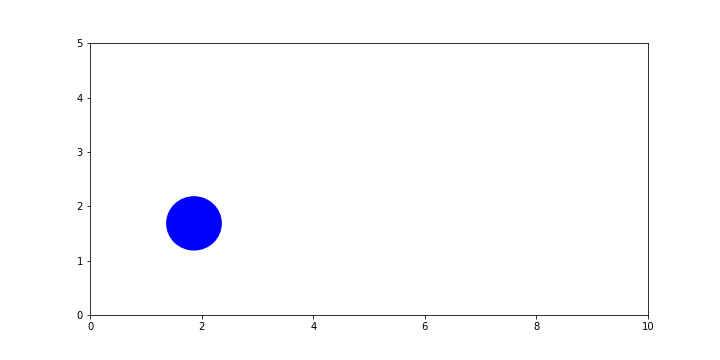
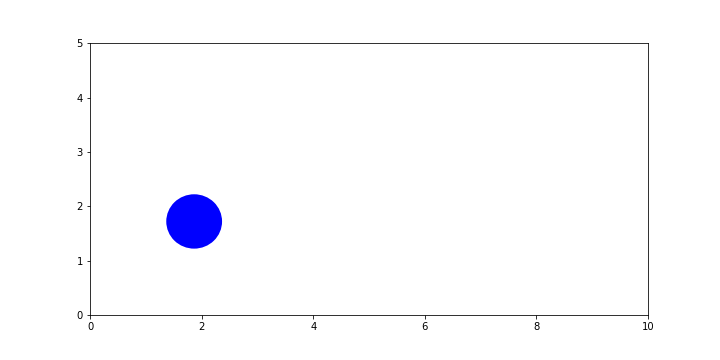
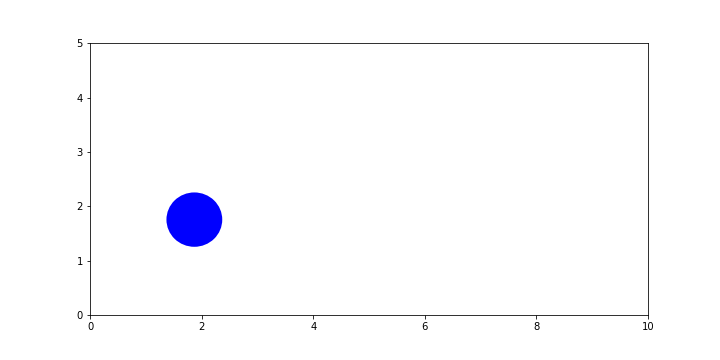
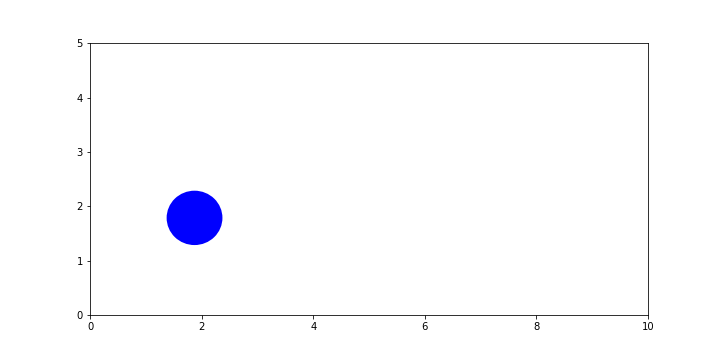
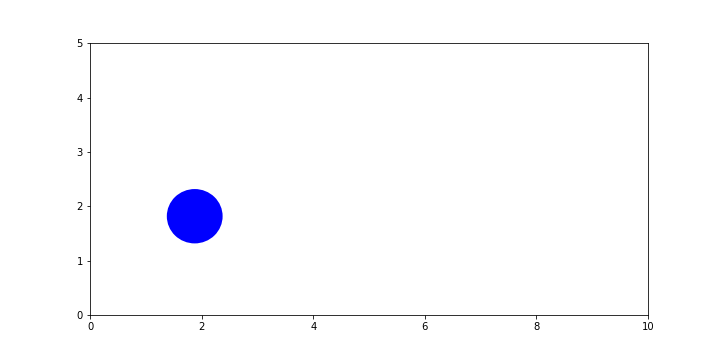
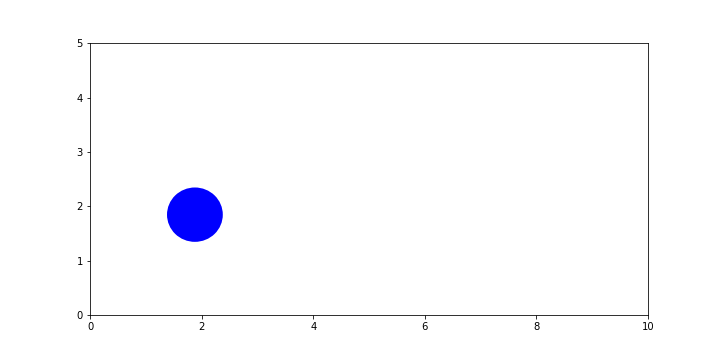
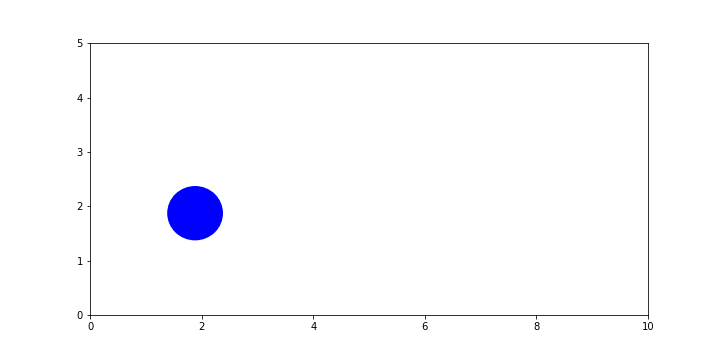
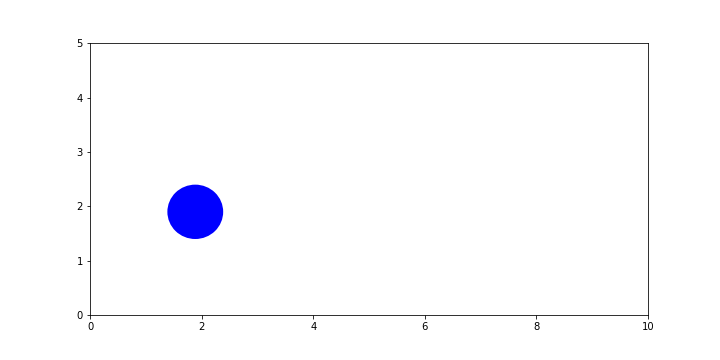
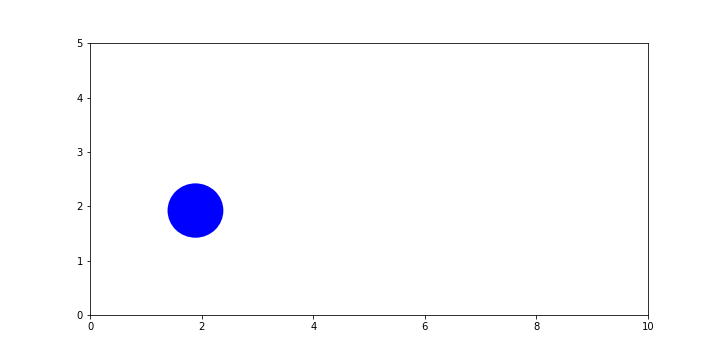
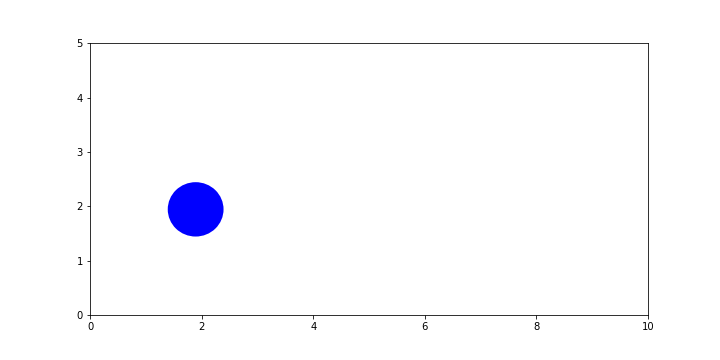
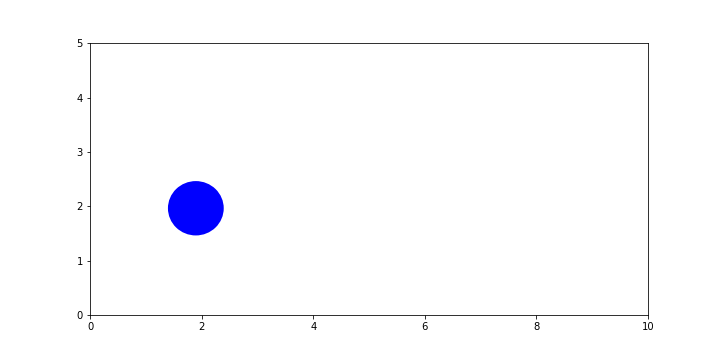
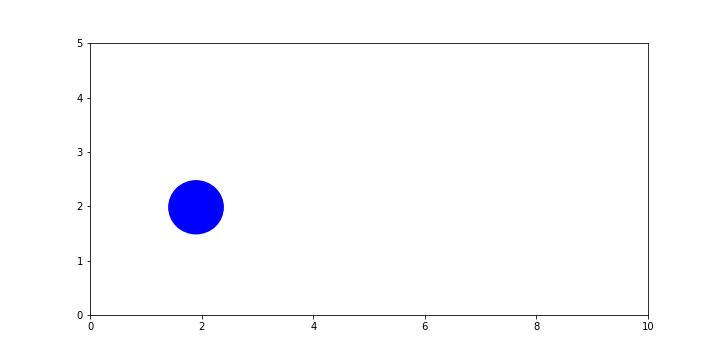
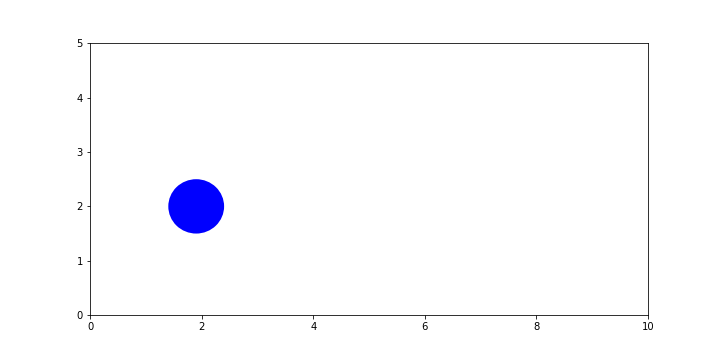
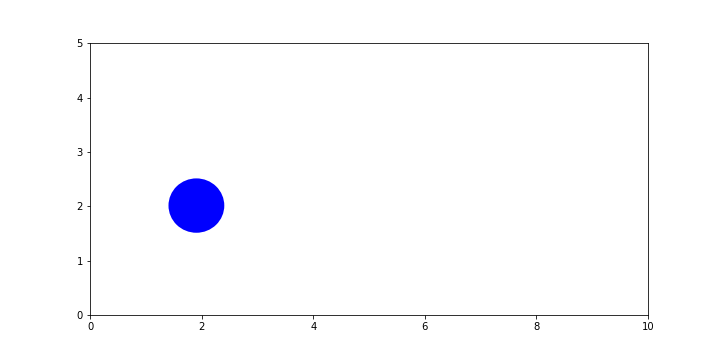
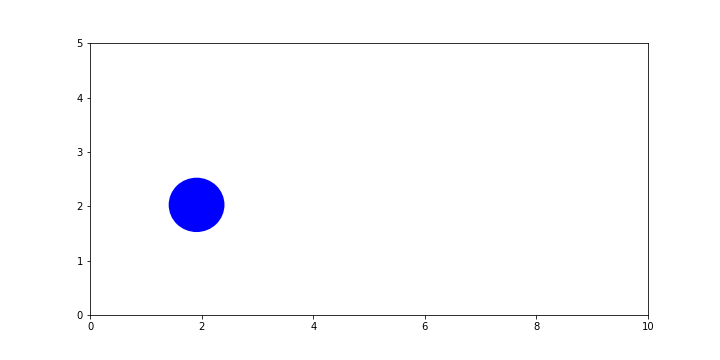
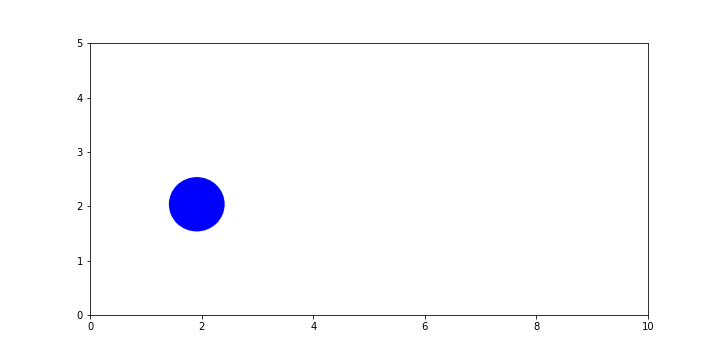
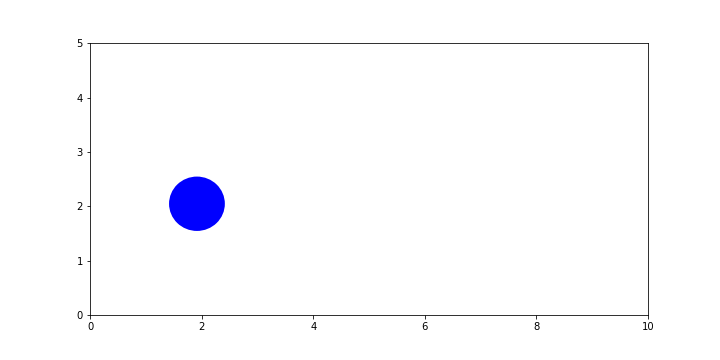
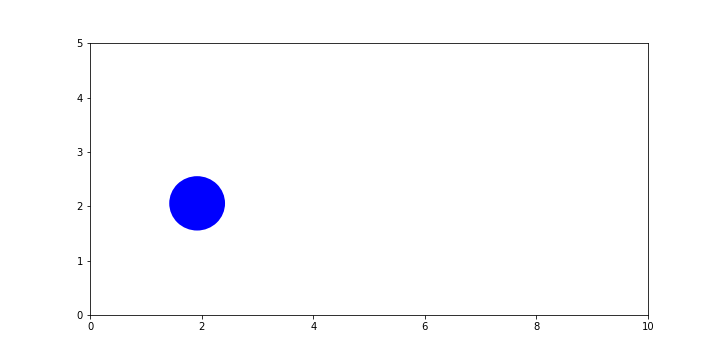
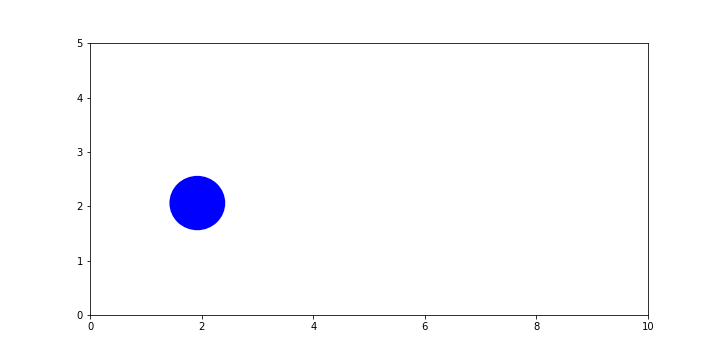
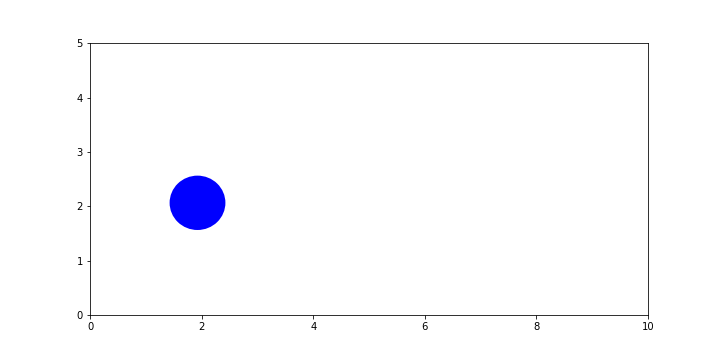
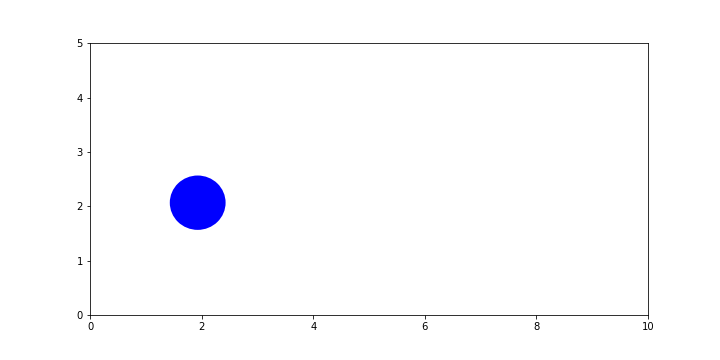
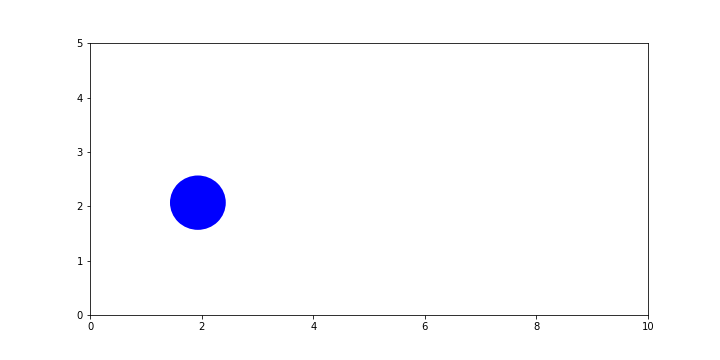
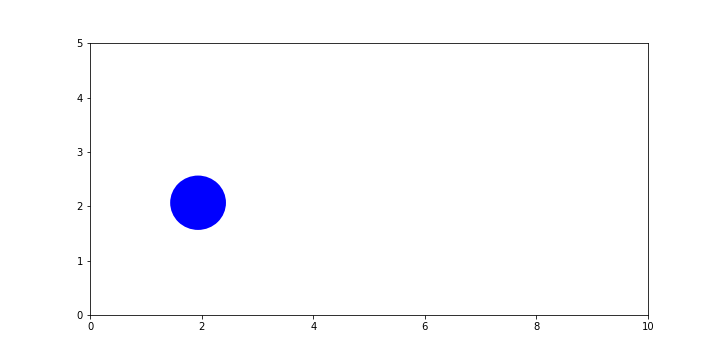
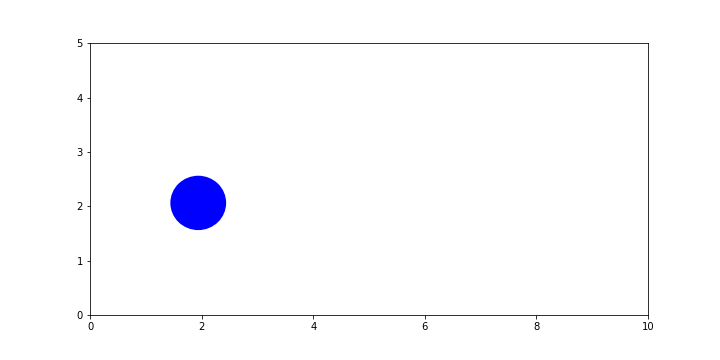
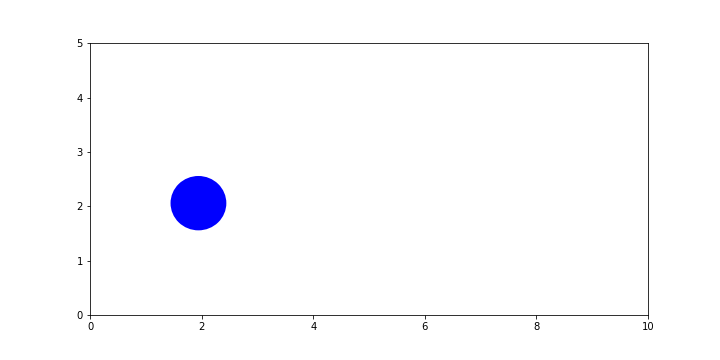
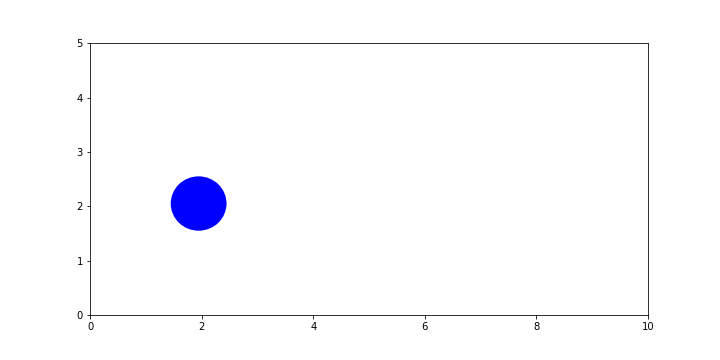
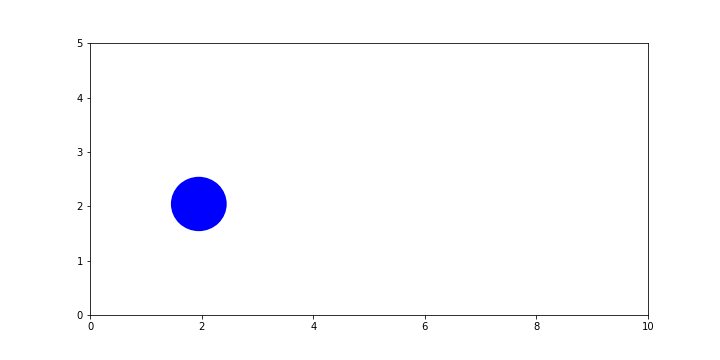
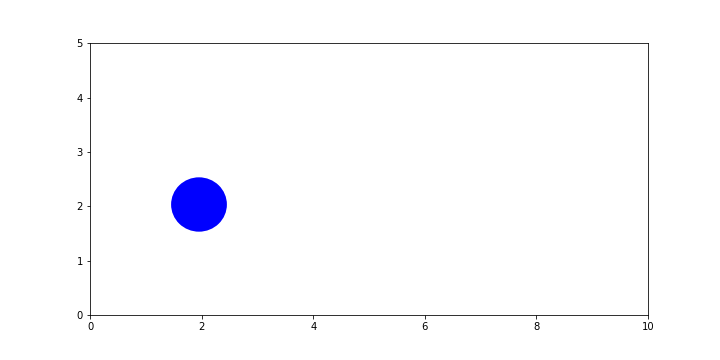
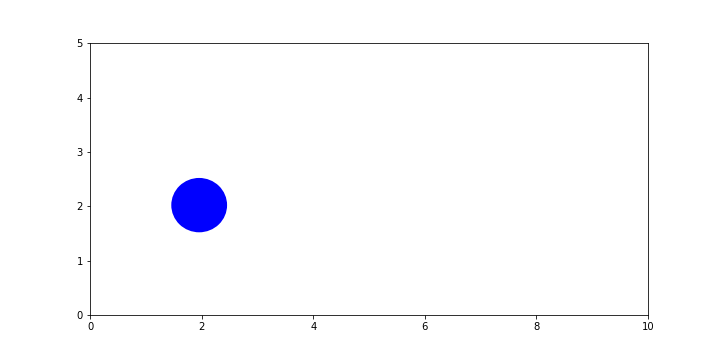
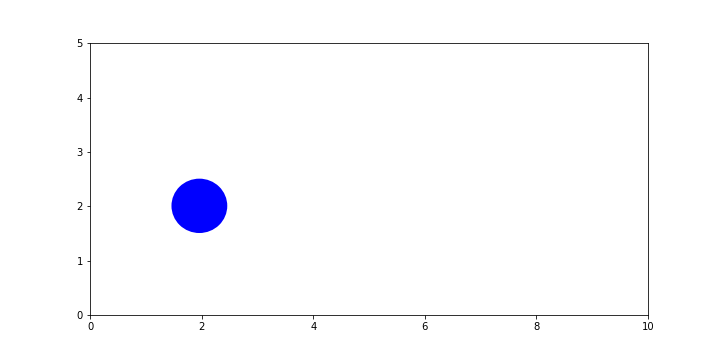
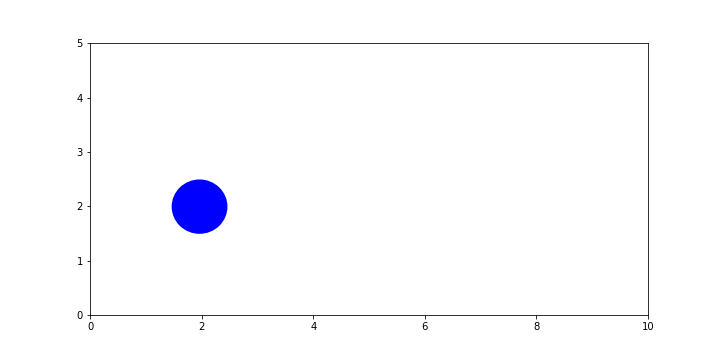
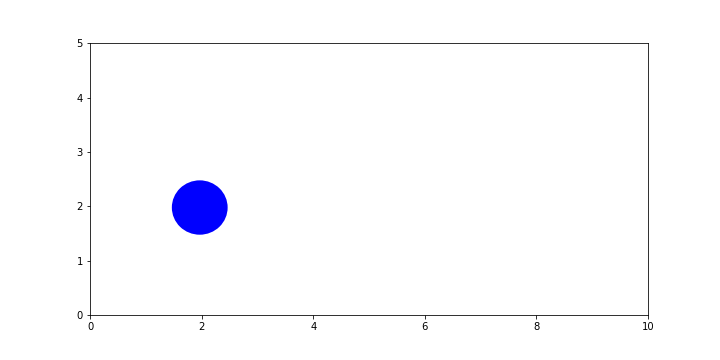
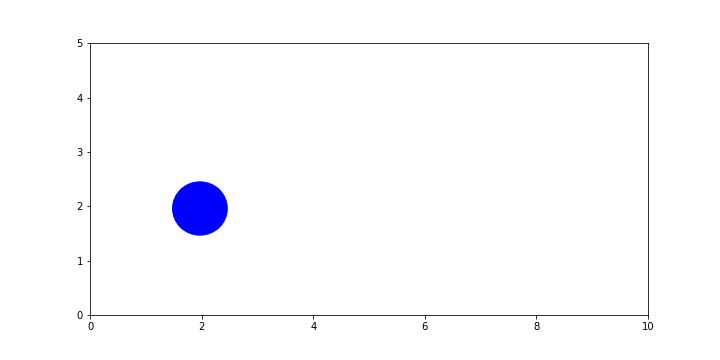
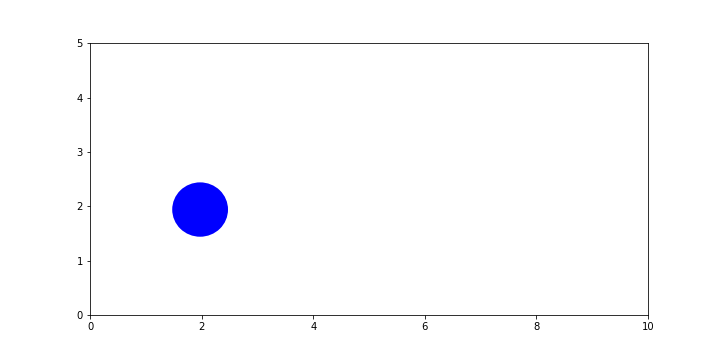
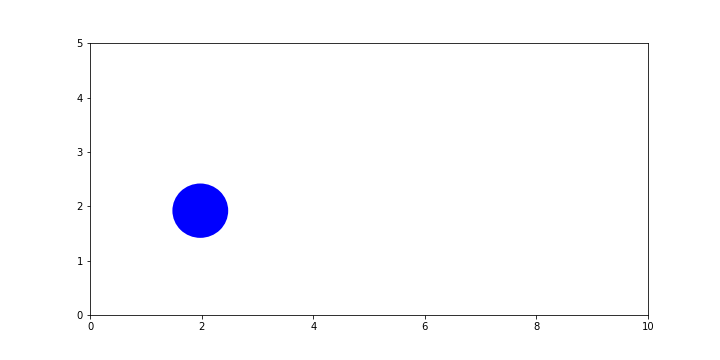
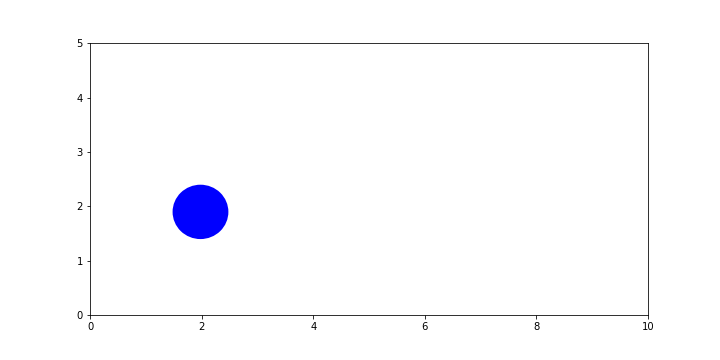
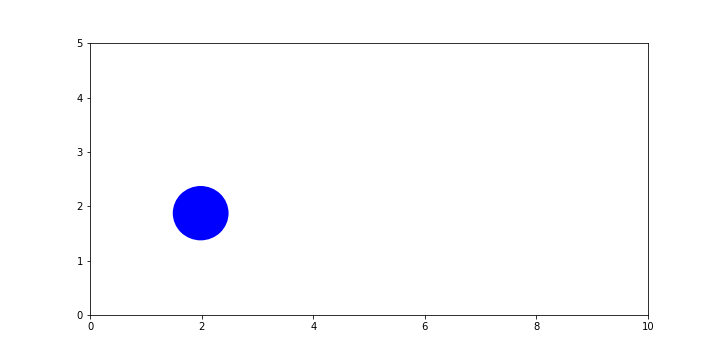
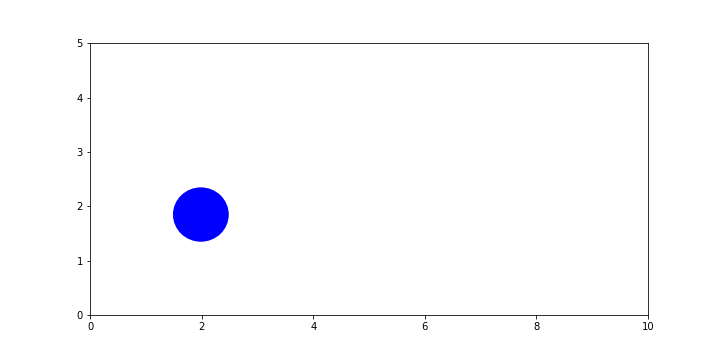
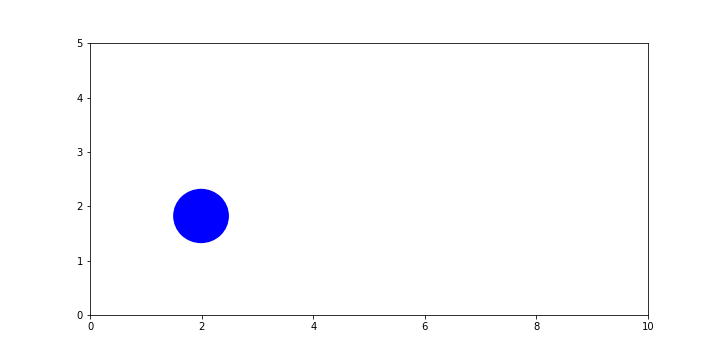
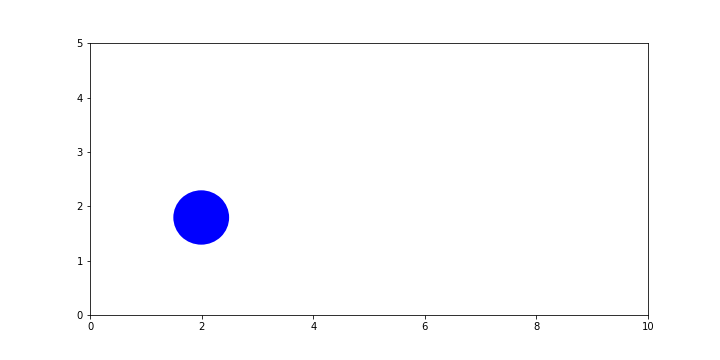
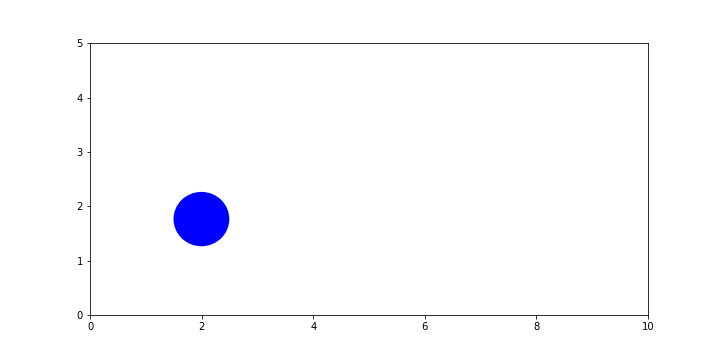
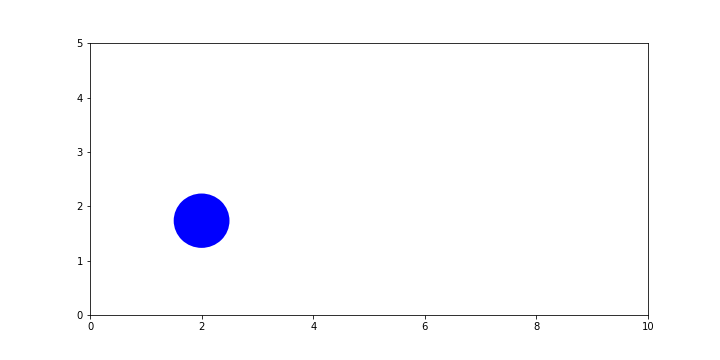
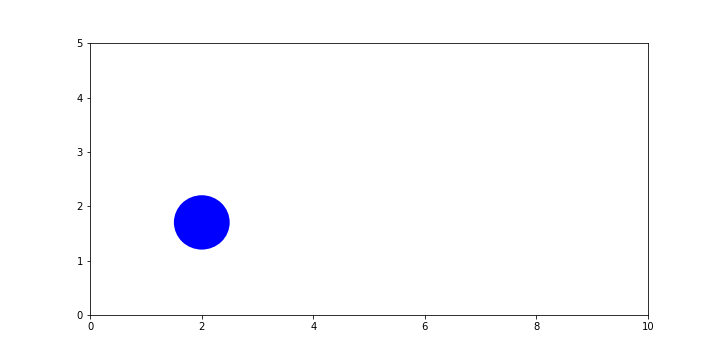
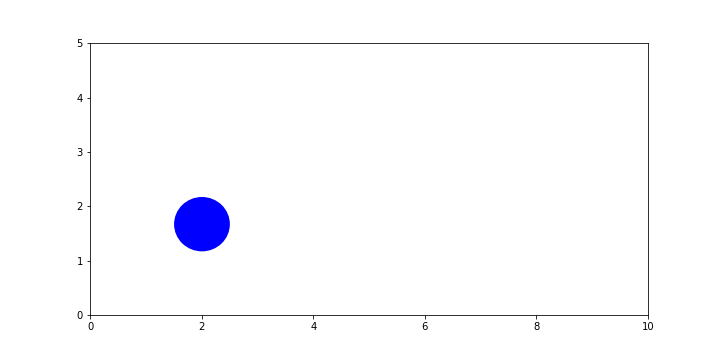
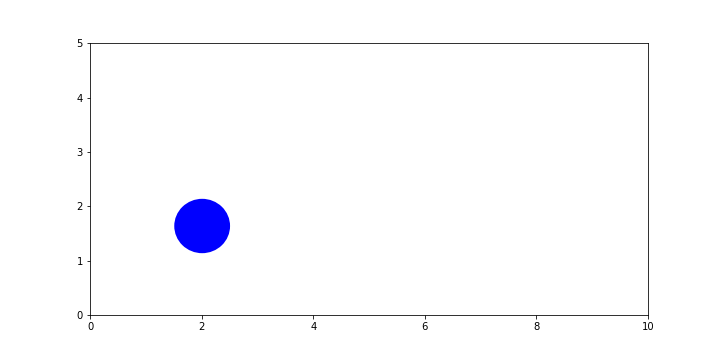
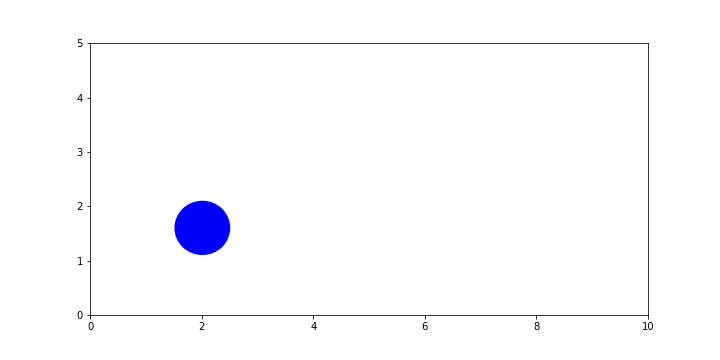
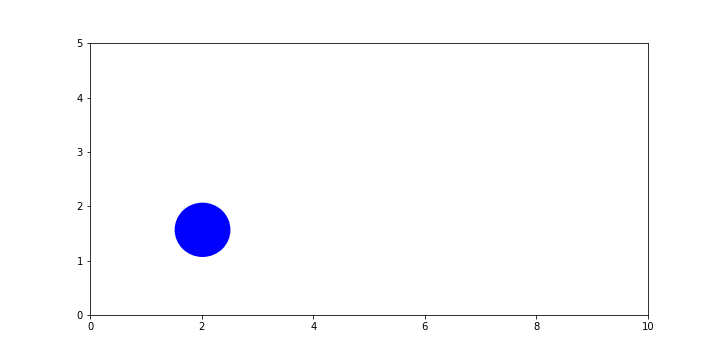
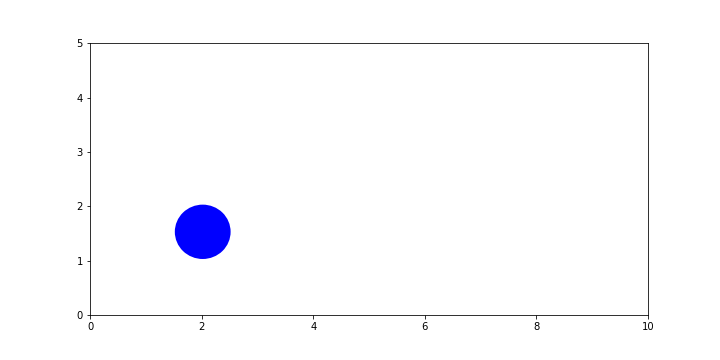
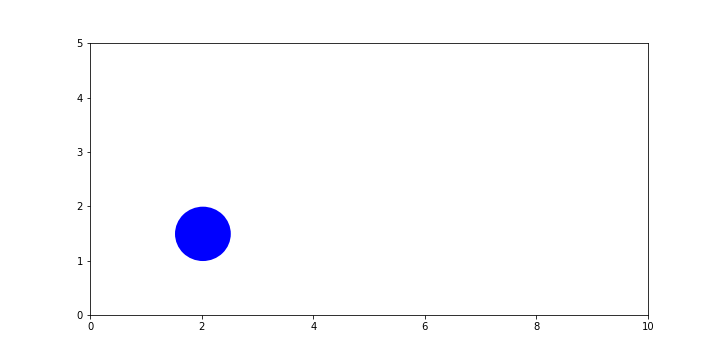
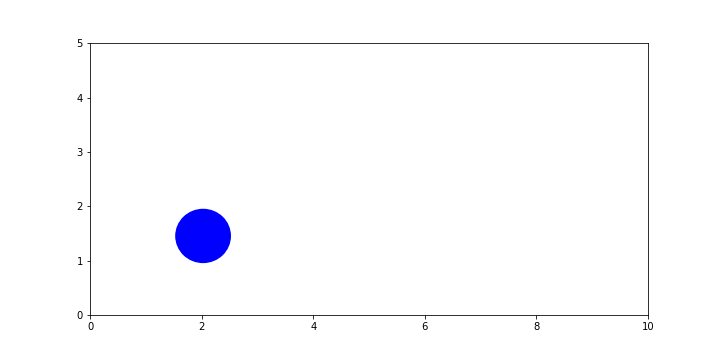
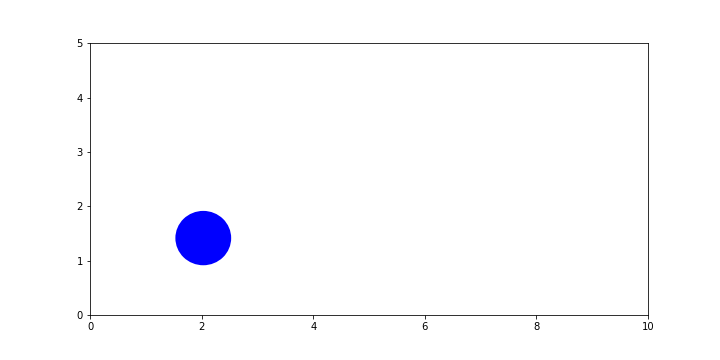
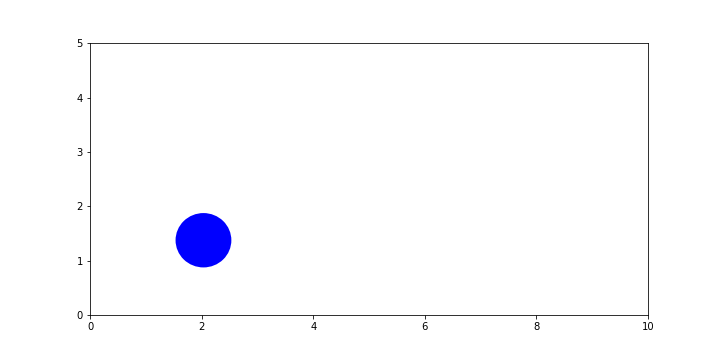
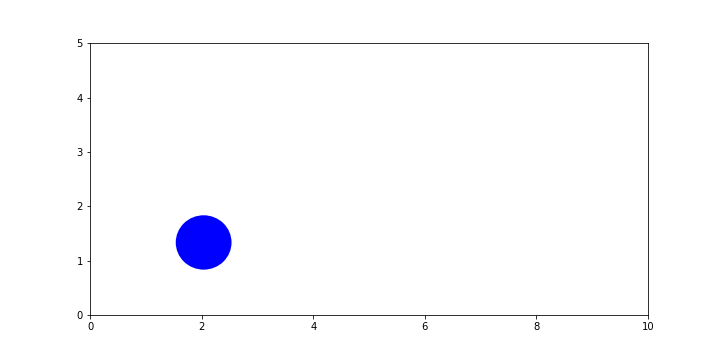
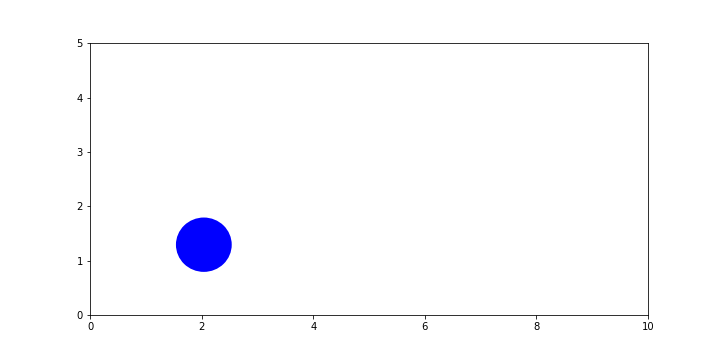
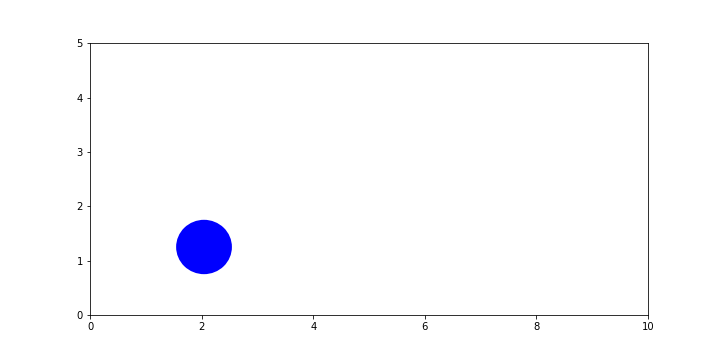
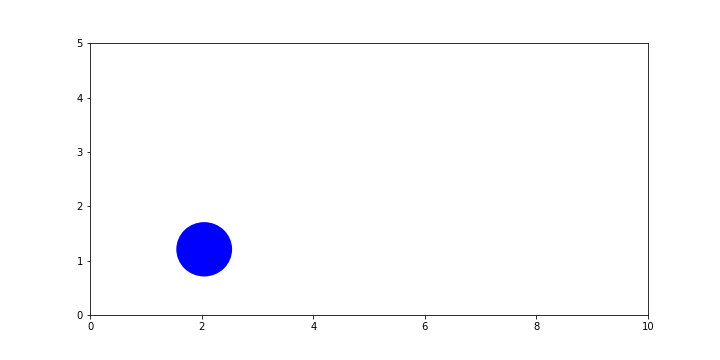
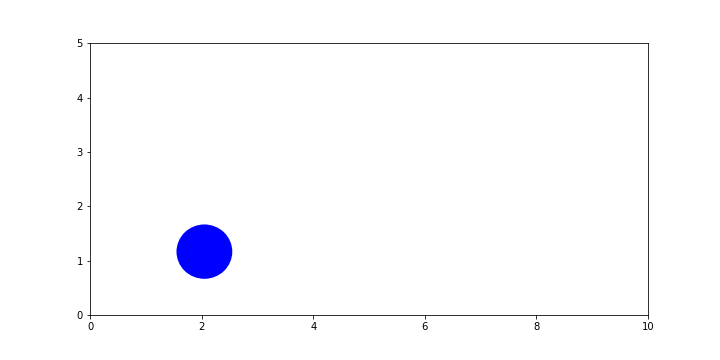
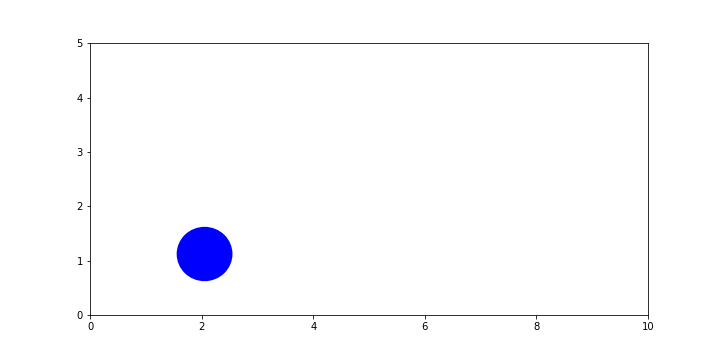
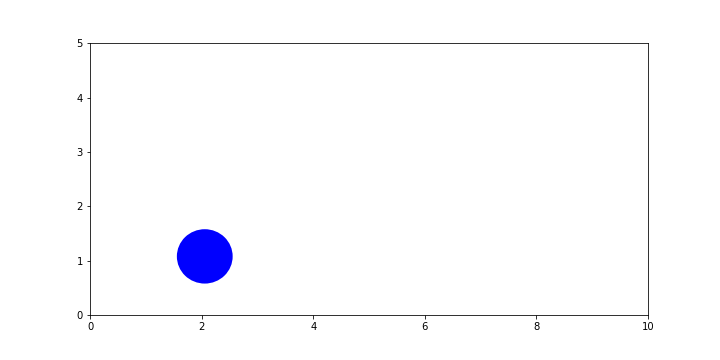
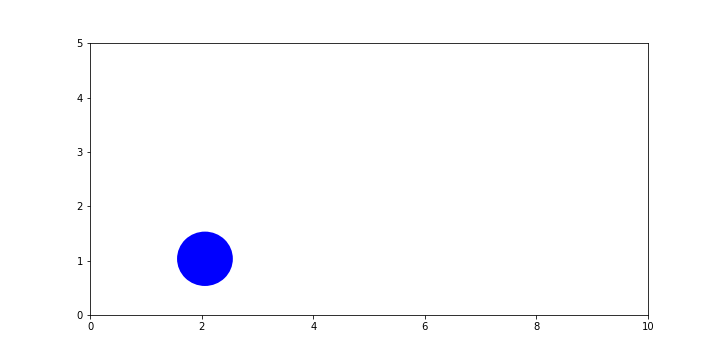
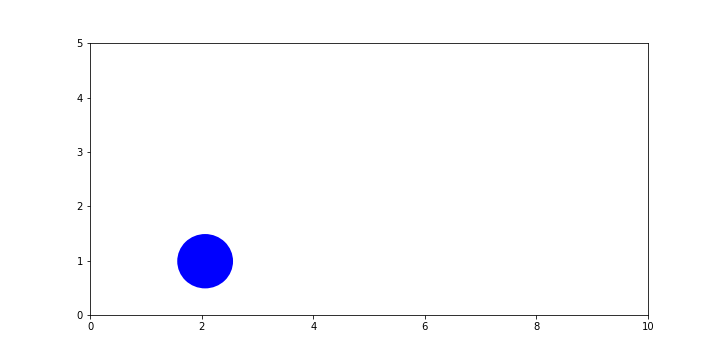
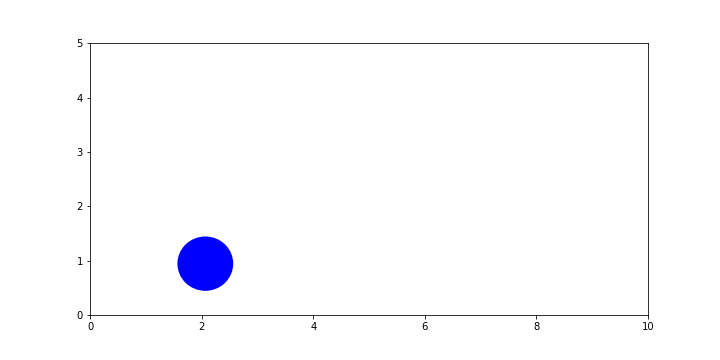
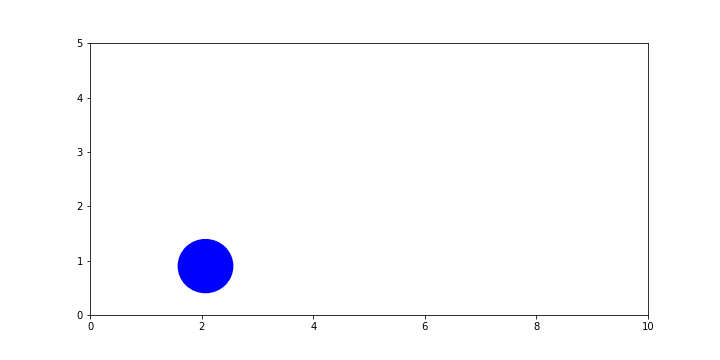
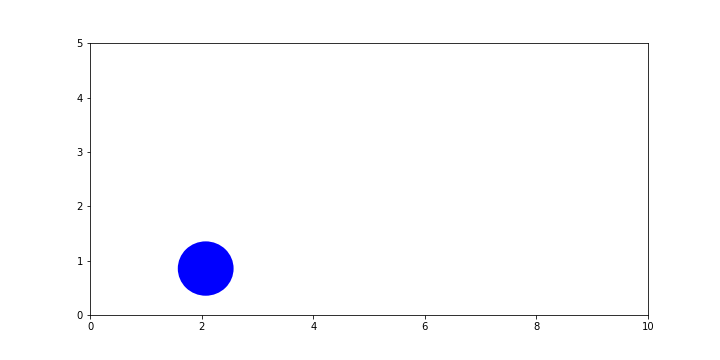
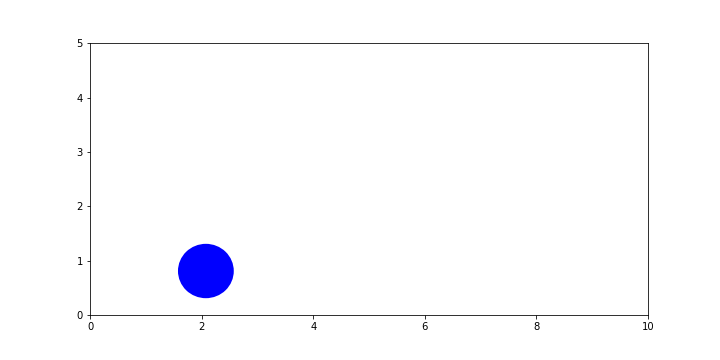
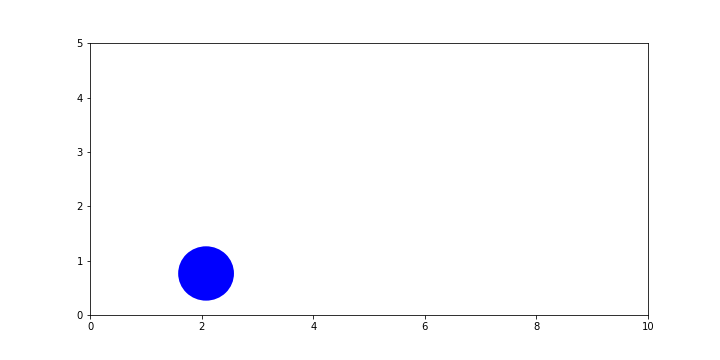
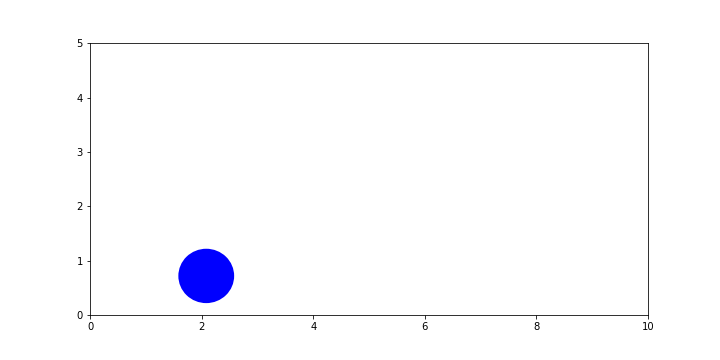
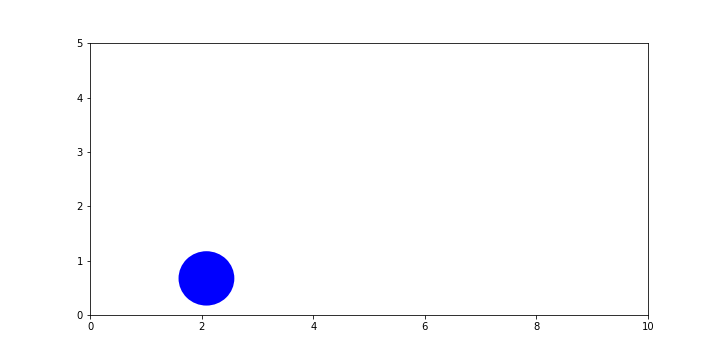
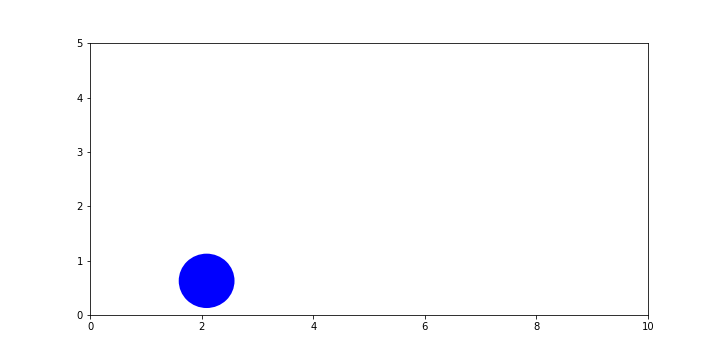
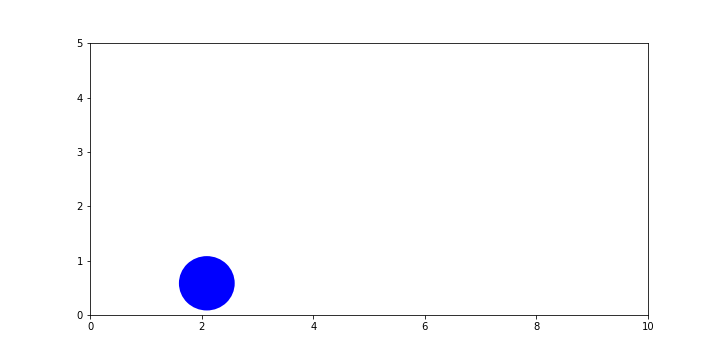
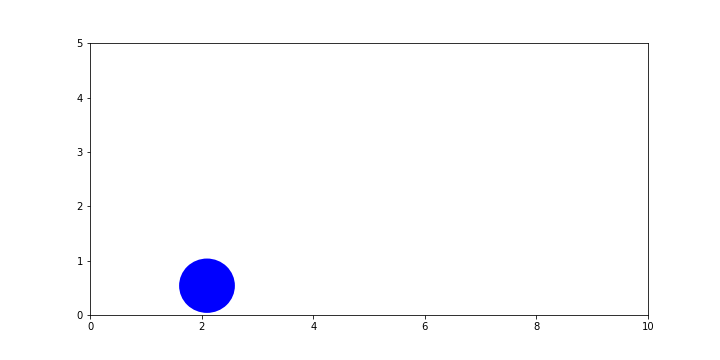
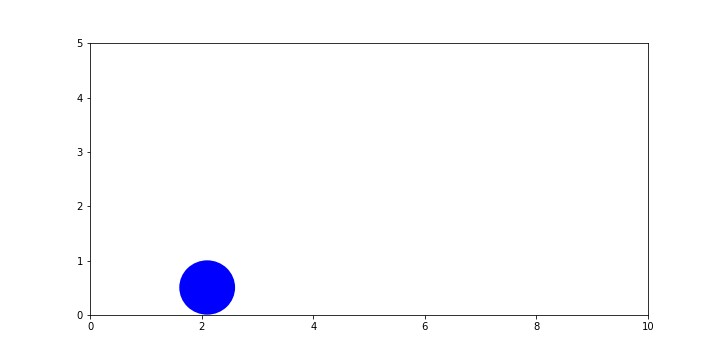
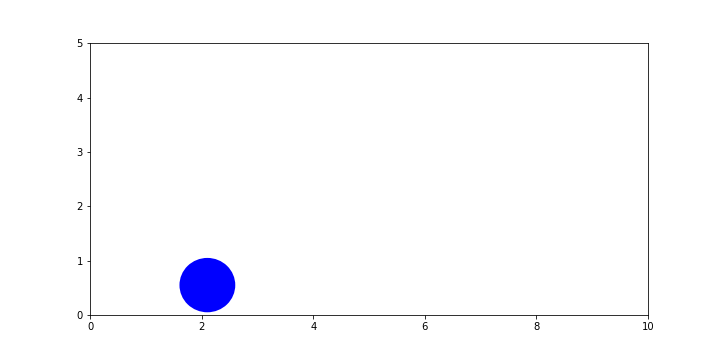
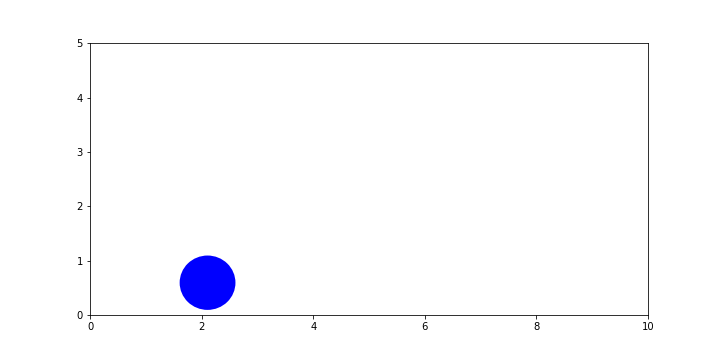
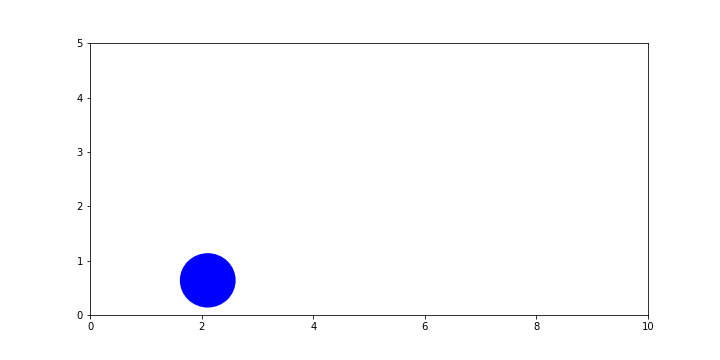
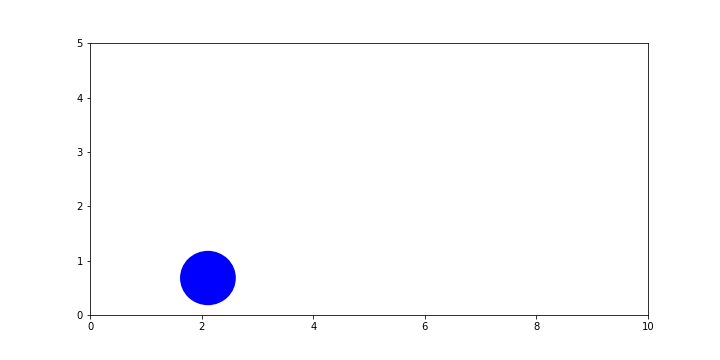
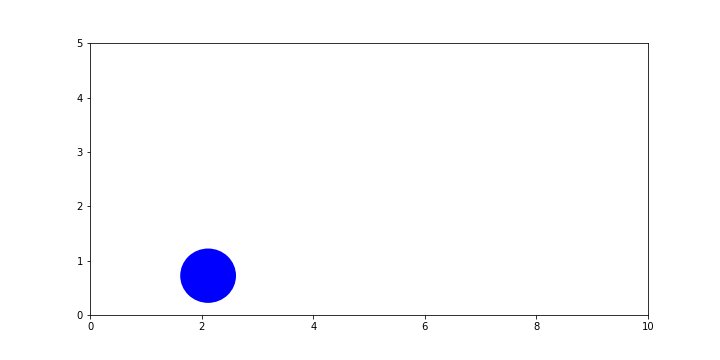
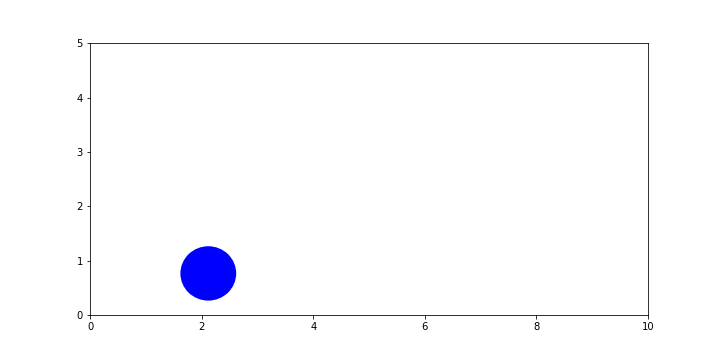
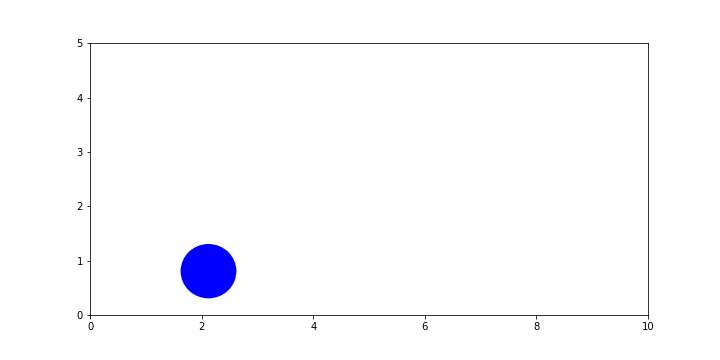
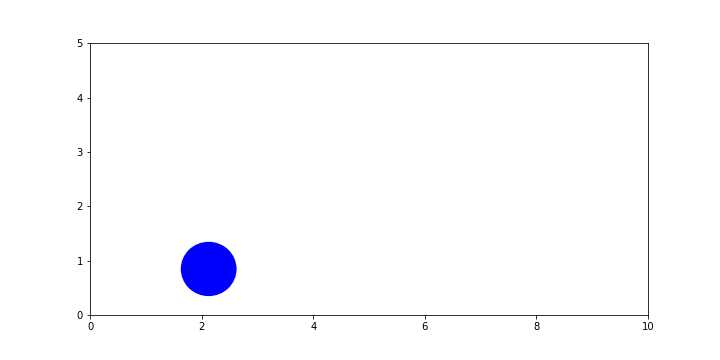
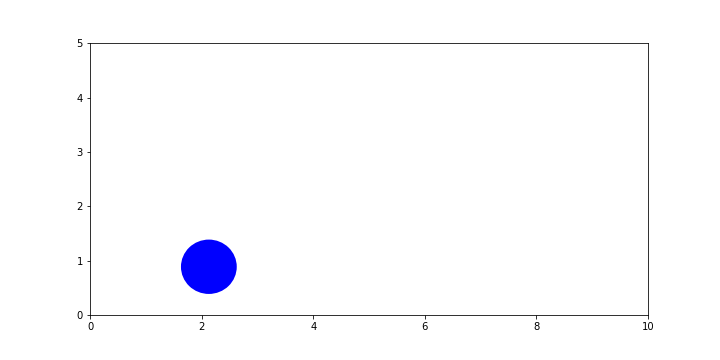
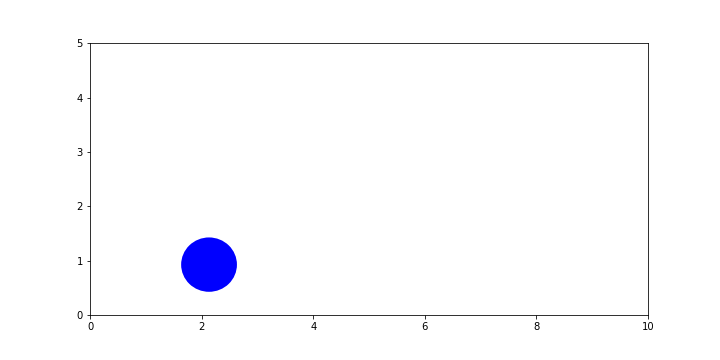
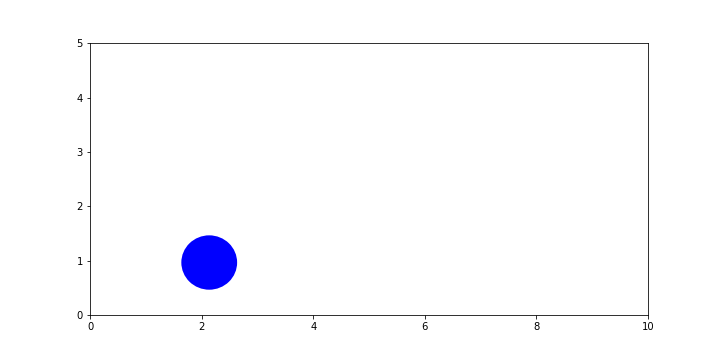
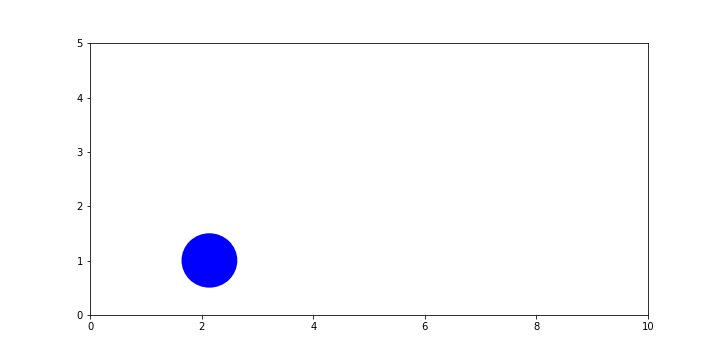
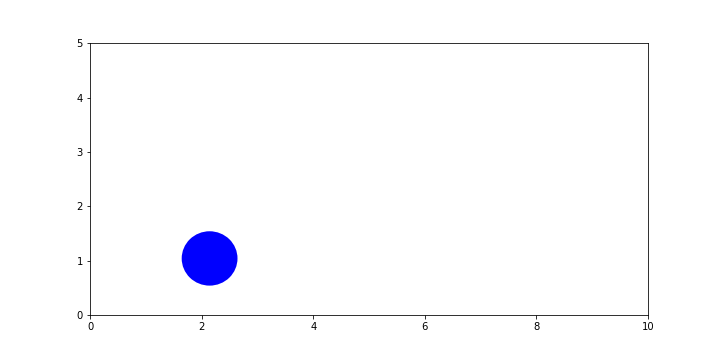
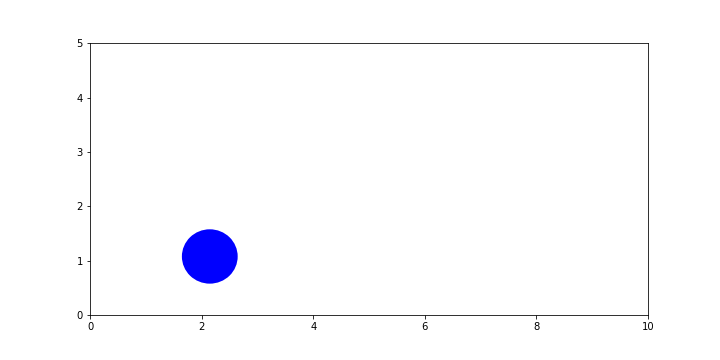
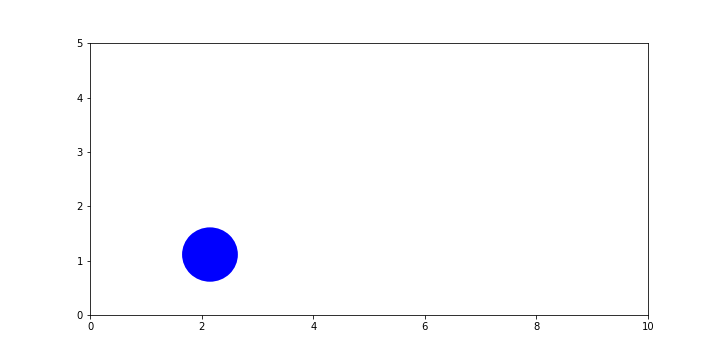
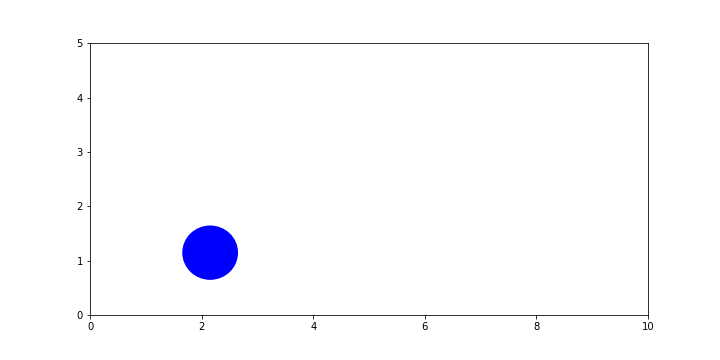
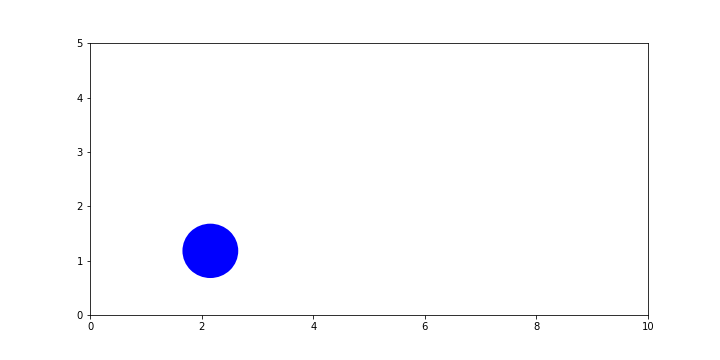
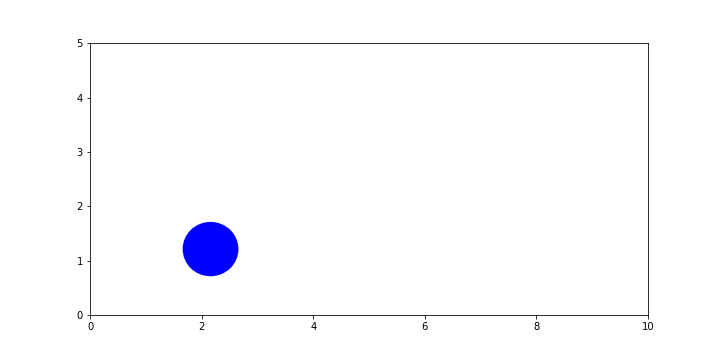
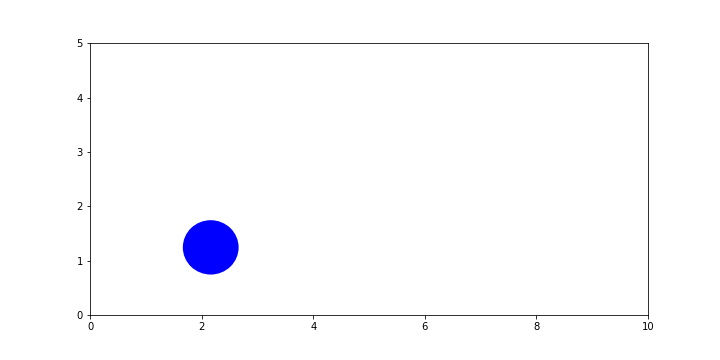
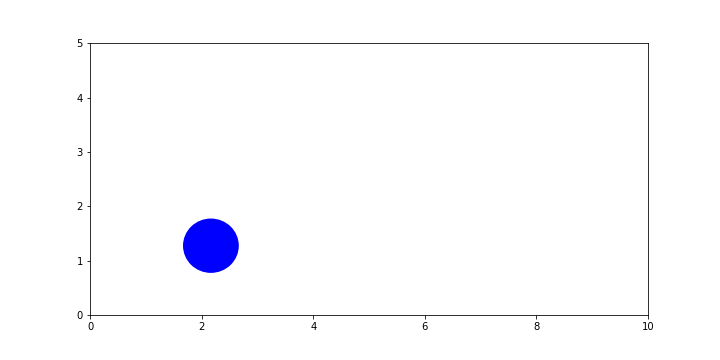
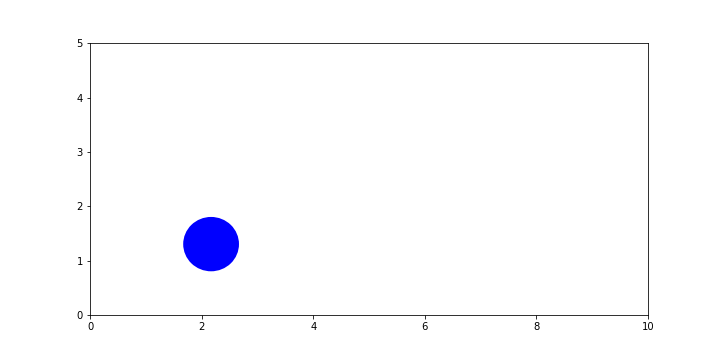
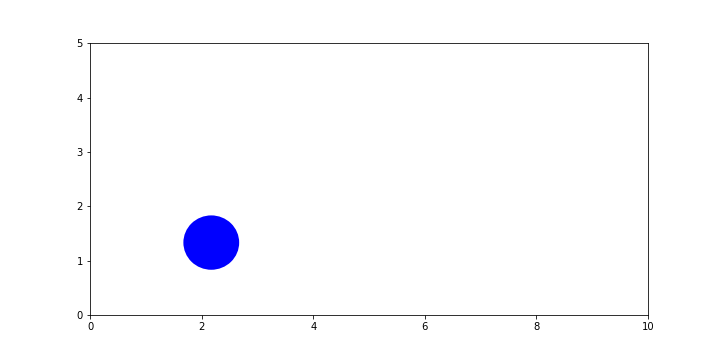
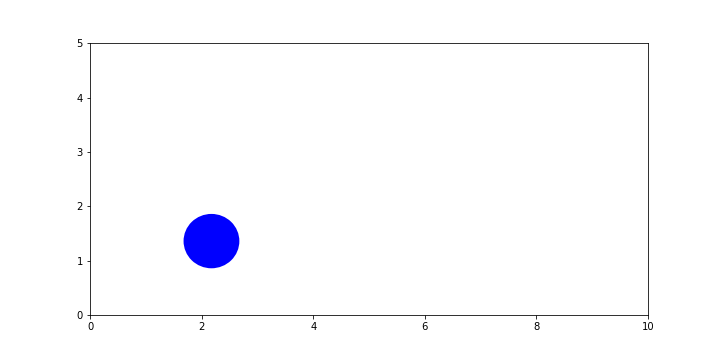
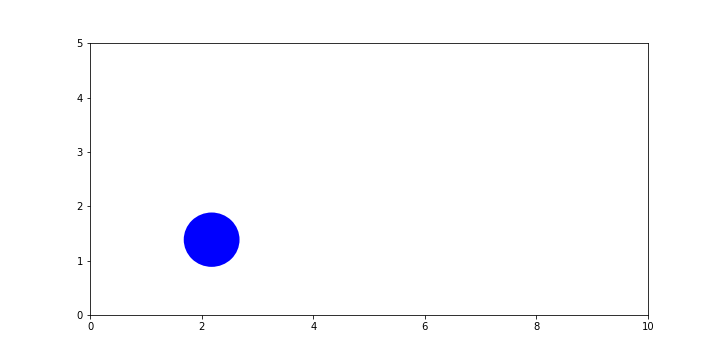
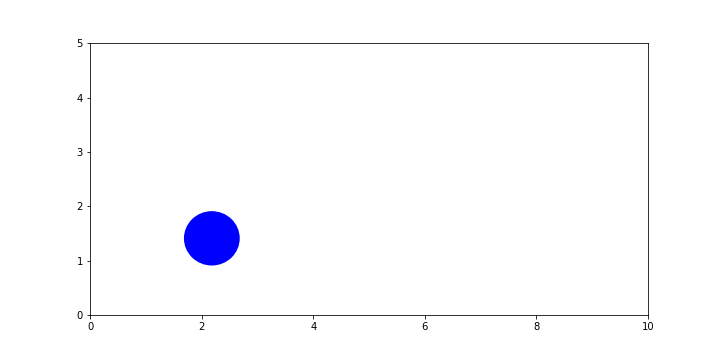
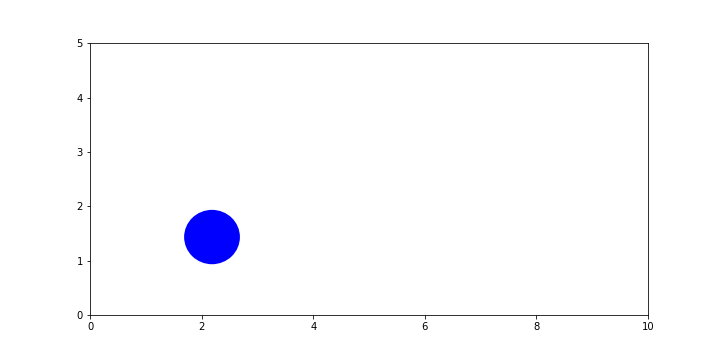
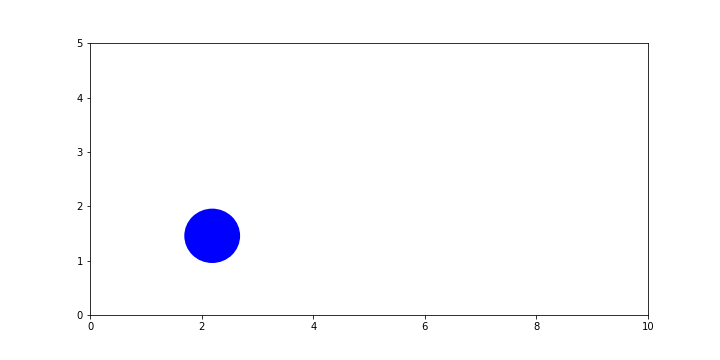
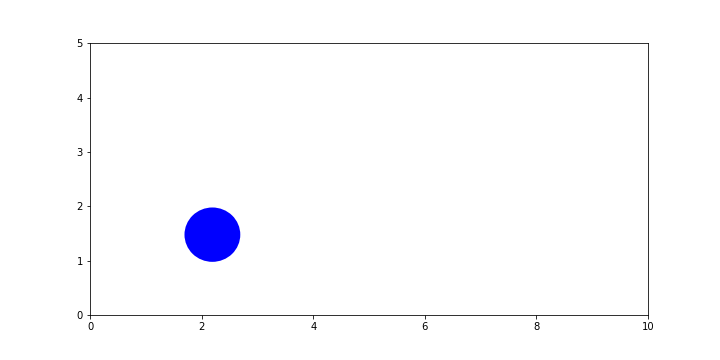
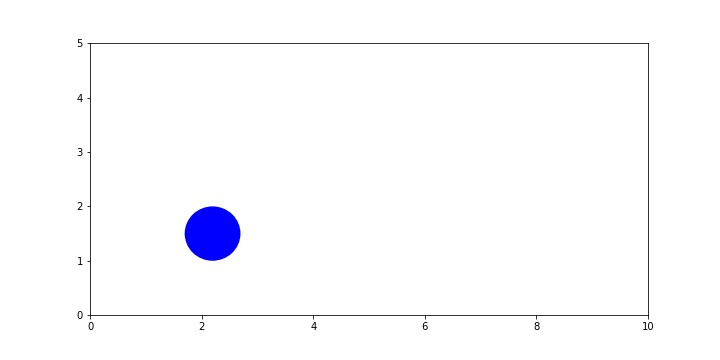
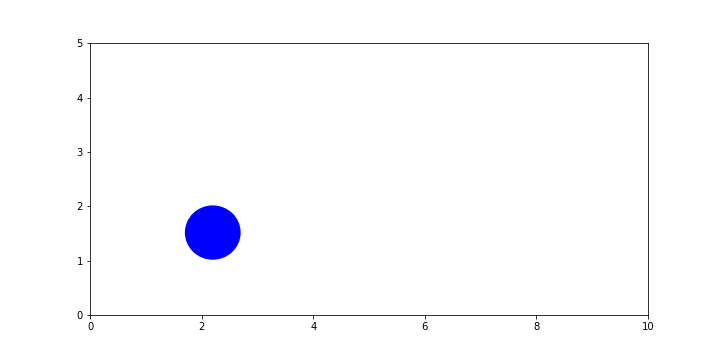
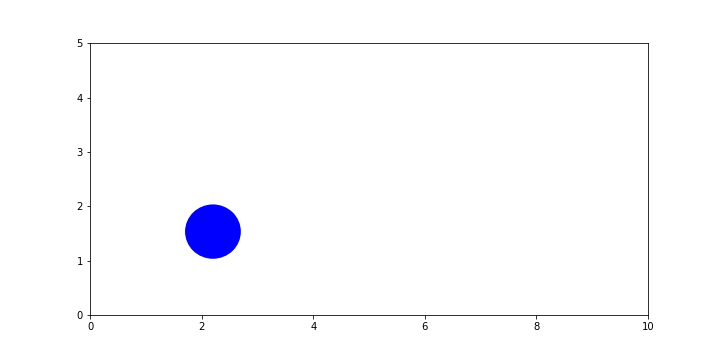
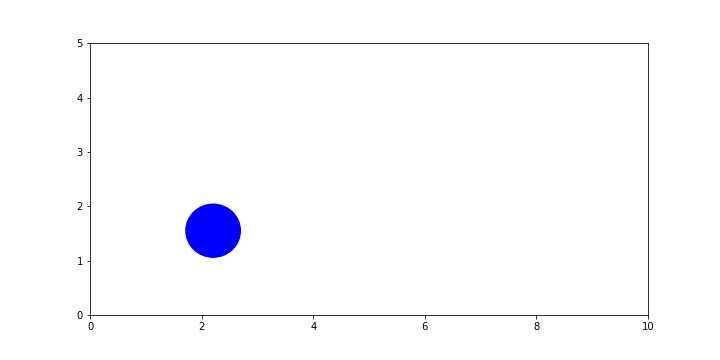
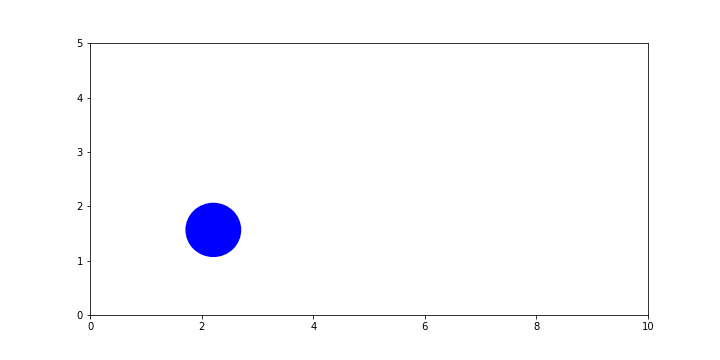
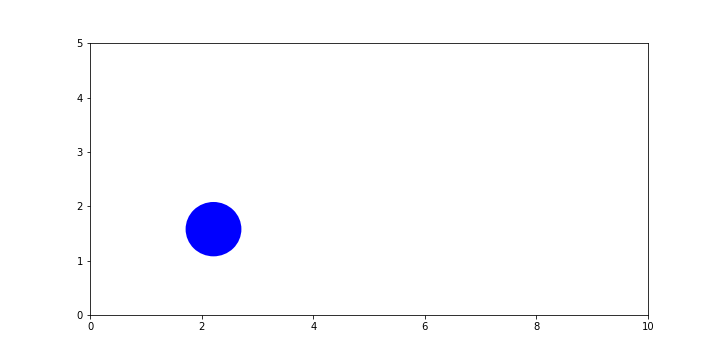
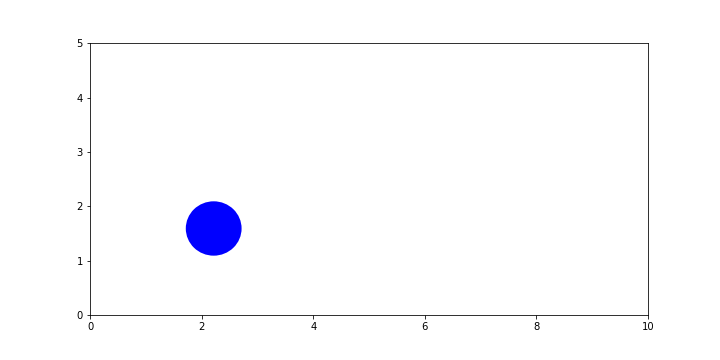
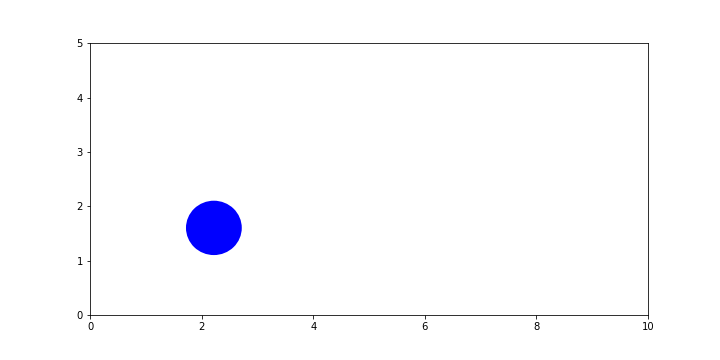
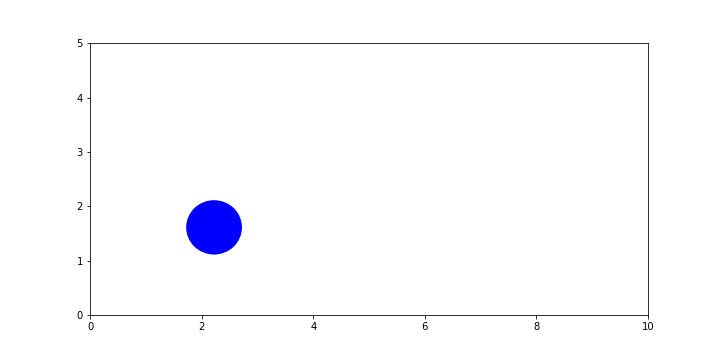
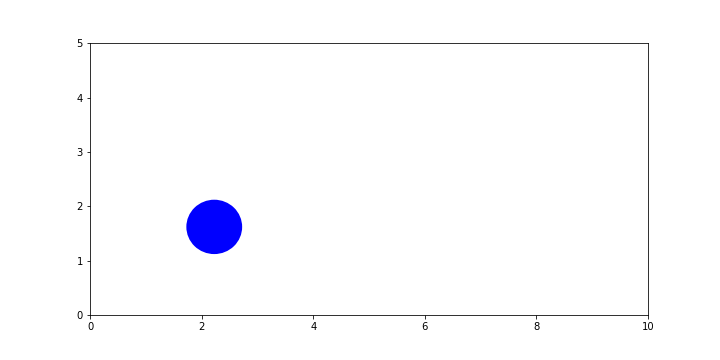
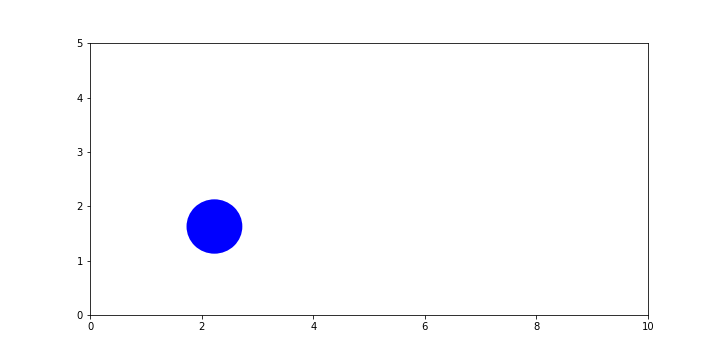
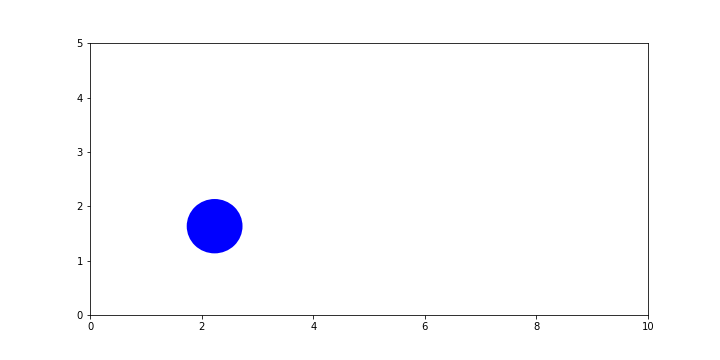
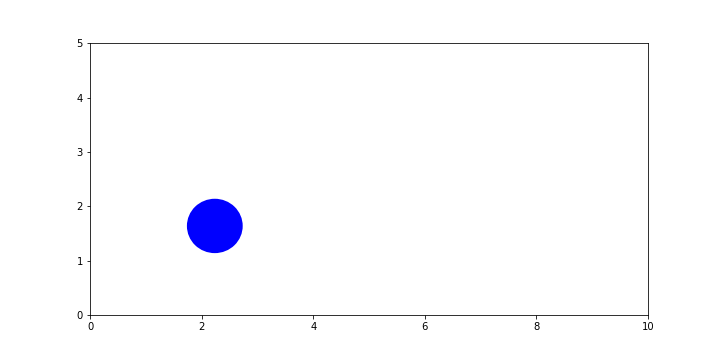
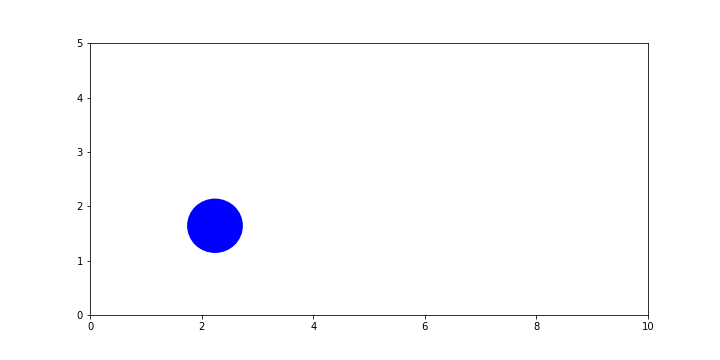
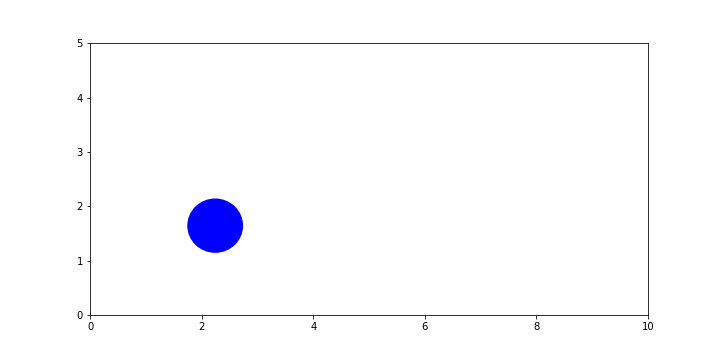
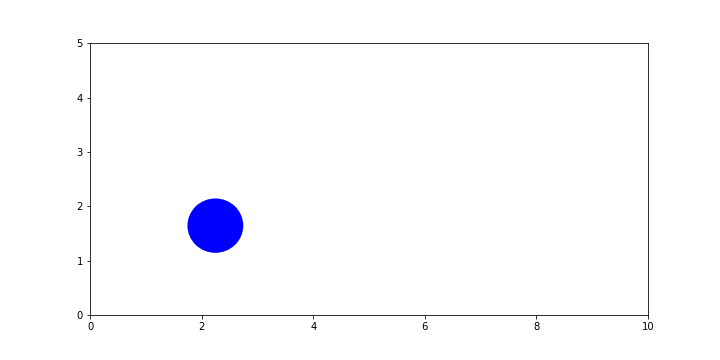
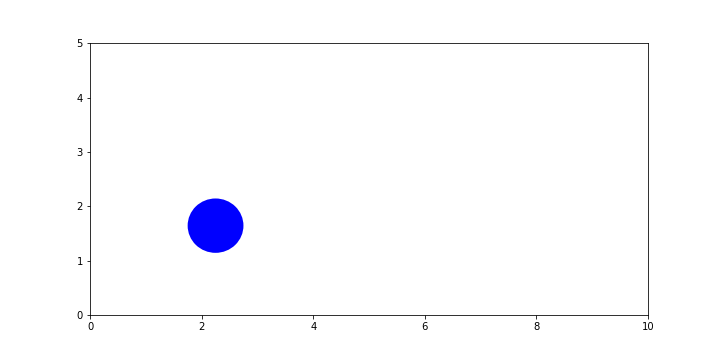
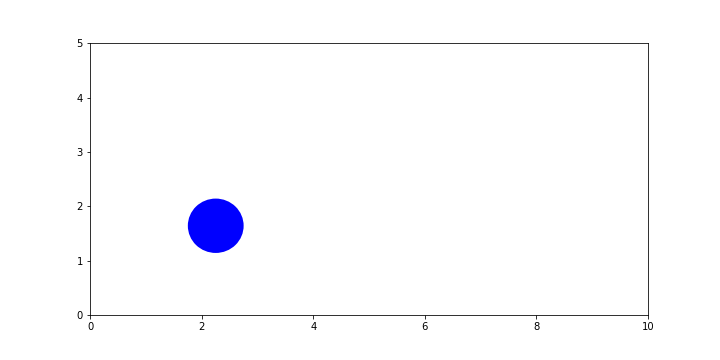
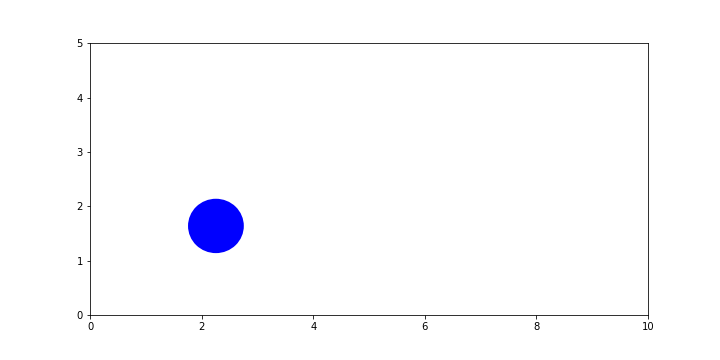
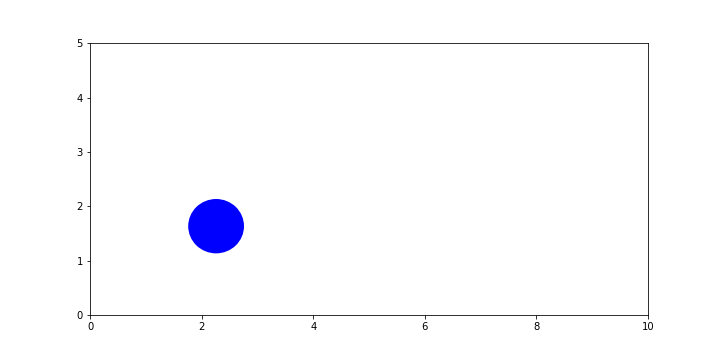
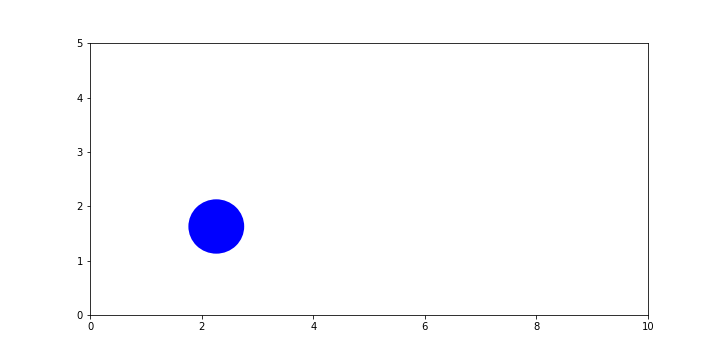
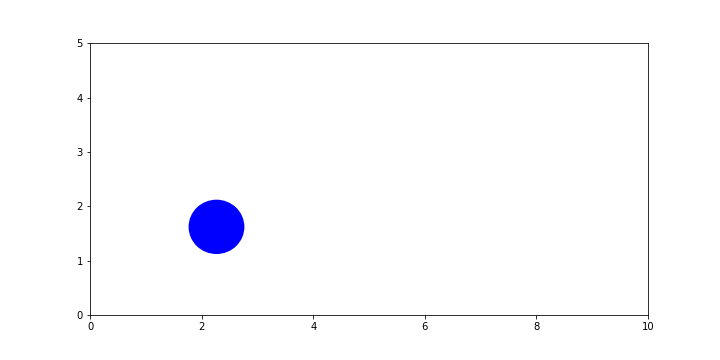
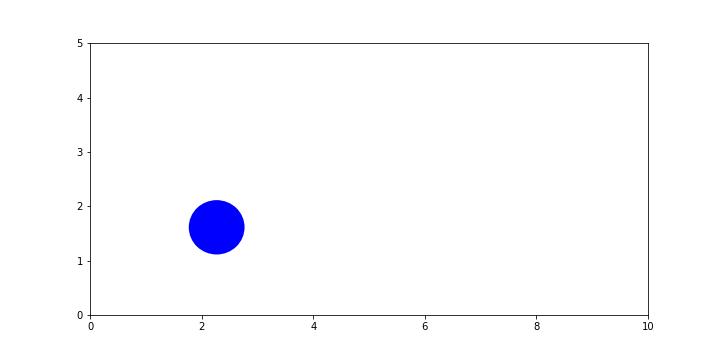
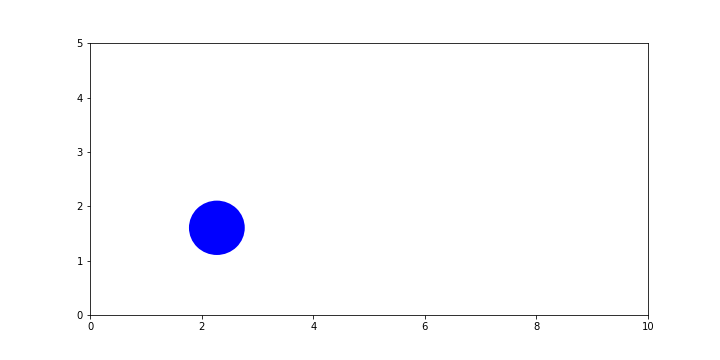
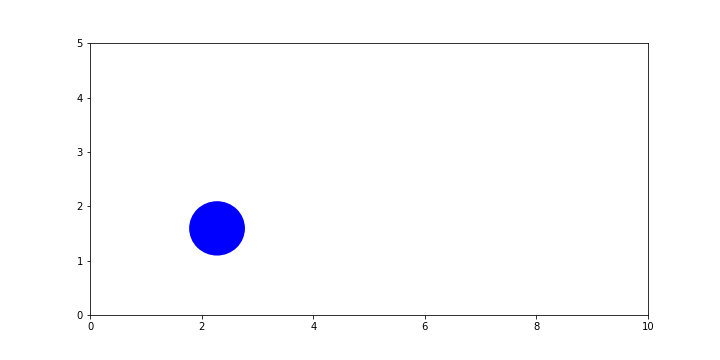
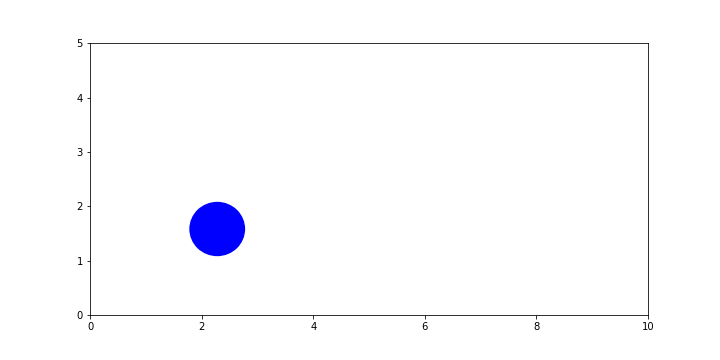
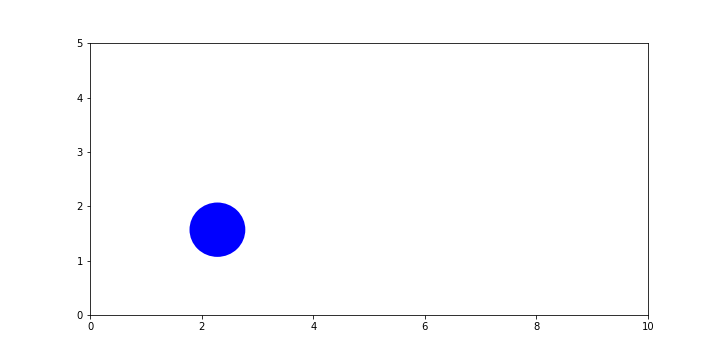
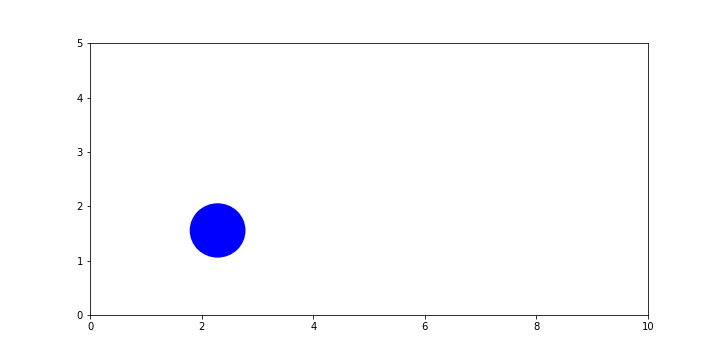
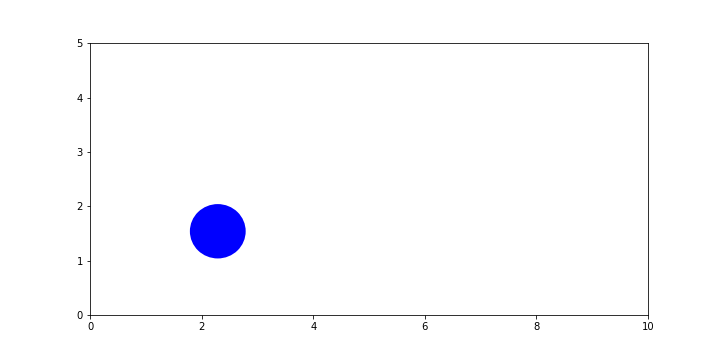
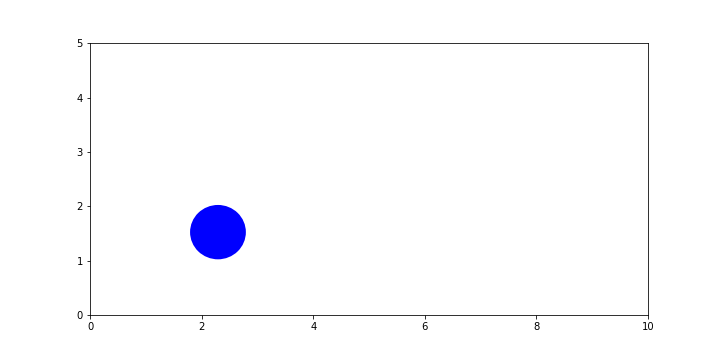
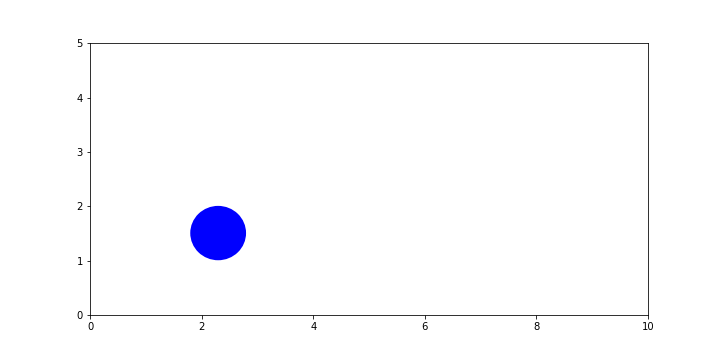
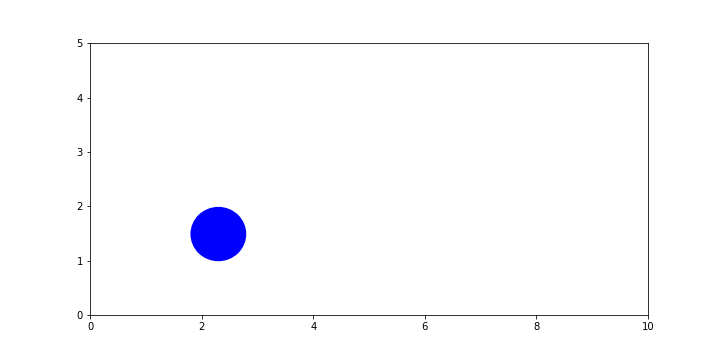
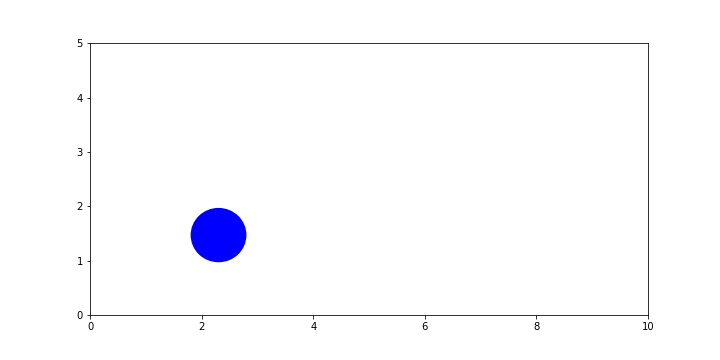
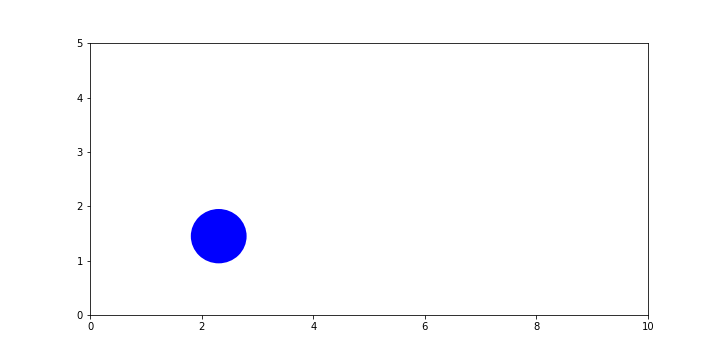
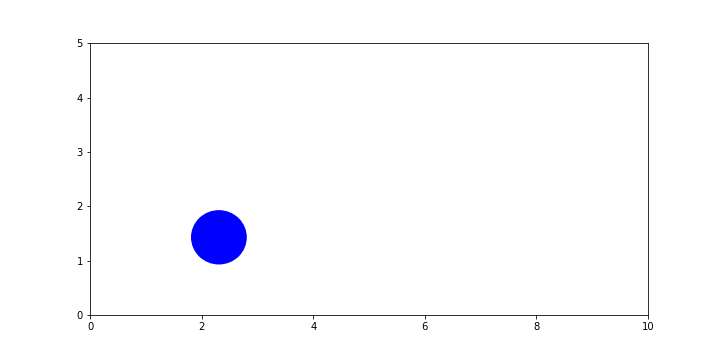
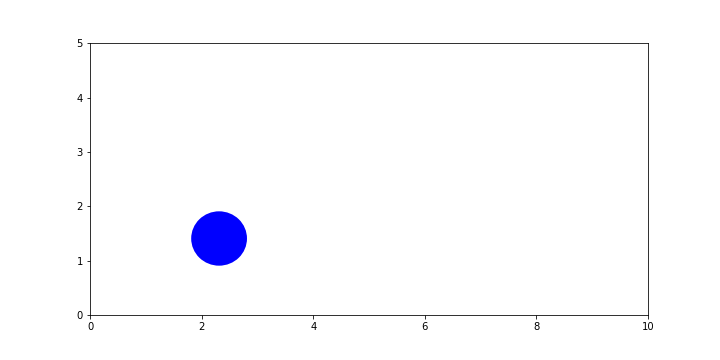
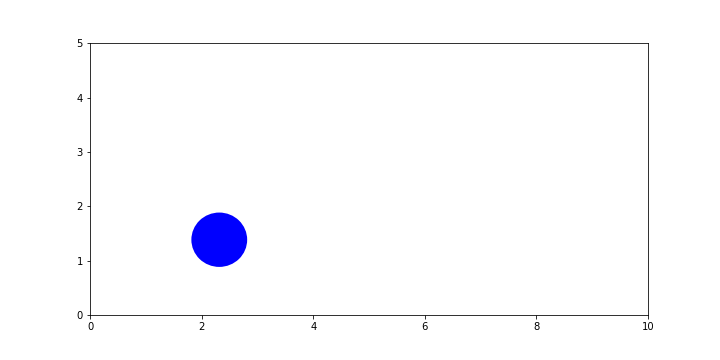
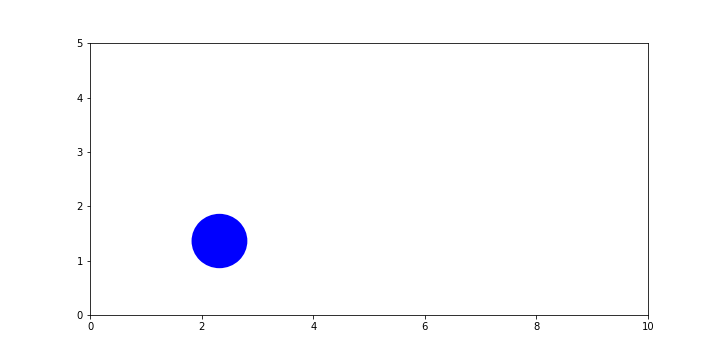
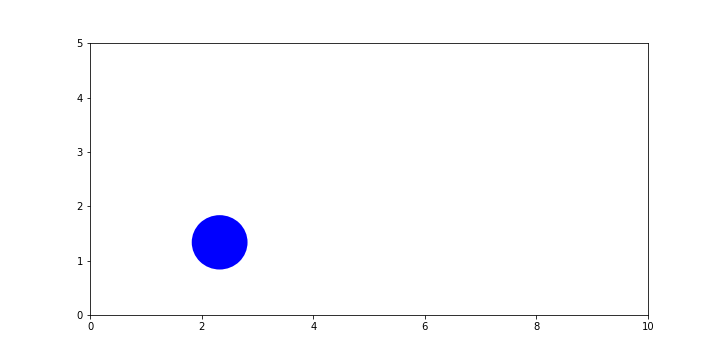
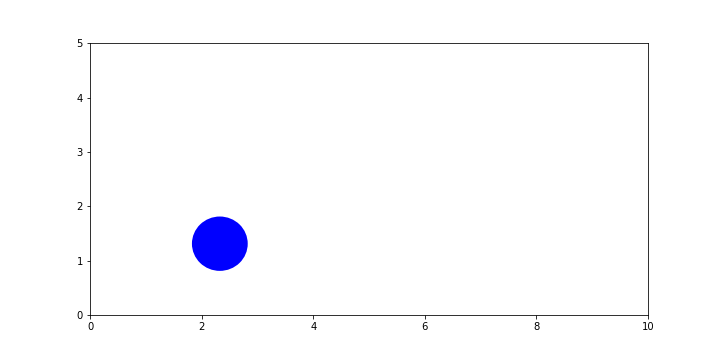
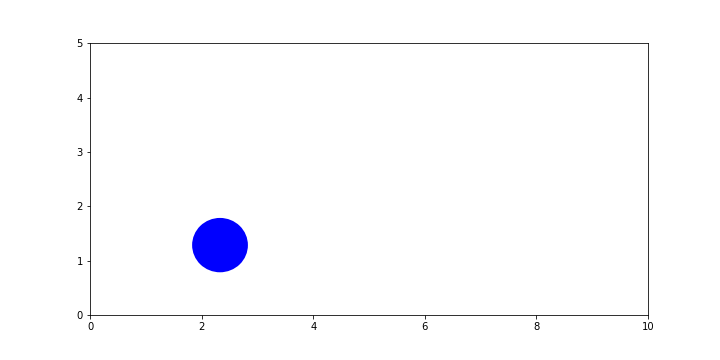
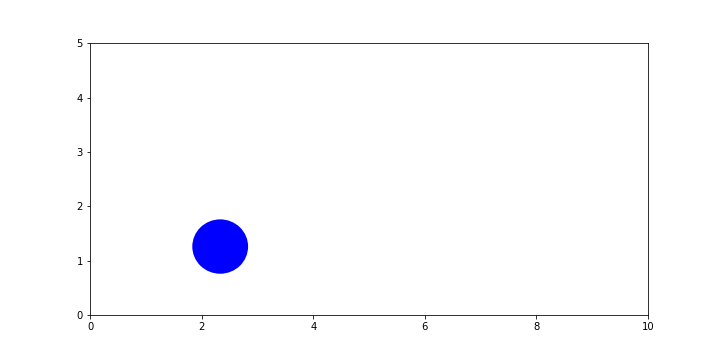
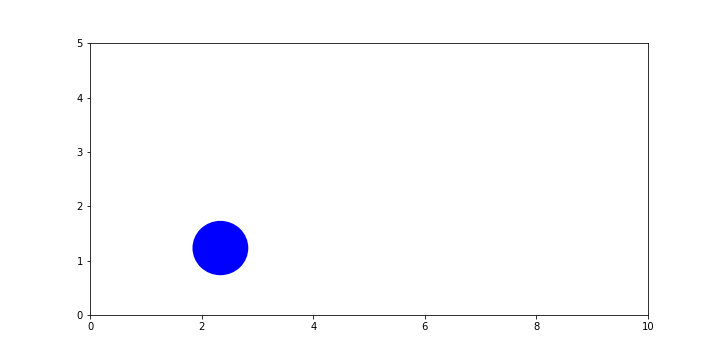
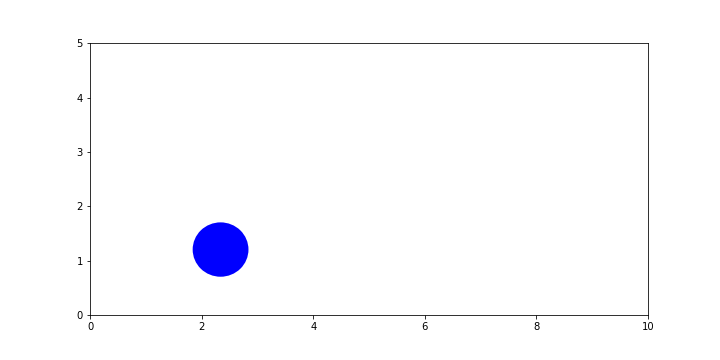
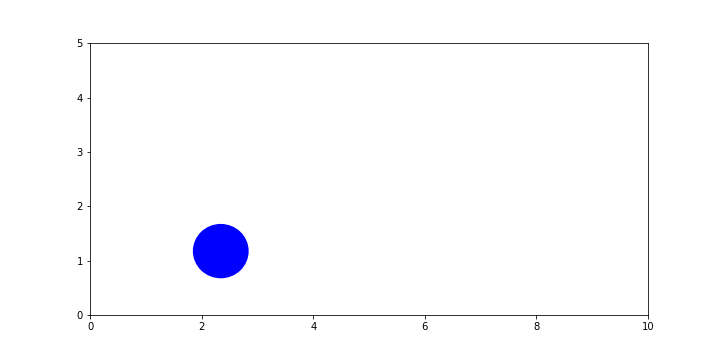
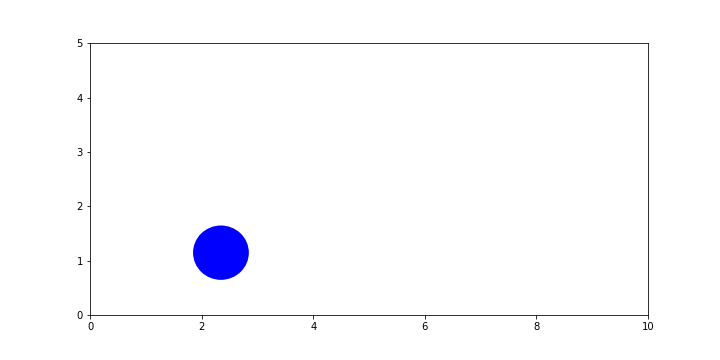
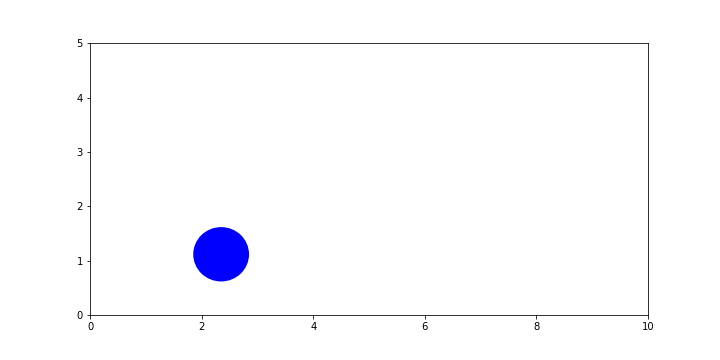
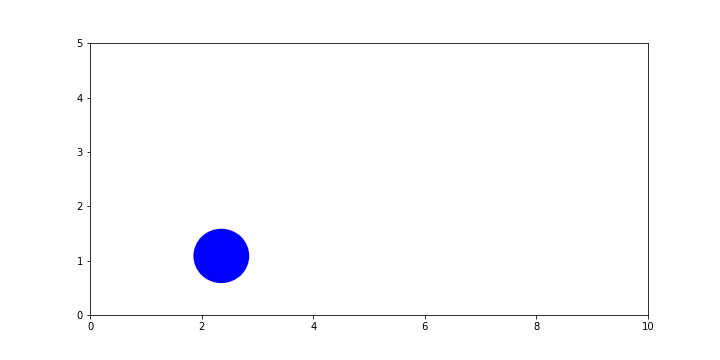
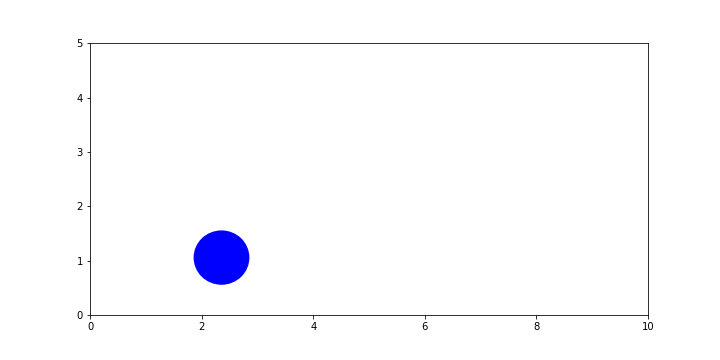
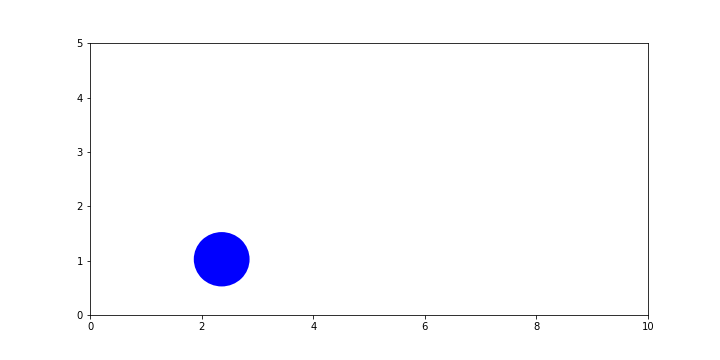
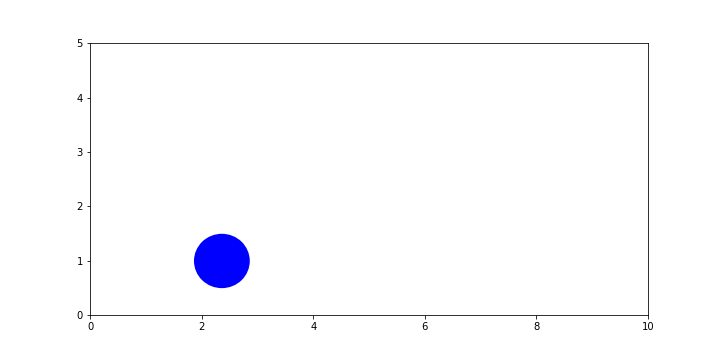
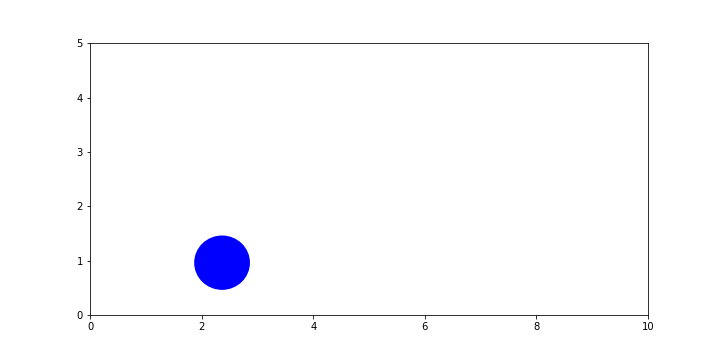
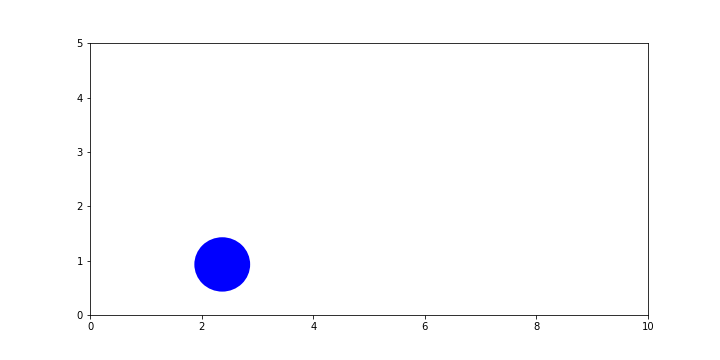
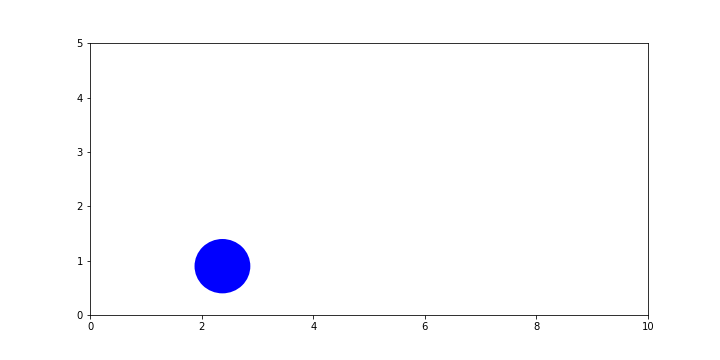
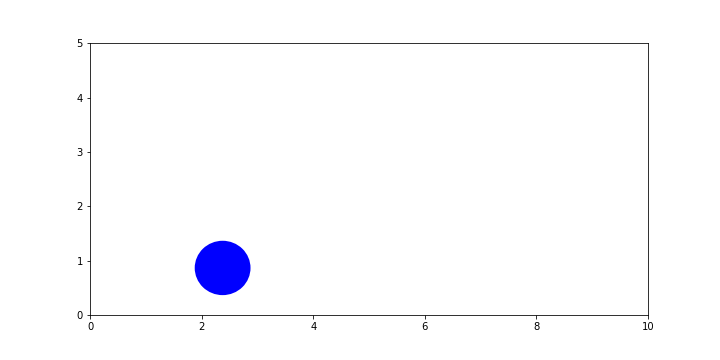
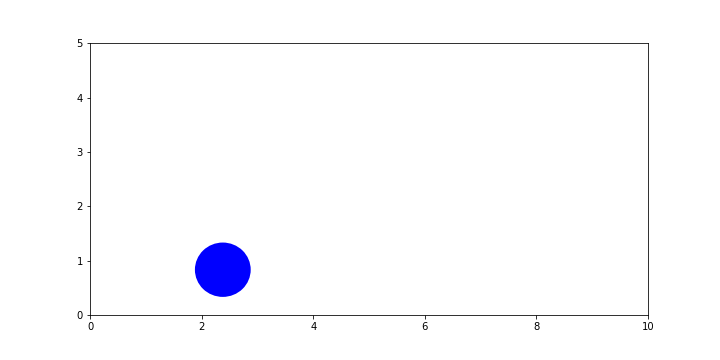
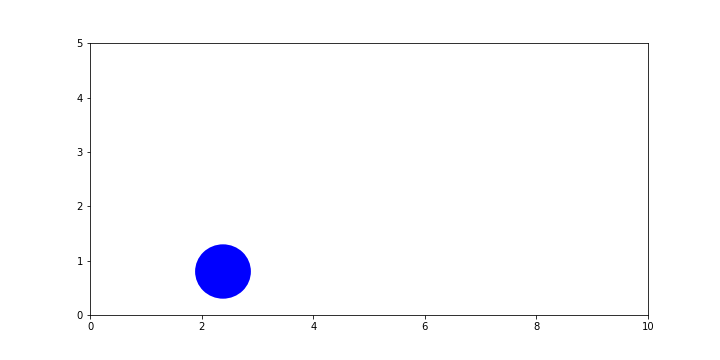
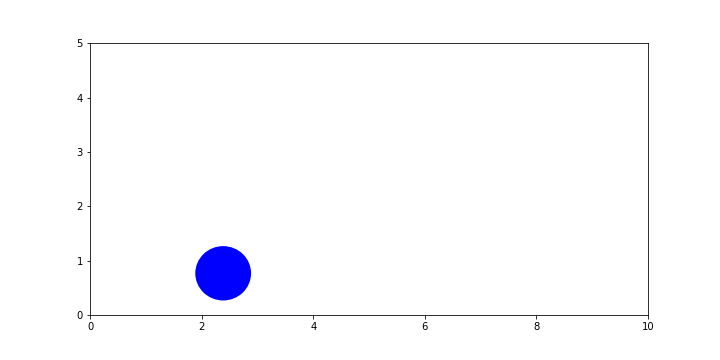
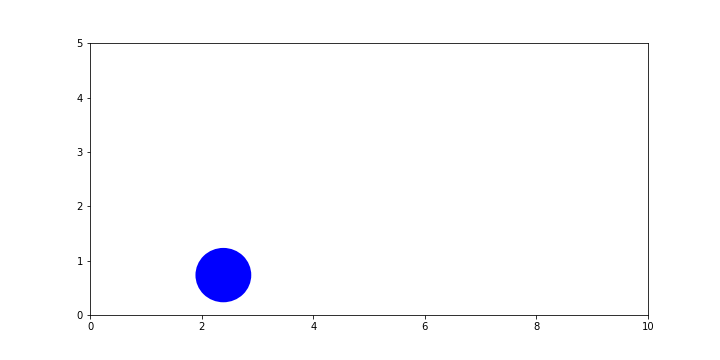
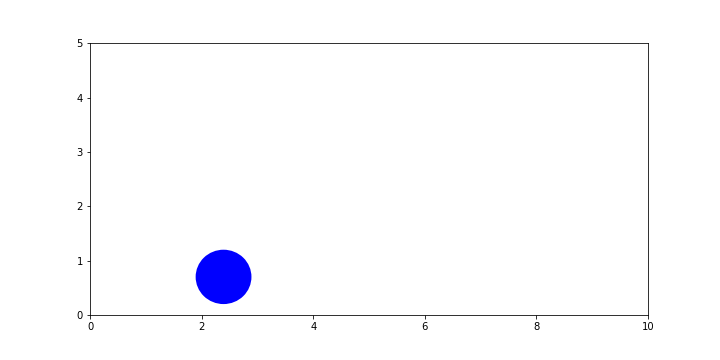
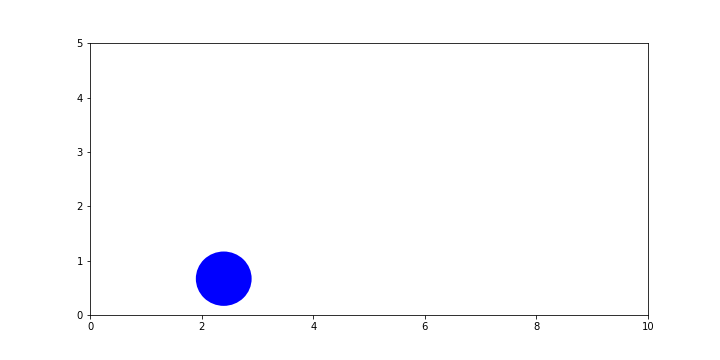
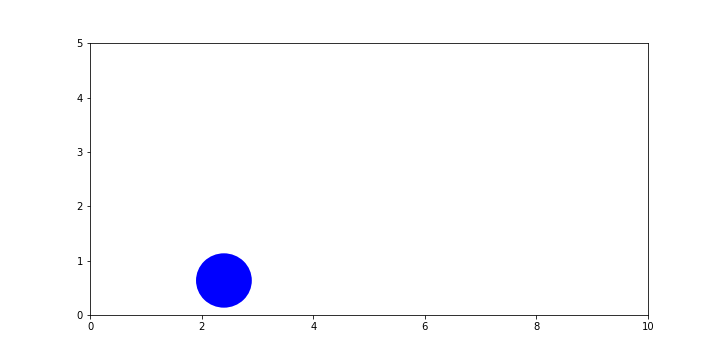
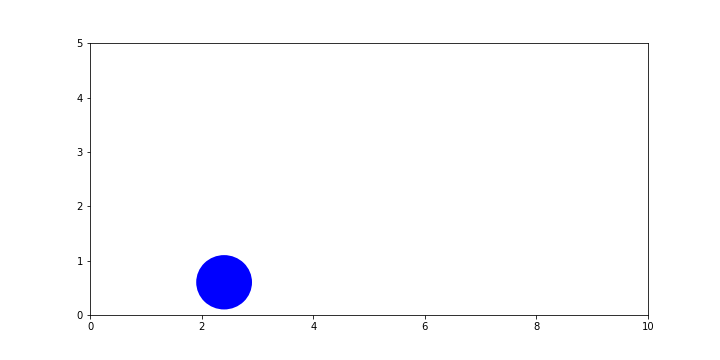
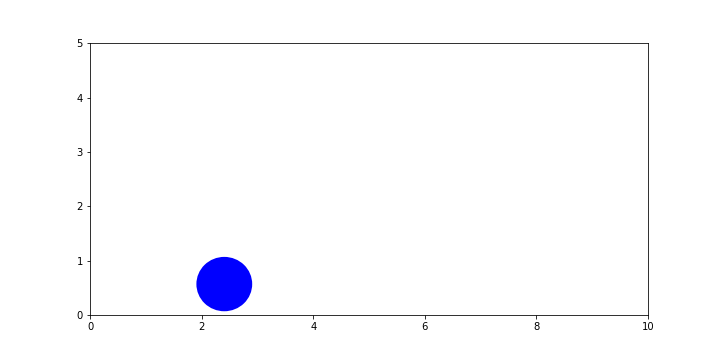
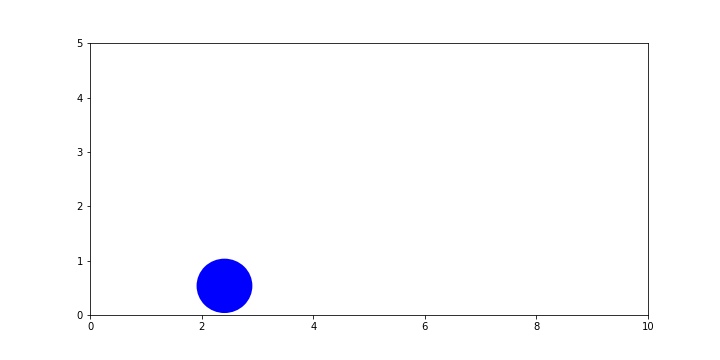
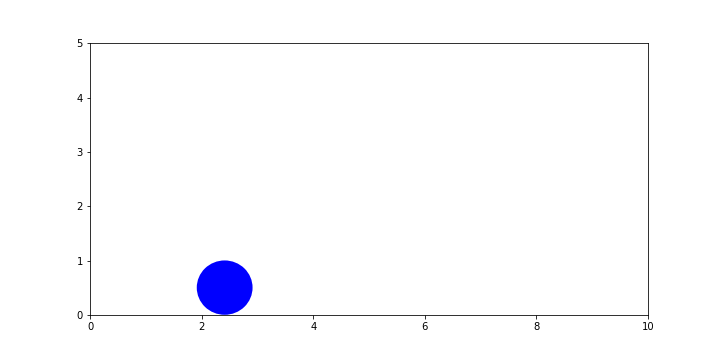
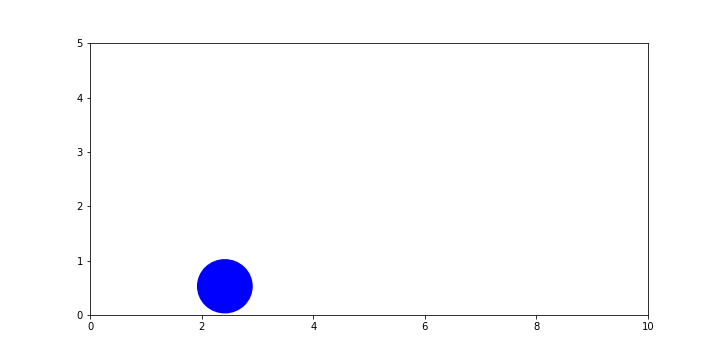
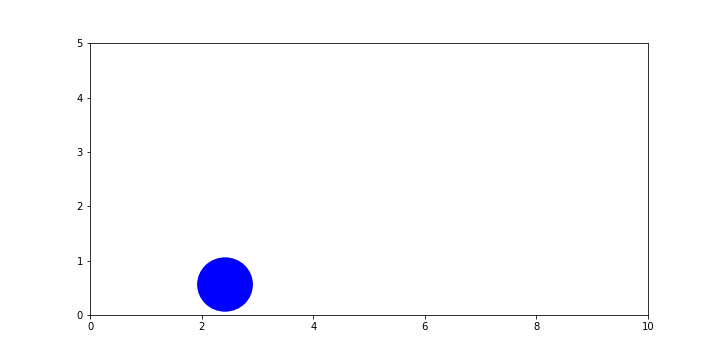
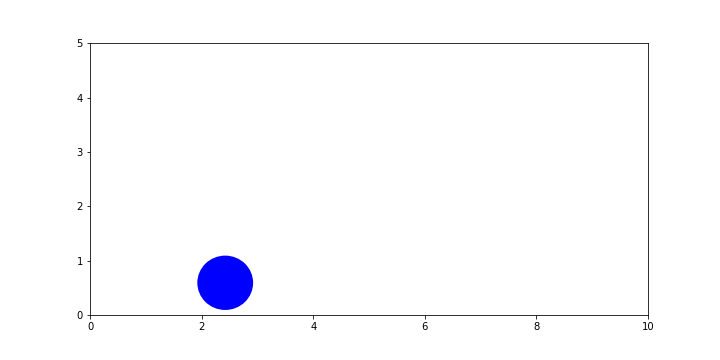
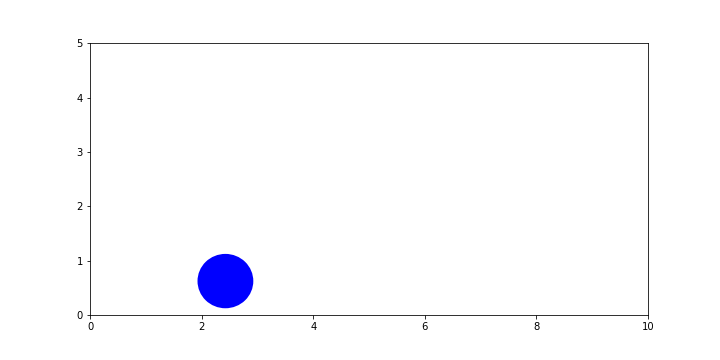
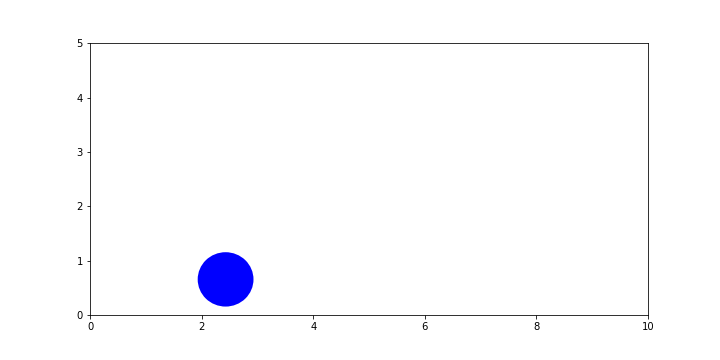
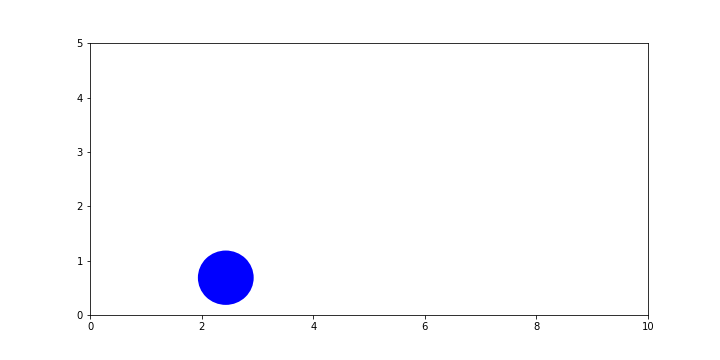
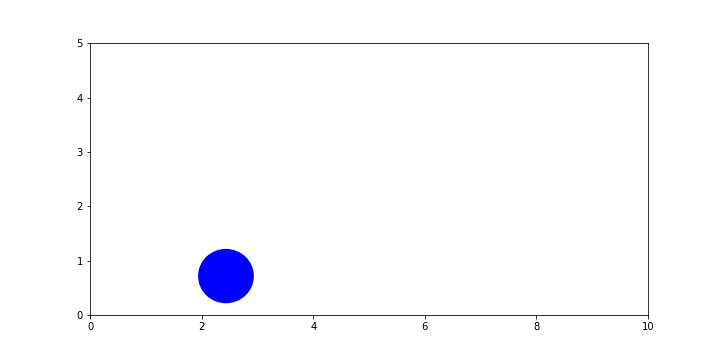
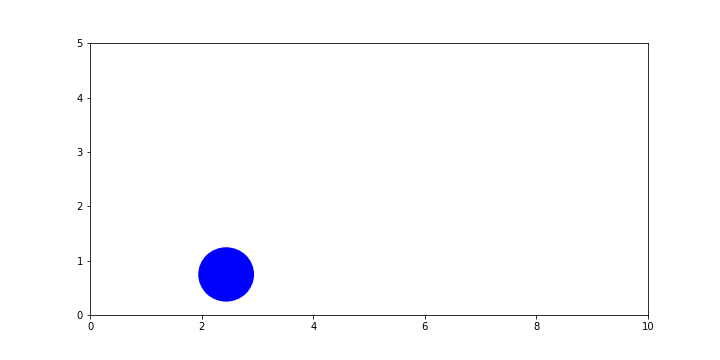
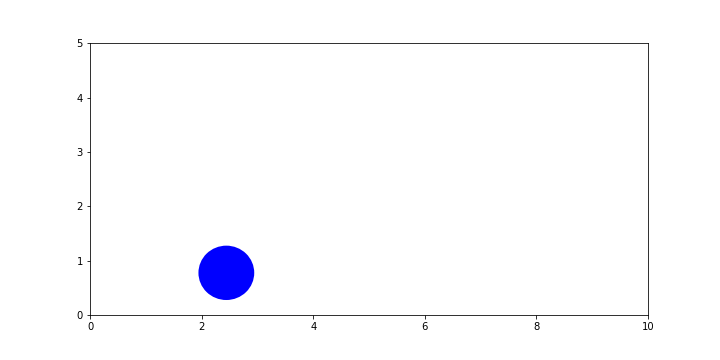
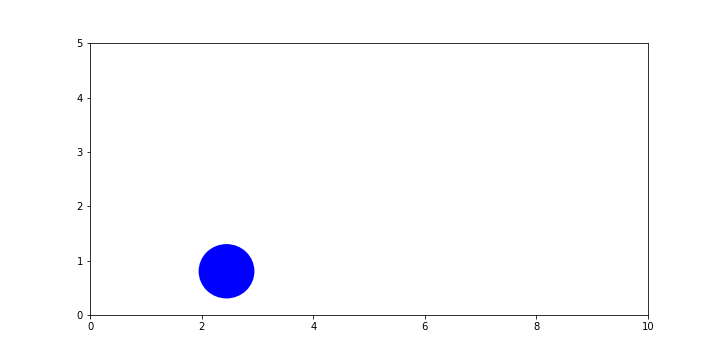
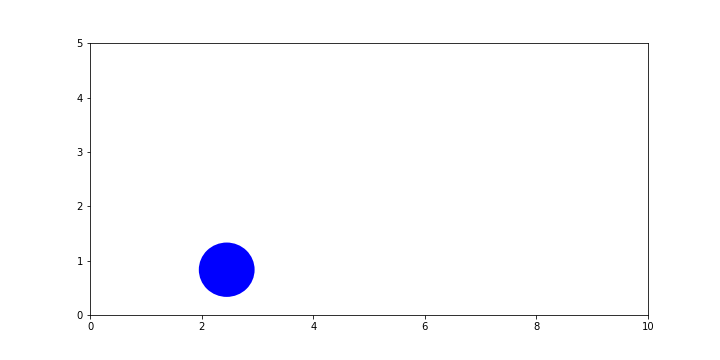
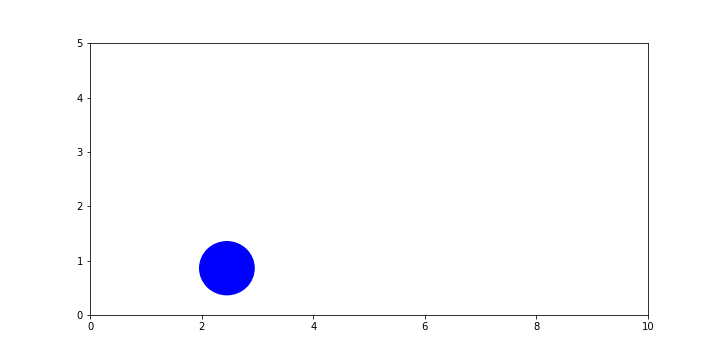
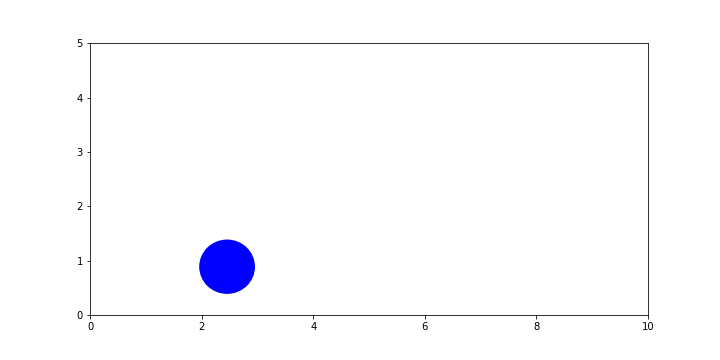
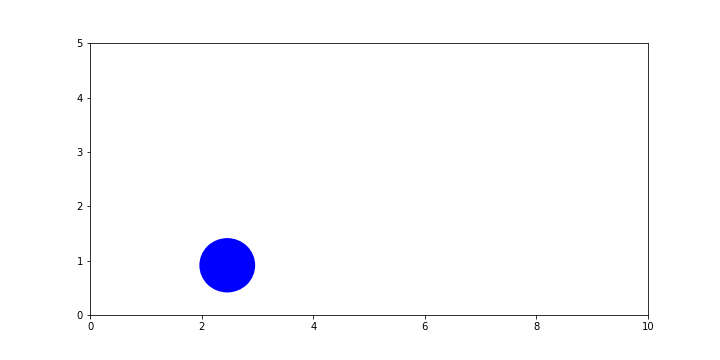
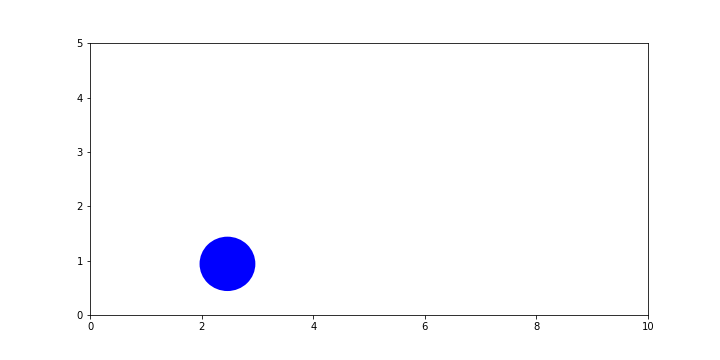
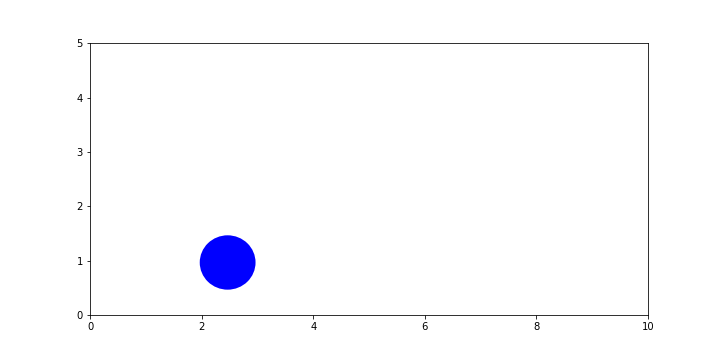
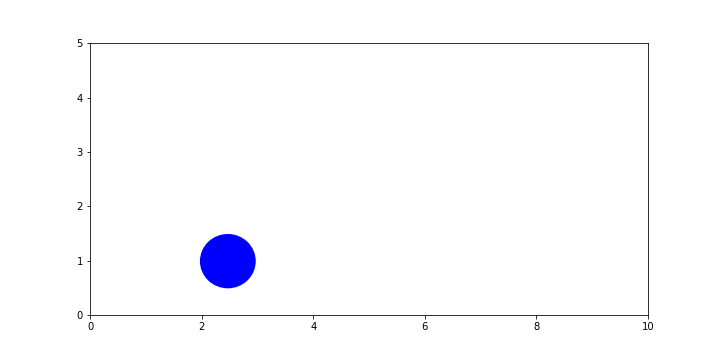
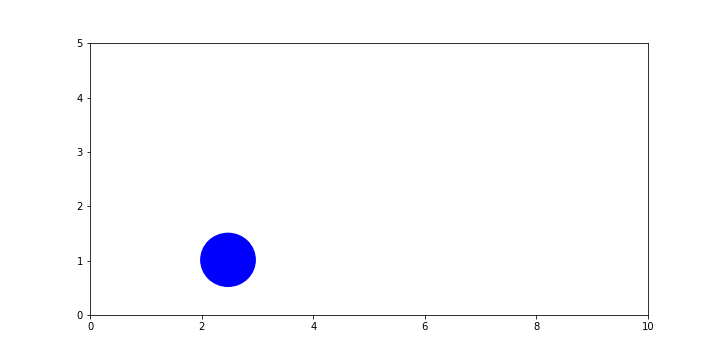
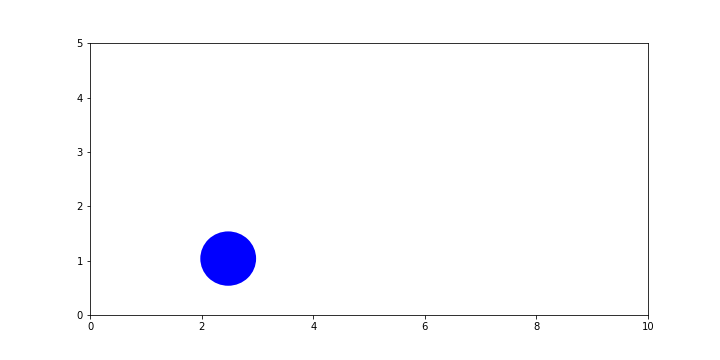
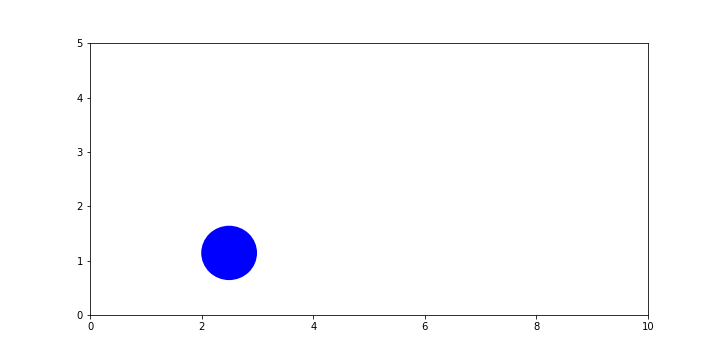
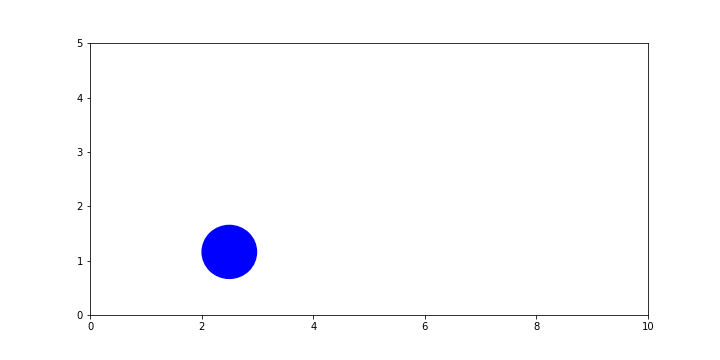
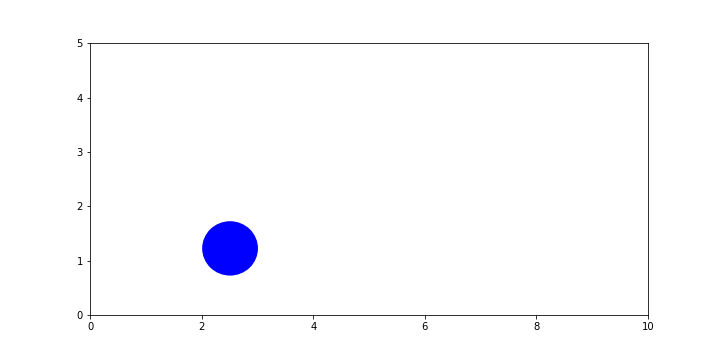
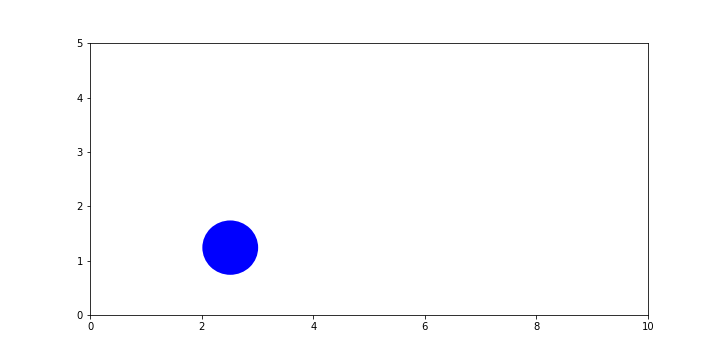
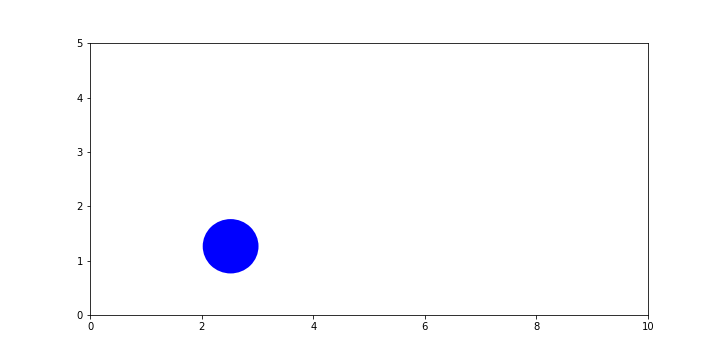
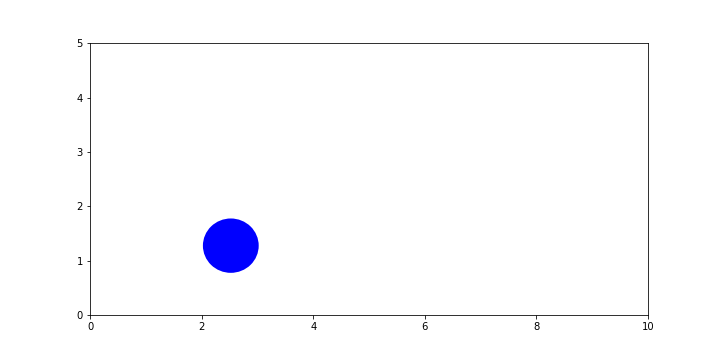
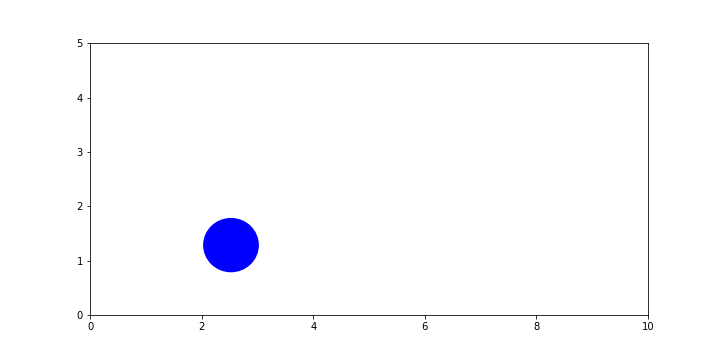
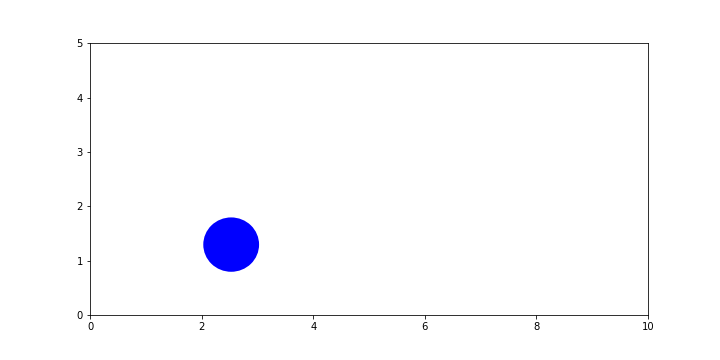
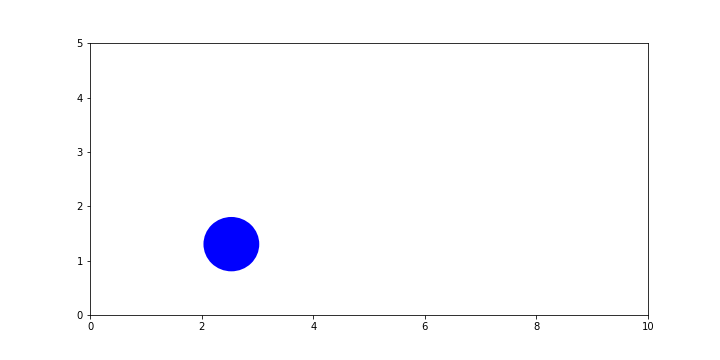
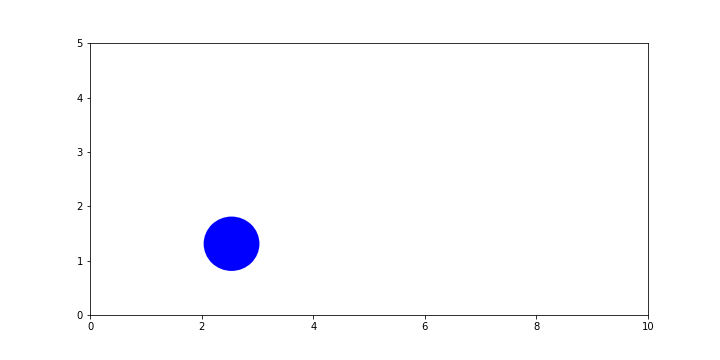
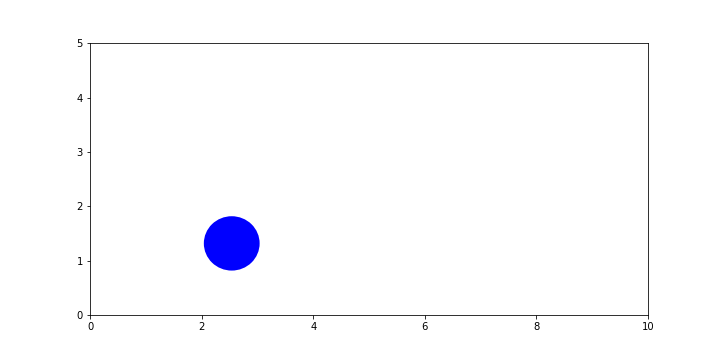
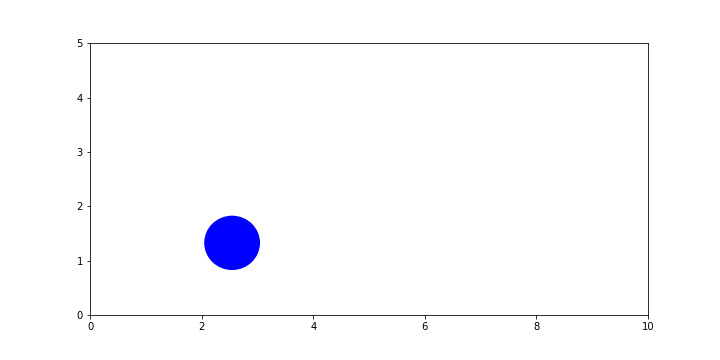
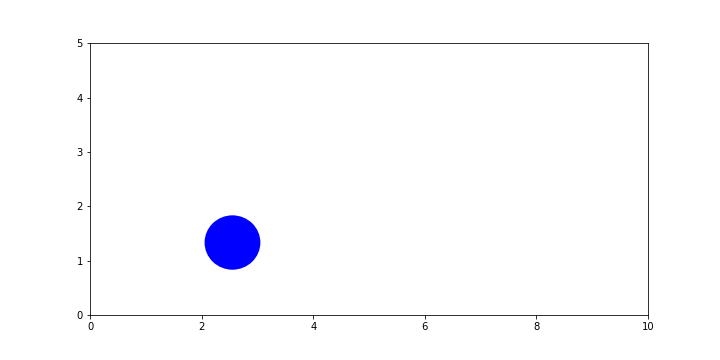
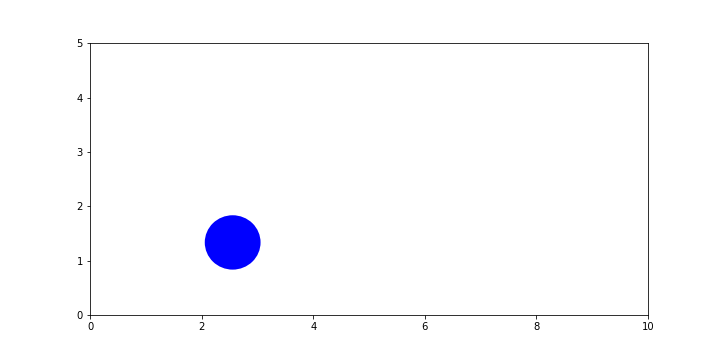
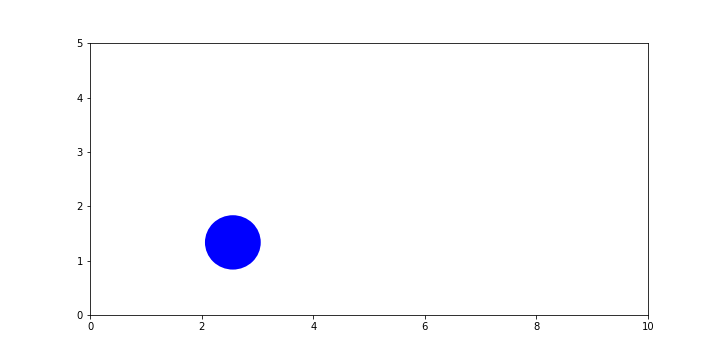
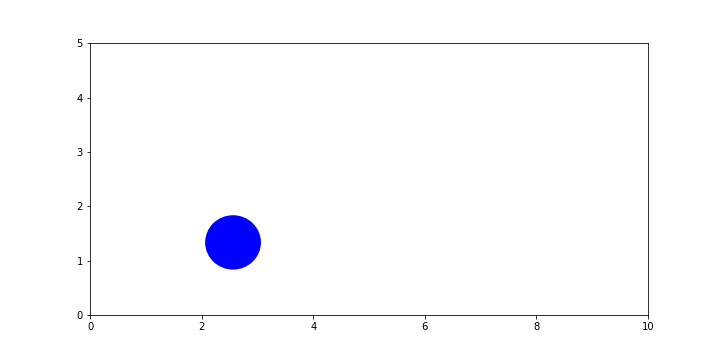
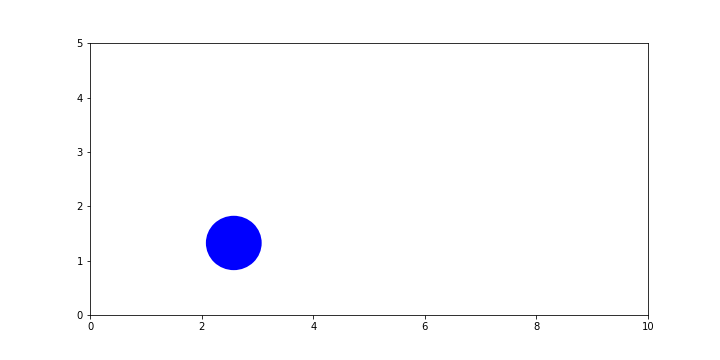
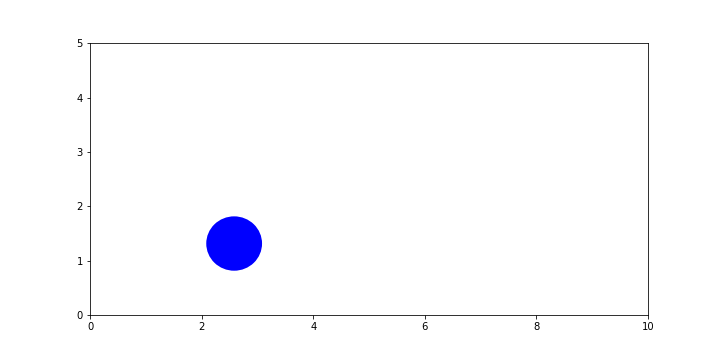
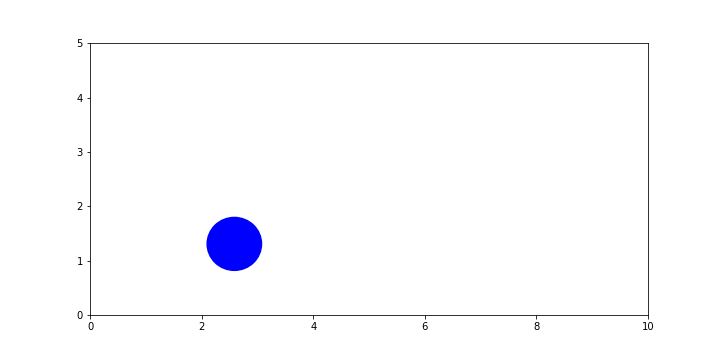
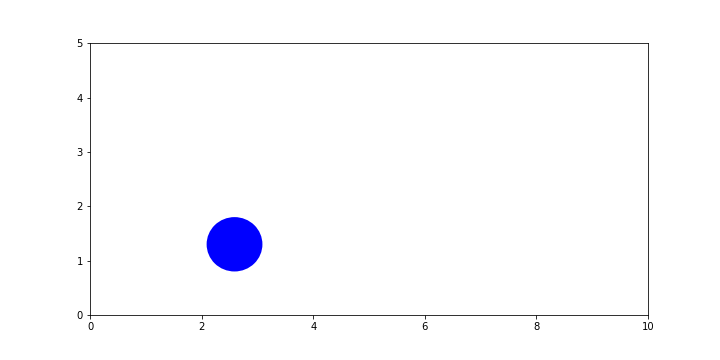
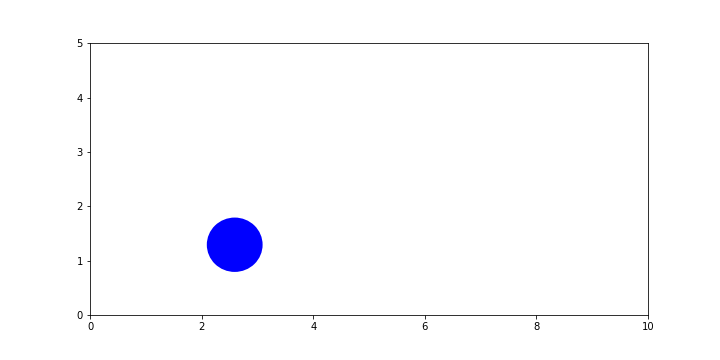
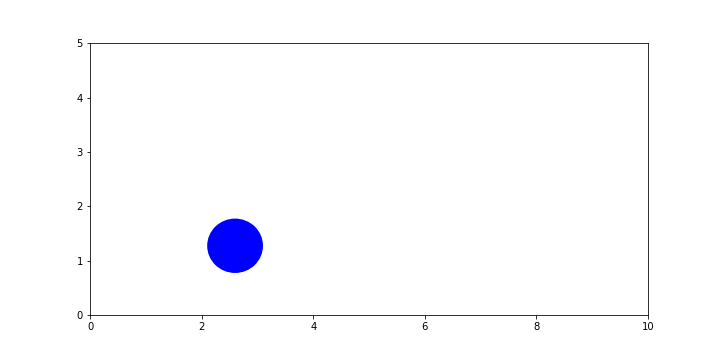
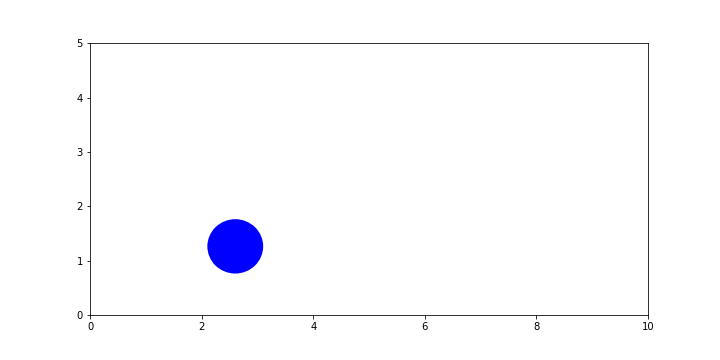
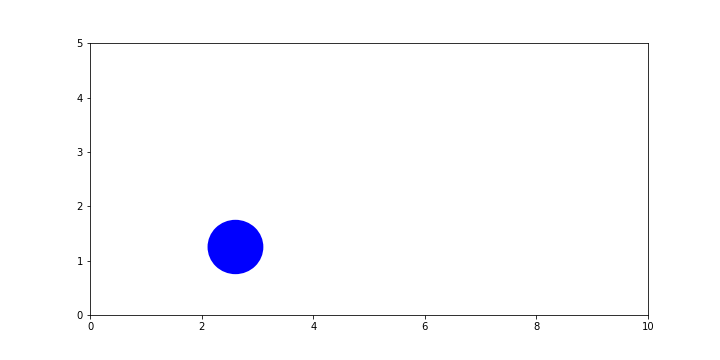
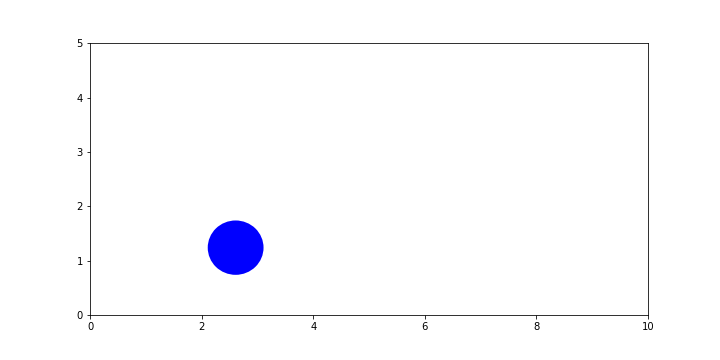
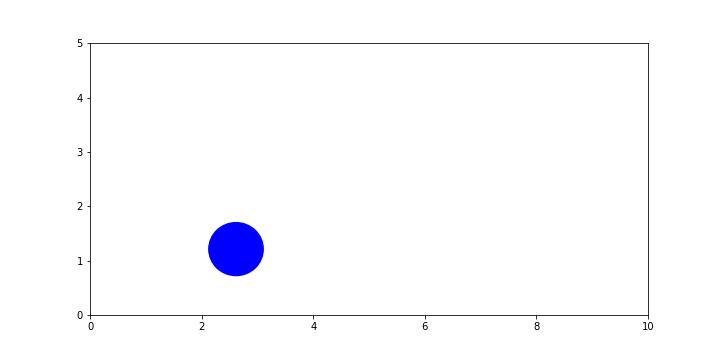
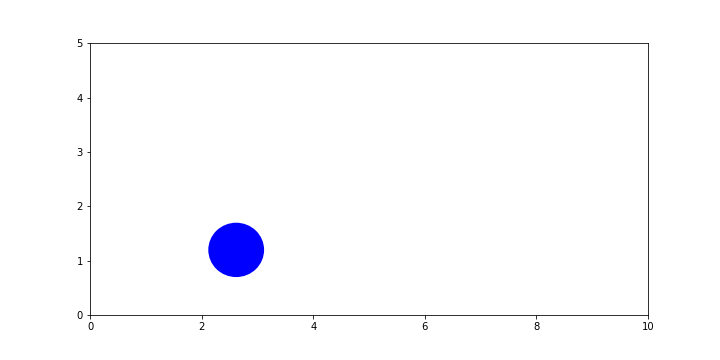
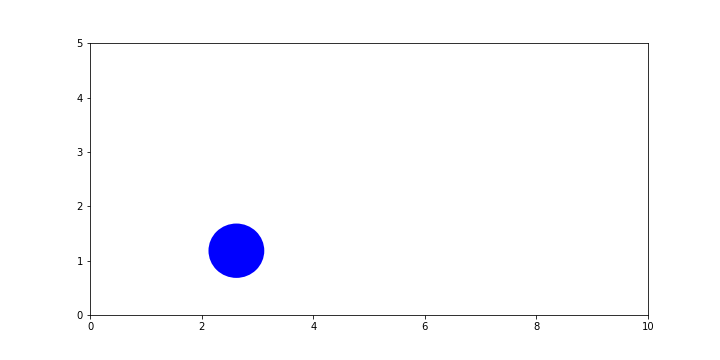
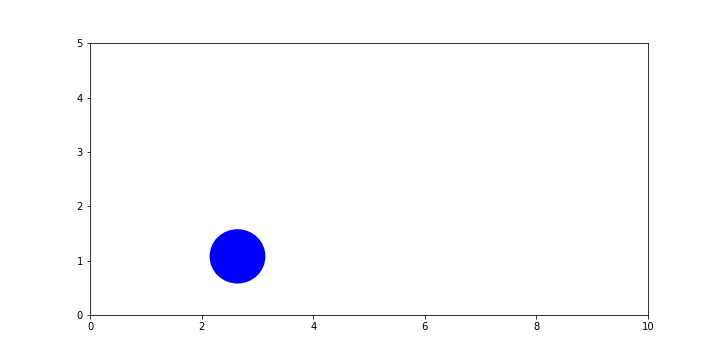
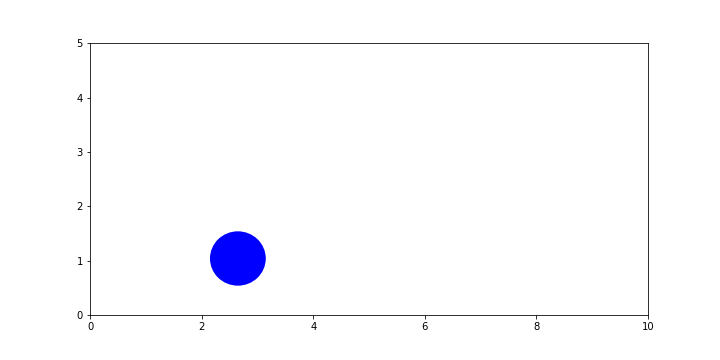
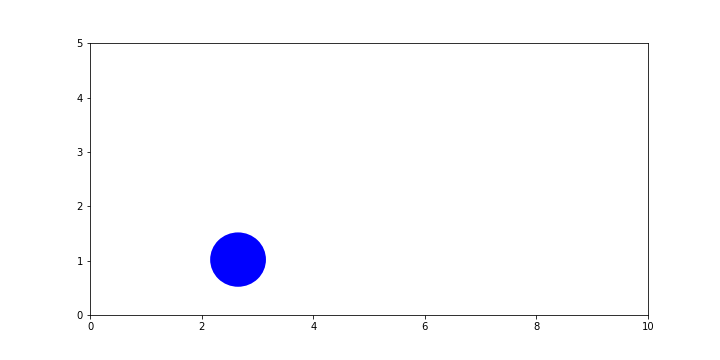
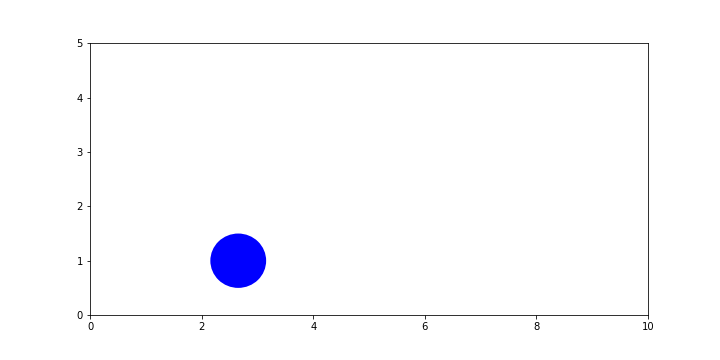
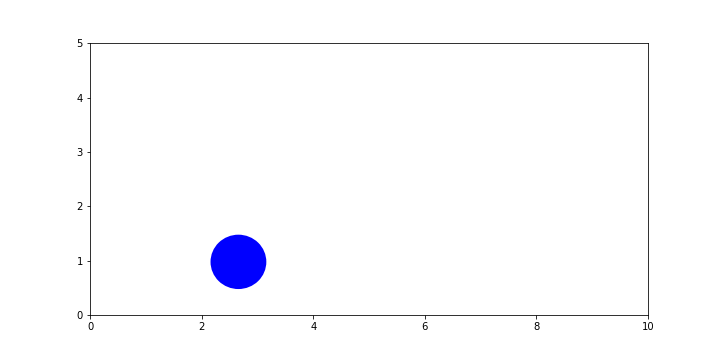
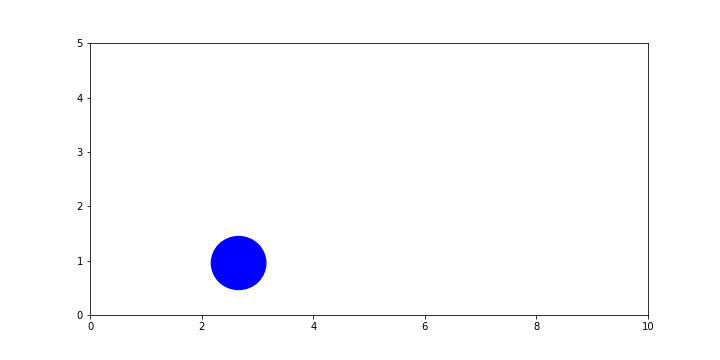

24.6612710953


In [6]:
start = timer()
anim = animation.FuncAnimation(fig, 
                               animate,
                               init_func = init,
                               frames    = [x for x in range(500)],
                               interval  = 1)
display(IPython_display.display_animation(anim))
dt = timer() - start
print dt

Using Matplotlib for an animation within a jupyter notebook is by far not the most elegant method, also it is quite slow. 

## Polar Coordinates 

In the next example, we will try to project a number of kartesian coordinates into a polar coordinate system.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

We can define a function, which will transform a set of cartesian coordinats into polar coordinates. The polar coordinate system is organized in a way that the south ($az = 0^{\circ}$) is pointing to the bottom. The center of the polar plot will hold the elevation at $90^{\circ}$.

$x = 90+sin(az/180 \times \pi)\times(90-el)$

$y = 90-cos(az/180 \times \pi)\times(90-el)$

In [8]:
def poltrafo(az,el):    
    x = 90.+np.sin(az/180.*np.pi)*(90.-el)
    y = 90.-np.cos(az/180.*np.pi)*(90.-el) 
    return x, y

We can test the function above, using a few predefined coordinates.

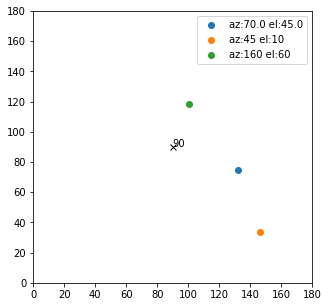

In [9]:
az = 70.
el = 45.

az1 = 45
el1 = 10

az2 = 160
el2 = 60

x , y   = poltrafo(az ,el)
x1, y1  = poltrafo(az1,el1)
x2, y2  = poltrafo(az2,el2)

plt.figure(figsize = (5,5))
plt.plot(x ,y , "o", label = "az:"+str(az)+" el:"+str(el))
plt.plot(x1,y1, "o", label = "az:"+str(az1)+" el:"+str(el1))
plt.plot(x2,y2, "o", label = "az:"+str(az2)+" el:"+str(el2))
plt.plot(90,90, "xk")
plt.text(90,90,"90")
plt.ylim([0,180])
plt.xlim([0,180])
plt.legend()
plt.show()

We can apply the above writen function (poltrafo) to a whole array of coordinates as follows.

In [10]:
AZ = np.linspace(0,360,100)
EL = (np.sin(AZ/360*8.*np.pi)+1.)*90.

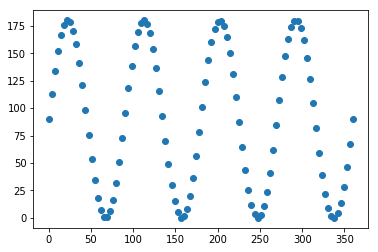

In [11]:
plt.plot(AZ,EL, "o")
plt.show()

In [12]:
X,Y = poltrafo(AZ,EL)

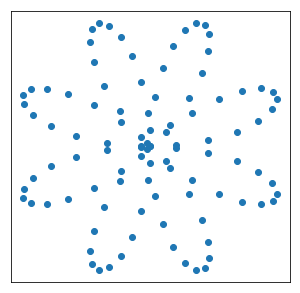

In [13]:
plt.figure(figsize=(5,5))
plt.plot(X,Y,"o")
plt.xticks(()),plt.yticks(())
plt.show()

We have done the coordinate transformation while preserving the proportions in general. This means the coorinate limits are preserved. This is usefull when thinking about image transformations (imagine every data point in the example before also has its own color.). Image transformations are further discussed here.